## UPDATED SOLO PROJECT BUT JUST ANALYSIS

In [187]:
import numpy as np
import sunpy
import astropy
import numpy
from IPython.core.pylabtools import figsize
from asdf.commands.diff import print_in_tree
from matplotlib import pyplot as plt
import cdflib
import sunpy_soar
from matplotlib.pyplot import legend
from sunpy.net import Fido, attrs as a
from sunpy.sun.constants import density
import pandas as pd

# Set display options to show all columns
pd.set_option('display.max_columns', None)


## GET DATA

In [188]:
# create a dictionary with all the time ranges that we are looking at and getting the distance manually from the website
all_Date_Range_info = {
    'Date_Range1' : { 'time_range' : a.Time('2021/08/21 00:08:00', '2021/08/21 15:00:00') , 'distance' : 0.65, 'name' : 'Date_Range1' },
    'Date_Range2' : { 'time_range' : a.Time('2021/11/23 00:00:00', '2021/11/23 19:00:00') , 'distance' : 0.96, 'name' : 'Date_Range2' },
    'Date_Range3'  : { 'time_range' : a.Time('2021/12/21 00:00:00', '2021/12/22 00:00:00') , 'distance' : 1.00, 'name' : 'Date_Range3' },
    'Date_Range4'  : { 'time_range' : a.Time('2021/12/22 00:00:00', '2021/12/22 10:00:00') , 'distance' : 1.01, 'name' : 'Date_Range4' },
    'Date_Range5'  : { 'time_range' : a.Time('2022/01/02 04:00:00', '2022/01/03 00:00:00') , 'distance' : 1.00, 'name' : 'Date_Range5' },
    'Date_Range6'  : { 'time_range' : a.Time('2022/02/05 04:00:00', '2022/02/05 14:00:00') , 'distance' : 0.82, 'name' : 'Date_Range6' },
    'Date_Range7'  : { 'time_range' : a.Time('2022/02/10 00:00:00', '2022/02/10 17:00:00') , 'distance' : 0.78, 'name' : 'Date_Range7' },
    'Date_Range8'  : { 'time_range' : a.Time('2022/02/19 00:00:00', '2022/02/20 00:00:00') , 'distance' : 0.69, 'name' : 'Date_Range8' },
    'Date_Range9'  : { 'time_range' : a.Time('2022/02/22 00:00:00', '2022/02/22 08:00:00') , 'distance' : 0.66, 'name' : 'Date_Range9' },
    'Date_Range10'  : { 'time_range' : a.Time('2022/02/22 12:00:00', '2022/02/22 23:00:00') , 'distance' : 0.66, 'name' : 'Date_Range10' },
    'Date_Range11'  : { 'time_range' : a.Time('2022/02/26 00:00:00', '2022/02/26 13:00:00') , 'distance' : 0.61, 'name' : 'Date_Range11' },
    'Date_Range12'  : { 'time_range' : a.Time('2022/02/27 00:00:00', '2022/02/27 16:00:00') , 'distance' : 0.60, 'name' : 'Date_Range12' },
    'Date_Range13'  : { 'time_range' : a.Time('2022/03/04 00:00:00', '2022/03/04 11:00:00') , 'distance' : 0.54, 'name' : 'Date_Range13' },
    'Date_Range14'  : { 'time_range' : a.Time('2022/04/01 12:00:00', '2022/04/01 23:00:00') , 'distance' : 0.34, 'name' : 'Date_Range14' },
    'Date_Range15'  : { 'time_range' : a.Time('2022/04/02 05:00:00', '2022/04/03 00:00:00') , 'distance' : 0.35, 'name' : 'Date_Range15' },
    'Date_Range16'  : { 'time_range' : a.Time('2022/04/04 10:00:00', '2022/04/05 00:00:00') , 'distance' : 0.37, 'name' : 'Date_Range16' },
    'Date_Range17'  : { 'time_range' : a.Time('2022/04/05 00:00:00', '2022/04/05 14:00:00') , 'distance' : 0.38, 'name' : 'Date_Range17' },
    'Date_Range18'  : { 'time_range' : a.Time('2022/04/13 00:00:00', '2022/04/13 14:00:00') , 'distance' : 0.48, 'name' : 'Date_Range18' },
    'Date_Range19'  : { 'time_range' : a.Time('2022/04/14 00:00:00', '2022/04/14 10:00:00') , 'distance' : 0.49, 'name' : 'Date_Range19' },
    'Date_Range20'  : { 'time_range' : a.Time('2022/05/04 00:00:00', '2022/05/04 09:00:00') , 'distance' : 0.72, 'name' : 'Date_Range20' },
    'Date_Range21'  : { 'time_range' : a.Time('2022/05/05 00:00:00', '2022/05/06 00:00:00') , 'distance' : 0.73, 'name' : 'Date_Range21' },
    'Date_Range22'  : { 'time_range' : a.Time('2022/06/02 10:00:00', '2022/06/03 00:00:00') , 'distance' : 0.94, 'name' : 'Date_Range22' },
    'Date_Range23'  : { 'time_range' : a.Time('2022/06/10 00:00:00', '2022/06/10 22:00:00') , 'distance' : 0.97, 'name' : 'Date_Range23' },
    'Date_Range24'  : { 'time_range' : a.Time('2022/07/01 00:00:00', '2022/07/01 09:00:00') , 'distance' : 1.01, 'name' : 'Date_Range24' },
    'Date_Range25'  : { 'time_range' : a.Time('2022/07/07 09:00:00', '2022/07/07 22:00:00') , 'distance' : 1.01, 'name' : 'Date_Range25' },
    'Date_Range26'  : { 'time_range' : a.Time('2022/08/03 14:00:00', '2022/08/04 00:00:00') , 'distance' : 0.95, 'name' : 'Date_Range26' },
    'Date_Range27'  : { 'time_range' : a.Time('2022/08/13 18:10:00', '2022/08/13 23:00:00') , 'distance' : 0.89, 'name' : 'Date_Range27' },
    'Date_Range28'  : { 'time_range' : a.Time('2022/08/19 00:10:00', '2022/08/20 00:00:00') , 'distance' : 0.86, 'name' : 'Date_Range28' },
    'Date_Range29'  : { 'time_range' : a.Time('2022/08/21 05:00:00', '2022/08/22 00:00:00') , 'distance' : 0.84, 'name' : 'Date_Range29' },
    'Date_Range30'  : { 'time_range' : a.Time('2022/09/14 13:00:00', '2022/09/15 00:00:00') , 'distance' : 0.61, 'name' : 'Date_Range30' },
    'Date_Range31'  : { 'time_range' : a.Time('2022/09/17 00:00:00', '2022/09/17 11:00:00') , 'distance' : 0.58, 'name' : 'Date_Range31' },
    'Date_Range32'  : { 'time_range' : a.Time('2022/10/01 13:00:00', '2022/10/01 23:50:00') , 'distance' : 0.38, 'name' : 'Date_Range32' },
    'Date_Range33'  : { 'time_range' : a.Time('2022/10/09 08:40:00', '2022/10/09 17:40:00') , 'distance' : 0.31, 'name' : 'Date_Range33' },
    'Date_Range34'  : { 'time_range' : a.Time('2022/10/10 15:00:00', '2022/10/11 00:00:00') , 'distance' : 0.30, 'name' : 'Date_Range34' },
    'Date_Range35'  : { 'time_range' : a.Time('2022/10/11 09:00:00', '2022/10/11 18:00:00') , 'distance' : 0.30, 'name' : 'Date_Range35' },
    'Date_Range36'  : { 'time_range' : a.Time('2022/10/13 00:00:00', '2022/10/13 12:00:00') , 'distance' : 0.29, 'name' : 'Date_Range36' },
    'Date_Range37'  : { 'time_range' : a.Time('2022/10/14 10:00:00', '2022/10/15 00:00:00') , 'distance' : 0.29, 'name' : 'Date_Range37' },
    'Date_Range38'  : { 'time_range' : a.Time('2022/10/19 08:00:00', '2022/10/20 00:00:00') , 'distance' : 0.32, 'name' : 'Date_Range38' },
    'Date_Range39'  : { 'time_range' : a.Time('2022/10/20 14:00:00', '2022/10/21 00:00:00') , 'distance' : 0.33, 'name' : 'Date_Range39' },
    'Date_Range40'  : { 'time_range' : a.Time('2022/10/22 05:00:00', '2022/10/23 00:00:00') , 'distance' : 0.36, 'name' : 'Date_Range40' },
    'Date_Range41'  : { 'time_range' : a.Time('2022/10/23 07:00:00', '2022/10/23 20:00:00') , 'distance' : 0.37, 'name' : 'Date_Range41' },
    'Date_Range42'  : { 'time_range' : a.Time('2022/11/22 00:00:00', '2022/11/22 16:00:00') , 'distance' : 0.73, 'name' : 'Date_Range42' },
    'Date_Range43'  : { 'time_range' : a.Time('2022/11/25 12:00:00', '2022/11/25 20:00:00') , 'distance' : 0.76, 'name' : 'Date_Range43' },
    'Date_Range44'  : { 'time_range' : a.Time('2022/11/30 09:00:00', '2022/11/30 22:00:00') , 'distance' : 0.80, 'name' : 'Date_Range44' },
    'Date_Range45'  : { 'time_range' : a.Time('2022/12/07 13:00:00', '2022/12/08 12:00:00') , 'distance' : 0.85, 'name' : 'Date_Range45' },
    'Date_Range46'  : { 'time_range' : a.Time('2022/12/23 02:00:00', '2022/12/23 13:00:00') , 'distance' : 0.92, 'name' : 'Date_Range46' },
    'Date_Range47'  : { 'time_range' : a.Time('2022/12/28 00:00:00', '2022/12/28 07:00:00') , 'distance' : 0.94, 'name' : 'Date_Range47' },
    'Date_Range48'  : { 'time_range' : a.Time('2022/12/28 14:00:00', '2022/12/30 00:00:00') , 'distance' : 0.94, 'name' : 'Date_Range48' },
    'Date_Range49'  : { 'time_range' : a.Time('2023/01/14 11:00:00', '2023/01/14 19:00:00') , 'distance' : 0.95, 'name' : 'Date_Range49' },
    'Date_Range50'  : { 'time_range' : a.Time('2023/01/24 04:00:00', '2023/01/25 00:00:00') , 'distance' : 0.94, 'name' : 'Date_Range50' },
    'Date_Range51'  : { 'time_range' : a.Time('2023/01/26 00:00:00', '2023/01/26 19:00:00') , 'distance' : 0.93, 'name' : 'Date_Range51' },
    'Date_Range52'  : { 'time_range' : a.Time('2023/02/23 16:00:00', '2023/02/24 00:00:00') , 'distance' : 0.79, 'name' : 'Date_Range52' },
    'Date_Range53'  : { 'time_range' : a.Time('2023/02/24 06:00:00', '2023/02/24 17:00:00') , 'distance' : 0.78, 'name' : 'Date_Range53' },
    'Date_Range54'  : { 'time_range' : a.Time('2023/03/01 04:00:00', '2023/03/01 16:00:00') , 'distance' : 0.74, 'name' : 'Date_Range54' },
    'Date_Range55'  : { 'time_range' : a.Time('2023/03/02 00:00:00', '2023/03/02 12:00:00') , 'distance' : 0.73, 'name' : 'Date_Range55' },
    'Date_Range56'  : { 'time_range' : a.Time('2023/03/03 04:00:00', '2023/03/04 00:00:00') , 'distance' : 0.72, 'name' : 'Date_Range56' },
    'Date_Range57'  : { 'time_range' : a.Time('2023/03/14 10:00:00', '2023/03/14 18:00:00') , 'distance' : 0.60, 'name' : 'Date_Range57' },
    'Date_Range58'  : { 'time_range' : a.Time('2023/03/15 01:00:00', '2023/03/15 18:00:00') , 'distance' : 0.59, 'name' : 'Date_Range58' },
    'Date_Range59'  : { 'time_range' : a.Time('2023/03/21 00:00:00', '2023/03/21 08:00:00') , 'distance' : 0.51, 'name' : 'Date_Range59' },
    'Date_Range60'  : { 'time_range' : a.Time('2023/04/01 00:00:00', '2023/04/01 09:00:00') , 'distance' : 0.36, 'name' : 'Date_Range60' },
    'Date_Range61'  : { 'time_range' : a.Time('2023/04/03 13:00:00', '2023/04/05 00:00:00') , 'distance' : 0.33, 'name' : 'Date_Range61' },
    'Date_Range62'  : { 'time_range' : a.Time('2023/06/01 05:00:00', '2023/06/02 00:00:00') , 'distance' : 0.82, 'name' : 'Date_Range62' },
    'Date_Range63'  : { 'time_range' : a.Time('2023/06/04 04:00:00', '2023/06/04 14:00:00') , 'distance' : 0.84, 'name' : 'Date_Range63' },
    'Date_Range64'  : { 'time_range' : a.Time('2023/06/05 05:00:00', '2023/06/05 15:00:00') , 'distance' : 0.85, 'name' : 'Date_Range64' },
    'Date_Range65'  : { 'time_range' : a.Time('2023/06/13 00:00:00', '2023/06/13 17:00:00') , 'distance' : 0.89, 'name' : 'Date_Range65' },
    'Date_Range66'  : { 'time_range' : a.Time('2023/06/29 01:00:00', '2023/06/29 11:00:00') , 'distance' : 0.94, 'name' : 'Date_Range66' },
    'Date_Range67'  : { 'time_range' : a.Time('2023/07/29 00:00:00', '2023/07/29 15:00:00') , 'distance' : 0.92, 'name' : 'Date_Range67' },
    'Date_Range68'  : { 'time_range' : a.Time('2023/08/01 00:00:00', '2023/08/01 07:00:00') , 'distance' : 0.91, 'name' : 'Date_Range68' },
    'Date_Range69'  : { 'time_range' : a.Time('2023/09/23 00:00:00', '2023/09/23 17:00:00') , 'distance' : 0.42, 'name' : 'Date_Range69' },
    'Date_Range70'  : { 'time_range' : a.Time('2023/09/26 18:00:00', '2023/09/28 00:00:00') , 'distance' : 0.37, 'name' : 'Date_Range70' },
    'Date_Range71'  : { 'time_range' : a.Time('2023/10/21 14:00:00', '2023/10/22 00:00:00') , 'distance' : 0.42, 'name' : 'Date_Range71' },
    'Date_Range72'  : { 'time_range' : a.Time('2023/10/24 09:00:00', '2023/10/25 00:00:00') , 'distance' : 0.46, 'name' : 'Date_Range72' },
    'Date_Range73'  : { 'time_range' : a.Time('2023/10/25 00:00:00', '2023/10/25 19:00:00') , 'distance' : 0.47, 'name' : 'Date_Range73' },
    'Date_Range74'  : { 'time_range' : a.Time('2023/10/26 01:00:00', '2023/10/27 00:00:00') , 'distance' : 0.48, 'name' : 'Date_Range74' },
    'Date_Range75'  : { 'time_range' : a.Time('2023/11/05 12:00:00', '2023/11/06 00:00:00') , 'distance' : 0.61, 'name' : 'Date_Range75' },
    'Date_Range76'  : { 'time_range' : a.Time('2023/11/24 00:00:00', '2023/11/24 14:00:00') , 'distance' : 0.80, 'name' : 'Date_Range76' },
    'Date_Range77'  : { 'time_range' : a.Time('2023/11/25 01:00:00', '2023/11/25 15:00:00') , 'distance' : 0.80, 'name' : 'Date_Range77' },
    'Date_Range78'  : { 'time_range' : a.Time('2023/12/05 00:00:00', '2023/12/05 08:00:00') , 'distance' : 0.87, 'name' : 'Date_Range78' },
    'Date_Range79'  : { 'time_range' : a.Time('2023/12/19 01:00:00', '2023/12/19 20:00:00') , 'distance' : 0.93, 'name' : 'Date_Range79' },
    'Date_Range80'  : { 'time_range' : a.Time('2024/01/27 00:00:00', '2024/01/27 10:50:00') , 'distance' : 0.91, 'name' : 'Date_Range80' },
    'Date_Range81'  : { 'time_range' : a.Time('2024/03/05 09:00:00', '2024/03/06 00:00:00') , 'distance' : 0.63, 'name' : 'Date_Range81' },
    'Date_Range82'  : { 'time_range' : a.Time('2024/03/06 00:00:00', '2024/03/07 00:00:00') , 'distance' : 0.62, 'name' : 'Date_Range82' },
    'Date_Range83'  : { 'time_range' : a.Time('2024/03/21 10:00:00', '2024/03/21 23:00:00') , 'distance' : 0.42, 'name' : 'Date_Range83' },
    'Date_Range84'  : { 'time_range' : a.Time('2024/03/23 00:00:00', '2024/03/23 13:00:00') , 'distance' : 0.39, 'name' : 'Date_Range84' },
    'Date_Range85'  : { 'time_range' : a.Time('2024/03/22 00:00:00', '2024/03/23 00:00:00') , 'distance' : 0.41, 'name' : 'Date_Range85' },
    'Date_Range86'  : { 'time_range' : a.Time('2024/04/05 00:00:00', '2024/04/05 10:00:00') , 'distance' : 0.29, 'name' : 'Date_Range86' },
    'Date_Range87'  : { 'time_range' : a.Time('2024/04/09 05:00:00', '2024/04/09 14:30:00') , 'distance' : 0.31, 'name' : 'Date_Range87' },
    'Date_Range88'  : { 'time_range' : a.Time('2024/04/10 00:00:00', '2024/04/10 19:00:00') , 'distance' : 0.32, 'name' : 'Date_Range88' },
    'Date_Range89'  : { 'time_range' : a.Time('2024/05/24 04:00:00', '2024/05/24 18:00:00') , 'distance' : 0.81, 'name' : 'Date_Range89' },
    'Date_Range90'  : { 'time_range' : a.Time('2024/05/25 04:00:00', '2024/05/26 00:00:00') , 'distance' : 0.82, 'name' : 'Date_Range90' },
    'Date_Range91'  : { 'time_range' : a.Time('2024/05/26 00:00:00', '2024/05/26 09:00:00') , 'distance' : 0.83, 'name' : 'Date_Range91' },
    'Date_Range92'  : { 'time_range' : a.Time('2024/08/14 00:00:00', '2024/08/14 11:00:00') , 'distance' : 0.80, 'name' : 'Date_Range92' },
    'Date_Range93'  : { 'time_range' : a.Time('2024/10/05 00:00:00', '2024/10/05 11:00:00') , 'distance' : 0.31, 'name' : 'Date_Range93' },
    'Date_Range94'  : { 'time_range' : a.Time('2024/10/10 00:00:00', '2024/10/10 12:00:00') , 'distance' : 0.36, 'name' : 'Date_Range94' },
    'Date_Range95'  : { 'time_range' : a.Time('2024/10/18 16:00:00', '2024/10/19 00:00:00') , 'distance' : 0.46, 'name' : 'Date_Range95' },
    'Date_Range96'  : { 'time_range' : a.Time('2024/10/28 00:00:00', '2024/10/28 12:00:00') , 'distance' : 0.59, 'name' : 'Date_Range96' },
    'Date_Range97'  : { 'time_range' : a.Time('2024/12/14 12:00:00', '2024/12/15 00:00:00') , 'distance' : 0.93, 'name' : 'Date_Range97' },
    'Date_Range98'  : { 'time_range' : a.Time('2024/12/18 00:00:00', '2024/12/18 09:00:00') , 'distance' : 0.94, 'name' : 'Date_Range98' },
    'Date_Range99'  : { 'time_range' : a.Time('2024/12/21 16:00:00', '2024/12/22 10:00:00') , 'distance' : 0.95, 'name' : 'Date_Range99' },
    'Date_Range100'  : { 'time_range' : a.Time('2025/01/04 12:00:00', '2025/01/05 04:00:00') , 'distance' : 0.95, 'name' : 'Date_Range100' },
    'Date_Range101'  : { 'time_range' : a.Time('2025/01/09 03:00:00', '2025/01/09 14:00:00') , 'distance' : 0.95, 'name' : 'Date_Range101' },
    'Date_Range102'  : { 'time_range' : a.Time('2025/01/16 13:00:00', '2025/01/17 00:00:00') , 'distance' : 0.93, 'name' : 'Date_Range102' },
    'Date_Range103'  : { 'time_range' : a.Time('2025/01/19 11:00:00', '2025/01/19 22:00:00') , 'distance' : 0.92, 'name' : 'Date_Range103' },
    'Date_Range104'  : { 'time_range' : a.Time('2025/01/30 07:00:00', '2025/01/31 00:00:00') , 'distance' : 0.87, 'name' : 'Date_Range104' },
    'Date_Range105'  : { 'time_range' : a.Time('2025/02/08 14:00:00', '2025/02/09 00:00:00') , 'distance' : 0.81, 'name' : 'Date_Range105' },
    'Date_Range106'  : { 'time_range' : a.Time('2025/02/11 10:00:00', '2025/02/12 00:00:00') , 'distance' : 0.79, 'name' : 'Date_Range106' },
    'Date_Range107'  : { 'time_range' : a.Time('2025/02/12 01:00:00', '2025/02/12 19:00:00') , 'distance' : 0.78, 'name' : 'Date_Range107' },
    'Date_Range108'  : { 'time_range' : a.Time('2025/02/13 02:00:00', '2025/02/13 15:00:00') , 'distance' : 0.77, 'name' : 'Date_Range108' },
    'Date_Range109'  : { 'time_range' : a.Time('2025/02/14 00:00:00', '2025/02/14 12:00:00') , 'distance' : 0.76, 'name' : 'Date_Range109' },
    'Date_Range110'  : { 'time_range' : a.Time('2025/02/25 01:00:00', '2025/02/25 06:50:00') , 'distance' : 0.66, 'name' : 'Date_Range110' },
    'Date_Range111'  : { 'time_range' : a.Time('2025/02/25 07:20:00', '2025/02/25 11:50:00') , 'distance' : 0.66, 'name' : 'Date_Range111' },
    'Date_Range112'  : { 'time_range' : a.Time('2025/02/26 01:00:00', '2025/02/26 08:50:00') , 'distance' : 0.65, 'name' : 'Date_Range112' },
    'Date_Range113'  : { 'time_range' : a.Time('2025/02/26 10:00:00', '2025/02/27 00:00:00') , 'distance' : 0.65, 'name' : 'Date_Range113' },
    'Date_Range114'  : { 'time_range' : a.Time('2025/02/27 00:00:00', '2025/02/27 14:00:00') , 'distance' : 0.64, 'name' : 'Date_Range114' },
    'Date_Range115'  : { 'time_range' : a.Time('2025/03/06 06:00:00', '2025/03/06 12:00:00') , 'distance' : 0.56, 'name' : 'Date_Range115' },
    'Date_Range116'  : { 'time_range' : a.Time('2025/03/06 13:00:00', '2025/03/07 00:00:00') , 'distance' : 0.56, 'name' : 'Date_Range116' },
    'Date_Range117'  : { 'time_range' : a.Time('2025/03/07 04:00:00', '2025/03/07 22:00:00') , 'distance' : 0.55, 'name' : 'Date_Range117' },
    'Date_Range118'  : { 'time_range' : a.Time('2025/03/10 12:30:00', '2025/03/11 00:00:00') , 'distance' : 0.51, 'name' : 'Date_Range118' },
    'Date_Range119'  : { 'time_range' : a.Time('2025/03/11 12:30:00', '2025/03/11 16:00:00') , 'distance' : 0.50, 'name' : 'Date_Range119' },
    'Date_Range120'  : { 'time_range' : a.Time('2025/03/12 06:00:00', '2025/03/12 22:00:00') , 'distance' : 0.49, 'name' : 'Date_Range120' },
    'Date_Range121'  : { 'time_range' : a.Time('2025/03/18 00:00:00', '2025/03/18 13:00:00') , 'distance' : 0.41, 'name' : 'Date_Range121' },
    'Date_Range122'  : { 'time_range' : a.Time('2025/03/27 01:00:00', '2025/03/27 19:00:00') , 'distance' : 0.31, 'name' : 'Date_Range122' },
    'Date_Range123'  : { 'time_range' : a.Time('2025/03/28 00:00:00', '2025/03/28 07:00:00') , 'distance' : 0.30, 'name' : 'Date_Range123' },
    'Date_Range124'  : { 'time_range' : a.Time('2025/03/28 15:00:00', '2025/03/28 19:00:00') , 'distance' : 0.30, 'name' : 'Date_Range124' },
    'Date_Range125'  : { 'time_range' : a.Time('2025/03/29 02:00:00', '2025/03/29 09:00:00') , 'distance' : 0.30, 'name' : 'Date_Range125' },
    'Date_Range126'  : { 'time_range' : a.Time('2025/04/01 00:00:00', '2025/04/01 09:00:00') , 'distance' : 0.29, 'name' : 'Date_Range126' },
    'Date_Range127'  : { 'time_range' : a.Time('2025/04/02 01:00:00', '2025/04/03 00:00:00') , 'distance' : 0.30, 'name' : 'Date_Range127' },
    'Date_Range128'  : { 'time_range' : a.Time('2025/04/16 00:00:00', '2025/04/16 21:00:00') , 'distance' : 0.43, 'name' : 'Date_Range128' },
    'Date_Range129'  : { 'time_range' : a.Time('2025/04/18 00:00:00', '2025/04/18 19:00:00') , 'distance' : 0.46, 'name' : 'Date_Range129' },
    'Date_Range130'  : { 'time_range' : a.Time('2025/04/19 00:00:00', '2025/04/20 00:00:00') , 'distance' : 0.47, 'name' : 'Date_Range130' },
    'Date_Range131'  : { 'time_range' : a.Time('2025/04/20 04:00:00', '2025/04/20 16:00:00') , 'distance' : 0.49, 'name' : 'Date_Range131' },
    'Date_Range132'  : { 'time_range' : a.Time('2025/05/10 05:00:00', '2025/05/11 00:00:00') , 'distance' : 0.71, 'name' : 'Date_Range132' },
    'Date_Range133'  : { 'time_range' : a.Time('2025/05/11 00:00:00', '2025/05/11 11:50:00') , 'distance' : 0.72, 'name' : 'Date_Range133' },
    'Date_Range134'  : { 'time_range' : a.Time('2025/05/14 06:00:00', '2025/05/15 00:00:00') , 'distance' : 0.74, 'name' : 'Date_Range134' },


































}

## DATA MANIPULATION

In [189]:
SWA_pickle_files = ['./Date_Ranges_SOLO_YR1/SOLO_SWA_date_range1-25.pkl','./Date_Ranges_SOLO_YR1/SOLO_SWA_date_range26-51.pkl','./Date_Ranges_SOLO_YR1/SOLO_SWA_date_range52-77.pkl','./Date_Ranges_SOLO_YR1/SOLO_SWA_date_range78-103.pkl','./Date_Ranges_SOLO_YR1/SOLO_SWA_date_range104-129.pkl','./Date_Ranges_SOLO_YR1/SOLO_SWA_date_range130-134.pkl']
MAG_pickle_files = ['./Date_Ranges_SOLO_YR1/SOLO_MAG_date_range1-25.pkl','./Date_Ranges_SOLO_YR1/SOLO_MAG_date_range26-51.pkl','./Date_Ranges_SOLO_YR1/SOLO_MAG_date_range52-77.pkl','./Date_Ranges_SOLO_YR1/SOLO_MAG_date_range78-103.pkl','./Date_Ranges_SOLO_YR1/SOLO_MAG_date_range104-129.pkl','./Date_Ranges_SOLO_YR1/SOLO_MAG_date_range130-134.pkl']

In [190]:
# Convert the timeseries to a dataframe
import pickle

SWA_timeseries_df = None
# Unpickling (loading) an object
all_SWA_dfs = []
for path in SWA_pickle_files:
            # Use pandas to read the pickled file
    a_SWA_df = pd.read_pickle(path)
    all_SWA_dfs.append(a_SWA_df)
SWA_timeseries_df = pd.concat(all_SWA_dfs,sort=True)

MAG_timeseries_df = None
all_MAG_dfs = []
for path in MAG_pickle_files:
            # Use pandas to read the pickled file
    a_MAG_df = pd.read_pickle(path)
    all_MAG_dfs.append(a_MAG_df)
MAG_timeseries_df = pd.concat(all_MAG_dfs,sort=True)



display(SWA_timeseries_df.head())
MAG_timeseries_df.head()

Half_interval  Info          N       P_RTN_0  \
Epoch                                                                      
2021-08-21 00:00:01.117937            0.5     0  28.923845  2.050801e-16   
2021-08-21 00:00:05.117944            0.5     0  27.414791  1.804735e-16   
2021-08-21 00:00:09.117951            0.5     0  28.329765  1.848146e-16   
2021-08-21 00:00:13.117958            0.5     0  29.015825  1.890607e-16   
2021-08-21 00:00:17.117964            0.5     0  29.261753  2.049882e-16   

                                 P_RTN_1       P_RTN_2       P_RTN_3  \
Epoch                                                                  
2021-08-21 00:00:01.117937  1.829501e-16  1.334037e-16 -3.268796e-17   
2021-08-21 00:00:05.117944  1.603856e-16  1.192781e-16 -2.330830e-17   
2021-08-21 00:00:09.117951  1.658511e-16  1.290085e-16 -1.337272e-17   
2021-08-21 00:00:13.117958  1.729058e-16  1.358921e-16 -1.556495e-17   
2021-08-21 00:00:17.117964  1.853027e-16  1.325172e-16 -1.765804e-17   

                                 P_RTN_4       P_RTN_5       P_SRF_0  \
Epoch                                                                  
2021-08-21 00:00:01.117937  1.114772e-17  1.675250e-17  2.050800e-16   
2021-08-21 00:00:05.117944 -2.831882e-18  1.598929e-17  1.804735e-16   
2021-08-21 00:00:09.117951  7.994993e-18  1.143261e-17  1.848145e-16   
2021-08-21 00:00:13.117958  1.052467e-17  1.823448e-17  1.890607e-16   
2021-08-21 00:00:17.117964  3.317715e-18  1.660048e-17  2.049881e-16   

                                 P_SRF_1       P_SRF_2       P_SRF_3  \
Epoch                                                                  
2021-08-21 00:00:01.117937  1.876391e-16  1.287147e-16 -2.614174e-17   
2021-08-21 00:00:05.117944  1.657265e-16  1.139372e-16 -2.267462e-17   
2021-08-21 00:00:09.117951  1.686268e-16  1.262328e-16 -9.409493e-18   
2021-08-21 00:00:13.117958  1.803782e-16  1.284198e-16 -1.049588e-17   
2021-08-21 00:00:17.117964  1.894326e-16  1.283873e-16 -1.513373e-17   

                                 P_SRF_4       P_SRF_5         SCET  \
Epoch                                                                 
2021-08-21 00:00:01.117937 -2.256956e-17  5.132099e-18  682819120.5   
2021-08-21 00:00:05.117944 -6.095792e-18  2.753202e-18  682819124.5   
2021-08-21 00:00:09.117951 -1.241827e-17  4.553858e-18  682819128.5   
2021-08-21 00:00:13.117958 -1.558444e-17 -2.838201e-19  682819132.5   
2021-08-21 00:00:17.117964 -9.684200e-18  6.365525e-18  682819136.5   

                                    T  TxTyTz_RTN_0  TxTyTz_RTN_1  \
Epoch                                                               
2021-08-21 00:00:01.117937  37.506397     44.253826     39.478447   
2021-08-21 00:00:05.117944  34.919220     41.087708     36.514374   
2021-08-21 00:00:09.117951  35.226177     40.717083     36.539185   
2021-08-21 00:00:13.117958  35.697136     40.667725     37.192738   
2021-08-21 00:00:17.117964  37.170990     43.723194     39.524353   

                            TxTyTz_RTN_2  TxTyTz_SRF_0  TxTyTz_SRF_1  \
Epoch                                                                  
2021-08-21 00:00:01.117937     28.786919     44.253822     40.490273   
2021-08-21 00:00:05.117944     27.155582     41.087700     37.730324   
2021-08-21 00:00:09.117951     28.422262     40.717072     37.150703   
2021-08-21 00:00:13.117958     29.230940     40.667713     38.800083   
2021-08-21 00:00:17.117964     28.265415     43.723183     40.405262   

                            TxTyTz_SRF_2     V_RTN_0   V_RTN_1   V_RTN_2  \
Epoch                                                                      
2021-08-21 00:00:01.117937     27.775099  429.056580 -6.175306 -5.188485   
2021-08-21 00:00:05.117944     25.939638  424.691406 -4.505166 -2.034264   
2021-08-21 00:00:09.117951     27.810757  431.194977 -8.515424 -1.597825   
2021-08-21 00:00:13.117958     27.623613  432.125580 -9.526061  1.215410   
2021-08-21 00:00:17.117964     27.384

B_RTN_0    B_RTN_1    B_RTN_2  \
EPOCH                                                           
2021-08-21 00:00:29.999998211 -3.764606   6.175344 -10.835176   
2021-08-21 00:01:30.000004693 -1.064356   3.137583  -2.938488   
2021-08-21 00:02:30.000001117 -4.576235  12.199368 -12.567773   
2021-08-21 00:03:29.999997541 -5.171431  13.647684  -9.818419   
2021-08-21 00:04:30.000004023 -8.061453  14.804602  -6.015378   

                               QUALITY_BITMASK  QUALITY_FLAG  VECTOR_RANGE  \
EPOCH                                                                        
2021-08-21 00:00:29.999998211              160             2             3   
2021-08-21 00:01:30.000004693              160             2             3   
2021-08-21 00:02:30.000001117              160             2             3   
2021-08-21 00:03:29.999997541              160             2             3   
2021-08-21 00:04:30.000004023              160             2             3   

                               VECTOR_TIME_RESOLUTION  
EPOCH                                                  
2021-08-21 00:00:29.999998211                0.016667  
2021-08-21 00:01:30.000004693                0.016667  
2021-08-21 00:02:30.000001117                0.016667  
2021-08-21 00:03:29.999997541                0.016667  
2021-08-21 00:04:30.000004023                0.016667

In [191]:
print('SWA:', SWA_timeseries_df.columns)
print('MAG:', MAG_timeseries_df.columns)

SWA: Index(['Half_interval', 'Info', 'N', 'P_RTN_0', 'P_RTN_1', 'P_RTN_2',
       'P_RTN_3', 'P_RTN_4', 'P_RTN_5', 'P_SRF_0', 'P_SRF_1', 'P_SRF_2',
       'P_SRF_3', 'P_SRF_4', 'P_SRF_5', 'SCET', 'T', 'TxTyTz_RTN_0',
       'TxTyTz_RTN_1', 'TxTyTz_RTN_2', 'TxTyTz_SRF_0', 'TxTyTz_SRF_1',
       'TxTyTz_SRF_2', 'V_RTN_0', 'V_RTN_1', 'V_RTN_2', 'V_SOLO_RTN_0',
       'V_SOLO_RTN_1', 'V_SOLO_RTN_2', 'V_SRF_0', 'V_SRF_1', 'V_SRF_2',
       'quality_factor', 'total_count', 'unrecovered_count'],
      dtype='object')
MAG: Index(['B_RTN_0', 'B_RTN_1', 'B_RTN_2', 'QUALITY_BITMASK', 'QUALITY_FLAG',
       'VECTOR_RANGE', 'VECTOR_TIME_RESOLUTION'],
      dtype='object')


In [192]:
# # Check if the column 'TxTyTz_RTN_0' exists in the DataFrame
# if 'TxTyTz_RTN_0' in SWA_timeseries_df.columns:
#     print("Column 'TxTyTz_RTN_0' exists in the DataFrame.")
# else:
#     print("Column 'TxTyTz_RTN_0' does not exist in the DataFrame.")
#
# # Display the first few rows of the DataFrame
# display(SWA_timeseries_df)


In [193]:
#rename columns to more manageable names
renameDict = {'V_RTN_0':'VR', 'V_RTN_1':'VT', 'V_RTN_2':'VN','B_RTN_0':'BR', 'B_RTN_1':'BT', 'B_RTN_2':'BN','TxTyTz_RTN_0':'T_R', 'TxTyTz_RTN_1':'T_T', 'TxTyTz_RTN_2':'T_N','P_RTN_0':'P_RR','P_RTN_1':'P_TT','P_RTN_2':'P_NN','P_RTN_3':'P_RT','P_RTN_4':'P_RN','P_RTN_5':'P_TN'}
MAG_timeseries_df.rename(columns=renameDict, inplace=True)
SWA_timeseries_df.rename(columns=renameDict, inplace=True)

#filter the columns we want to work with and make copies of the dataframes
SWA_df = SWA_timeseries_df[['VR', 'VT', 'VN', 'N','T_R','T_T','T_N','T','P_RR','P_TT','P_NN','P_RT','P_RN','P_TN']].copy()
MAG_df = MAG_timeseries_df[['BR', 'BT', 'BN']].copy()

#display just the first few 5 rows of each dataframe-- tail for the last 5 rows
display(SWA_df.head())
display(MAG_df.head())


VR        VT        VN          N  \
Epoch                                                                   
2021-08-21 00:00:01.117937  429.056580 -6.175306 -5.188485  28.923845   
2021-08-21 00:00:05.117944  424.691406 -4.505166 -2.034264  27.414791   
2021-08-21 00:00:09.117951  431.194977 -8.515424 -1.597825  28.329765   
2021-08-21 00:00:13.117958  432.125580 -9.526061  1.215410  29.015825   
2021-08-21 00:00:17.117964  433.530670 -7.622651  0.813436  29.261753   

                                  T_R        T_T        T_N          T  \
Epoch                                                                    
2021-08-21 00:00:01.117937  44.253826  39.478447  28.786919  37.506397   
2021-08-21 00:00:05.117944  41.087708  36.514374  27.155582  34.919220   
2021-08-21 00:00:09.117951  40.717083  36.539185  28.422262  35.226177   
2021-08-21 00:00:13.117958  40.667725  37.192738  29.230940  35.697136   
2021-08-21 00:00:17.117964  43.723194  39.524353  28.265415  37.170990   

                                    P_RR          P_TT          P_NN  \
Epoch                                                                  
2021-08-21 00:00:01.117937  2.050801e-16  1.829501e-16  1.334037e-16   
2021-08-21 00:00:05.117944  1.804735e-16  1.603856e-16  1.192781e-16   
2021-08-21 00:00:09.117951  1.848146e-16  1.658511e-16  1.290085e-16   
2021-08-21 00:00:13.117958  1.890607e-16  1.729058e-16  1.358921e-16   
2021-08-21 00:00:17.117964  2.049882e-16  1.853027e-16  1.325172e-16   

                                    P_RT          P_RN          P_TN  
Epoch                                                                 
2021-08-21 00:00:01.117937 -3.268796e-17  1.114772e-17  1.675250e-17  
2021-08-21 00:00:05.117944 -2.330830e-17 -2.831882e-18  1.598929e-17  
2021-08-21 00:00:09.117951 -1.337272e-17  7.994993e-18  1.143261e-17  
2021-08-21 00:00:13.117958 -1.556495e-17  1.052467e-17  1.823448e-17  
2021-08-21 00:00:17.117964 -1.765804e-17  3.317715e-18  1.660048e-17

BR         BT         BN
EPOCH                                                        
2021-08-21 00:00:29.999998211 -3.764606   6.175344 -10.835176
2021-08-21 00:01:30.000004693 -1.064356   3.137583  -2.938488
2021-08-21 00:02:30.000001117 -4.576235  12.199368 -12.567773
2021-08-21 00:03:29.999997541 -5.171431  13.647684  -9.818419
2021-08-21 00:04:30.000004023 -8.061453  14.804602  -6.015378

In [194]:
TEST_T=((SWA_df['T_R'][0]+SWA_df['T_T'][0]+SWA_df['T_N'][0])/3) # average T
TEST_T

/var/folders/zf/t66c7g1x79bdp307579w0vv80000gn/T/ipykernel_14502/1752669009.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



np.float32(37.506397)

In [195]:
def eV_to_K(T_eV):
    return T_eV * 11604.518

SWA_df['T'] = SWA_df['T'].apply(eV_to_K)
SWA_df['T_R'] = SWA_df['T_R'].apply(eV_to_K)
SWA_df['T_T'] = SWA_df['T_T'].apply(eV_to_K)
SWA_df['T_N'] = SWA_df['T_N'].apply(eV_to_K)

SWA_df.head()


VR        VT        VN          N  \
Epoch                                                                   
2021-08-21 00:00:01.117937  429.056580 -6.175306 -5.188485  28.923845   
2021-08-21 00:00:05.117944  424.691406 -4.505166 -2.034264  27.414791   
2021-08-21 00:00:09.117951  431.194977 -8.515424 -1.597825  28.329765   
2021-08-21 00:00:13.117958  432.125580 -9.526061  1.215410  29.015825   
2021-08-21 00:00:17.117964  433.530670 -7.622651  0.813436  29.261753   

                                      T_R            T_T            T_N  \
Epoch                                                                     
2021-08-21 00:00:01.117937  513544.322026  458128.348365  334058.315524   
2021-08-21 00:00:05.117944  476803.041489  423731.707781  315127.445086   
2021-08-21 00:00:09.117951  472502.122318  424019.625052  329826.653205   
2021-08-21 00:00:13.117958  471929.342249  431603.792709  339210.967822   
2021-08-21 00:00:17.117964  507386.593210  458661.066144  328006.519369   

                                        T          P_RR          P_TT  \
Epoch                                                                   
2021-08-21 00:00:01.117937  435243.661972  2.050801e-16  1.829501e-16   
2021-08-21 00:00:05.117944  405220.716696  1.804735e-16  1.603856e-16   
2021-08-21 00:00:09.117951  408782.807569  1.848146e-16  1.658511e-16   
2021-08-21 00:00:13.117958  414248.056394  1.890607e-16  1.729058e-16   
2021-08-21 00:00:17.117964  431351.422419  2.049882e-16  1.853027e-16   

                                    P_NN          P_RT          P_RN  \
Epoch                                                                  
2021-08-21 00:00:01.117937  1.334037e-16 -3.268796e-17  1.114772e-17   
2021-08-21 00:00:05.117944  1.192781e-16 -2.330830e-17 -2.831882e-18   
2021-08-21 00:00:09.117951  1.290085e-16 -1.337272e-17  7.994993e-18   
2021-08-21 00:00:13.117958  1.358921e-16 -1.556495e-17  1.052467e-17   
2021-08-21 00:00:17.117964  1.325172e-16 -1.765804e-17  3.317715e-18   

                                    P_TN  
Epoch                                     
2021-08-21 00:00:01.117937  1.675250e-17  
2021-08-21 00:00:05.117944  1.598929e-17  
2021-08-21 00:00:09.117951  1.143261e-17  
2021-08-21 00:00:13.117958  1.823448e-17  
2021-08-21 00:00:17.117964  1.660048e-17

In [196]:
def P_to_T(P,N):
    return P/(N*1.38*10**-23)

#remember P is in J/cm^3, N is in cm^-3, kB=1.38e-23 J/K so T = P/(N*kB) is in K

SWA_df['T_RR'] = P_to_T(SWA_df['P_RR'],SWA_df['N'])
SWA_df['T_RT'] = P_to_T(SWA_df['P_RT'],SWA_df['N'])
SWA_df['T_RN'] = P_to_T(SWA_df['P_RN'],SWA_df['N'])
SWA_df['T_TT'] = P_to_T(SWA_df['P_TT'],SWA_df['N'])
SWA_df['T_TN'] = P_to_T(SWA_df['P_TN'],SWA_df['N'])
SWA_df['T_NN'] = P_to_T(SWA_df['P_NN'],SWA_df['N'])

SWA_df.head()

VR        VT        VN          N  \
Epoch                                                                   
2021-08-21 00:00:01.117937  429.056580 -6.175306 -5.188485  28.923845   
2021-08-21 00:00:05.117944  424.691406 -4.505166 -2.034264  27.414791   
2021-08-21 00:00:09.117951  431.194977 -8.515424 -1.597825  28.329765   
2021-08-21 00:00:13.117958  432.125580 -9.526061  1.215410  29.015825   
2021-08-21 00:00:17.117964  433.530670 -7.622651  0.813436  29.261753   

                                      T_R            T_T            T_N  \
Epoch                                                                     
2021-08-21 00:00:01.117937  513544.322026  458128.348365  334058.315524   
2021-08-21 00:00:05.117944  476803.041489  423731.707781  315127.445086   
2021-08-21 00:00:09.117951  472502.122318  424019.625052  329826.653205   
2021-08-21 00:00:13.117958  471929.342249  431603.792709  339210.967822   
2021-08-21 00:00:17.117964  507386.593210  458661.066144  328006.519369   

                                        T          P_RR          P_TT  \
Epoch                                                                   
2021-08-21 00:00:01.117937  435243.661972  2.050801e-16  1.829501e-16   
2021-08-21 00:00:05.117944  405220.716696  1.804735e-16  1.603856e-16   
2021-08-21 00:00:09.117951  408782.807569  1.848146e-16  1.658511e-16   
2021-08-21 00:00:13.117958  414248.056394  1.890607e-16  1.729058e-16   
2021-08-21 00:00:17.117964  431351.422419  2.049882e-16  1.853027e-16   

                                    P_NN          P_RT          P_RN  \
Epoch                                                                  
2021-08-21 00:00:01.117937  1.334037e-16 -3.268796e-17  1.114772e-17   
2021-08-21 00:00:05.117944  1.192781e-16 -2.330830e-17 -2.831882e-18   
2021-08-21 00:00:09.117951  1.290085e-16 -1.337272e-17  7.994993e-18   
2021-08-21 00:00:13.117958  1.358921e-16 -1.556495e-17  1.052467e-17   
2021-08-21 00:00:17.117964  1.325172e-16 -1.765804e-17  3.317715e-18   

                                    P_TN          T_RR          T_RT  \
Epoch                                                                  
2021-08-21 00:00:01.117937  1.675250e-17  513793.15625 -81894.109375   
2021-08-21 00:00:05.117944  1.598929e-17  477034.03125 -61609.335938   
2021-08-21 00:00:09.117951  1.143261e-17  472731.03125 -34205.625000   
2021-08-21 00:00:13.117958  1.823448e-17  472158.00000 -38871.718750   
2021-08-21 00:00:17.117964  1.660048e-17  507632.43750 -43728.339844   

                                    T_RN          T_TT          T_TN  \
Epoch                                                                  
2021-08-21 00:00:01.117937  27928.703125  458350.34375  41970.539062   
2021-08-21 00:00:05.117944  -7485.331543  423936.96875  42263.464844   
2021-08-21 00:00:09.117951  20450.125000  424225.03125  29243.105469   
2021-08-21 00:00:13.117958  26284.181641  431812.90625  45538.570312   
2021-08-21 00:00:17.117964   8215.985352  458883.34375  41109.421875   

                                    T_NN  
Epoch                                     
2021-08-21 00:00:01.117937  334220.18750  
2021-08-21 00:00:05.117944  315280.12500  
2021-08-21 00:00:09.117951  329986.43750  
2021-08-21 00:00:13.117958  339375.31250  
2021-08-21 00:00:17.117964  328165.46875

In [197]:
# List of original pressure tensor columns
pressure_cols = ['P_RR', 'P_RT', 'P_RN', 'P_TT', 'P_TN', 'P_NN']

# Convert J/cm^3 → nPa (multiply by 1e15) as 1J/cm^3 = 10^6 J/m^3 = 10^6 Pa = 10^15 nPa
for col in pressure_cols:
    SWA_df[col + '_nPa'] = SWA_df[col] * 1e15

SWA_df.head()


VR        VT        VN          N  \
Epoch                                                                   
2021-08-21 00:00:01.117937  429.056580 -6.175306 -5.188485  28.923845   
2021-08-21 00:00:05.117944  424.691406 -4.505166 -2.034264  27.414791   
2021-08-21 00:00:09.117951  431.194977 -8.515424 -1.597825  28.329765   
2021-08-21 00:00:13.117958  432.125580 -9.526061  1.215410  29.015825   
2021-08-21 00:00:17.117964  433.530670 -7.622651  0.813436  29.261753   

                                      T_R            T_T            T_N  \
Epoch                                                                     
2021-08-21 00:00:01.117937  513544.322026  458128.348365  334058.315524   
2021-08-21 00:00:05.117944  476803.041489  423731.707781  315127.445086   
2021-08-21 00:00:09.117951  472502.122318  424019.625052  329826.653205   
2021-08-21 00:00:13.117958  471929.342249  431603.792709  339210.967822   
2021-08-21 00:00:17.117964  507386.593210  458661.066144  328006.519369   

                                        T          P_RR          P_TT  \
Epoch                                                                   
2021-08-21 00:00:01.117937  435243.661972  2.050801e-16  1.829501e-16   
2021-08-21 00:00:05.117944  405220.716696  1.804735e-16  1.603856e-16   
2021-08-21 00:00:09.117951  408782.807569  1.848146e-16  1.658511e-16   
2021-08-21 00:00:13.117958  414248.056394  1.890607e-16  1.729058e-16   
2021-08-21 00:00:17.117964  431351.422419  2.049882e-16  1.853027e-16   

                                    P_NN          P_RT          P_RN  \
Epoch                                                                  
2021-08-21 00:00:01.117937  1.334037e-16 -3.268796e-17  1.114772e-17   
2021-08-21 00:00:05.117944  1.192781e-16 -2.330830e-17 -2.831882e-18   
2021-08-21 00:00:09.117951  1.290085e-16 -1.337272e-17  7.994993e-18   
2021-08-21 00:00:13.117958  1.358921e-16 -1.556495e-17  1.052467e-17   
2021-08-21 00:00:17.117964  1.325172e-16 -1.765804e-17  3.317715e-18   

                                    P_TN          T_RR          T_RT  \
Epoch                                                                  
2021-08-21 00:00:01.117937  1.675250e-17  513793.15625 -81894.109375   
2021-08-21 00:00:05.117944  1.598929e-17  477034.03125 -61609.335938   
2021-08-21 00:00:09.117951  1.143261e-17  472731.03125 -34205.625000   
2021-08-21 00:00:13.117958  1.823448e-17  472158.00000 -38871.718750   
2021-08-21 00:00:17.117964  1.660048e-17  507632.43750 -43728.339844   

                                    T_RN          T_TT          T_TN  \
Epoch                                                                  
2021-08-21 00:00:01.117937  27928.703125  458350.34375  41970.539062   
2021-08-21 00:00:05.117944  -7485.331543  423936.96875  42263.464844   
2021-08-21 00:00:09.117951  20450.125000  424225.03125  29243.105469   
2021-08-21 00:00:13.117958  26284.181641  431812.90625  45538.570312   
2021-08-21 00:00:17.117964   8215.985352  458883.34375  41109.421875   

                                    T_NN  P_RR_nPa  P_RT_nPa  P_RN_nPa  \
Epoch                                                                    
2021-08-21 00:00:01.117937  334220.18750  0.205080 -0.032688  0.011148   
2021-08-21 00:00:05.117944  315280.12500  0.180473 -0.023308 -0.002832   
2021-08-21 00:00:09.117951  329986.43750  0.184815 -0.013373  0.007995   
2021-08-21 00:00:13.117958  339375.31250  0.189061 -0.015565  0.010525   
2021-08-21 00:00:17.117964  328165.46875  0.204988 -0.017658  0.003318   

                            P_TT_nPa  P_TN_nPa  P_NN_nPa  
Epoch                                                     
2021-08-21 00:00:01.117937  0.182950  0.016753  0.133404  
2021-08-21 00:00:05.117944  0.160386  0.015989  0.119278  
2021-08-21 00:00:09.117951  0.165851  0.011433  0.129008  
2021-08-21 00:00:13.117958  0.172906  0.018234  0.135892  
2021-08-21 00:00:17.117964  0.185303  0.016600  0.132517

In [198]:
import numpy as np
MAG_df['|B|'] = np.linalg.norm(MAG_df[['BR', 'BT', 'BN']], axis=1)
SWA_df['|V|'] = np.linalg.norm(SWA_df[['VR', 'VT', 'VN']], axis=1)


MAG_df.head()

BR         BT         BN        |B|
EPOCH                                                                   
2021-08-21 00:00:29.999998211 -3.764606   6.175344 -10.835176  13.027209
2021-08-21 00:01:30.000004693 -1.064356   3.137583  -2.938488   4.428543
2021-08-21 00:02:30.000001117 -4.576235  12.199368 -12.567773  18.102913
2021-08-21 00:03:29.999997541 -5.171431  13.647684  -9.818419  17.589893
2021-08-21 00:04:30.000004023 -8.061453  14.804602  -6.015378  17.898268

In [199]:
SWA_df.head()

VR        VT        VN          N  \
Epoch                                                                   
2021-08-21 00:00:01.117937  429.056580 -6.175306 -5.188485  28.923845   
2021-08-21 00:00:05.117944  424.691406 -4.505166 -2.034264  27.414791   
2021-08-21 00:00:09.117951  431.194977 -8.515424 -1.597825  28.329765   
2021-08-21 00:00:13.117958  432.125580 -9.526061  1.215410  29.015825   
2021-08-21 00:00:17.117964  433.530670 -7.622651  0.813436  29.261753   

                                      T_R            T_T            T_N  \
Epoch                                                                     
2021-08-21 00:00:01.117937  513544.322026  458128.348365  334058.315524   
2021-08-21 00:00:05.117944  476803.041489  423731.707781  315127.445086   
2021-08-21 00:00:09.117951  472502.122318  424019.625052  329826.653205   
2021-08-21 00:00:13.117958  471929.342249  431603.792709  339210.967822   
2021-08-21 00:00:17.117964  507386.593210  458661.066144  328006.519369   

                                        T          P_RR          P_TT  \
Epoch                                                                   
2021-08-21 00:00:01.117937  435243.661972  2.050801e-16  1.829501e-16   
2021-08-21 00:00:05.117944  405220.716696  1.804735e-16  1.603856e-16   
2021-08-21 00:00:09.117951  408782.807569  1.848146e-16  1.658511e-16   
2021-08-21 00:00:13.117958  414248.056394  1.890607e-16  1.729058e-16   
2021-08-21 00:00:17.117964  431351.422419  2.049882e-16  1.853027e-16   

                                    P_NN          P_RT          P_RN  \
Epoch                                                                  
2021-08-21 00:00:01.117937  1.334037e-16 -3.268796e-17  1.114772e-17   
2021-08-21 00:00:05.117944  1.192781e-16 -2.330830e-17 -2.831882e-18   
2021-08-21 00:00:09.117951  1.290085e-16 -1.337272e-17  7.994993e-18   
2021-08-21 00:00:13.117958  1.358921e-16 -1.556495e-17  1.052467e-17   
2021-08-21 00:00:17.117964  1.325172e-16 -1.765804e-17  3.317715e-18   

                                    P_TN          T_RR          T_RT  \
Epoch                                                                  
2021-08-21 00:00:01.117937  1.675250e-17  513793.15625 -81894.109375   
2021-08-21 00:00:05.117944  1.598929e-17  477034.03125 -61609.335938   
2021-08-21 00:00:09.117951  1.143261e-17  472731.03125 -34205.625000   
2021-08-21 00:00:13.117958  1.823448e-17  472158.00000 -38871.718750   
2021-08-21 00:00:17.117964  1.660048e-17  507632.43750 -43728.339844   

                                    T_RN          T_TT          T_TN  \
Epoch                                                                  
2021-08-21 00:00:01.117937  27928.703125  458350.34375  41970.539062   
2021-08-21 00:00:05.117944  -7485.331543  423936.96875  42263.464844   
2021-08-21 00:00:09.117951  20450.125000  424225.03125  29243.105469   
2021-08-21 00:00:13.117958  26284.181641  431812.90625  45538.570312   
2021-08-21 00:00:17.117964   8215.985352  458883.34375  41109.421875   

                                    T_NN  P_RR_nPa  P_RT_nPa  P_RN_nPa  \
Epoch                                                                    
2021-08-21 00:00:01.117937  334220.18750  0.205080 -0.032688  0.011148   
2021-08-21 00:00:05.117944  315280.12500  0.180473 -0.023308 -0.002832   
2021-08-21 00:00:09.117951  329986.43750  0.184815 -0.013373  0.007995   
2021-08-21 00:00:13.117958  339375.31250  0.189061 -0.015565  0.010525   
2021-08-21 00:00:17.117964  328165.46875  0.204988 -0.017658  0.003318   

                            P_TT_nPa  P_TN_nPa  P_NN_nPa         |V|  
Epoch                                                                 
2021-08-21 00:00:01.117937  0.182950  0.016753  0.133404  429.132385  
2021-08-21 00:00:05.117944  0.160386  0.015989  0.119278  424.720184  
2021-08-21 00:00:09.117951  0.165851  0.011433  0.129008  431.282013  
2021-08-21 00:00:13.117958  0.172906  0.018234  0.135892  432.232300  
2021-08-21 00:00:17.117964

In [200]:
#import plotly for interactive plots
import plotly.tools as tls
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go

In [201]:
# # Loop through each date range in the daterange dictionary
# for key in all_Date_Range_info:
#     start_date = all_Date_Range_info[key]['time_range'].start.value  # Get the start date
#     end_date = all_Date_Range_info[key]['time_range'].end.value      # Get the end date
#     name = all_Date_Range_info[key]['name']                          # Get the name of the range
# 
#     # Filter the dataframes for the current date range
#     SWA_filtered = SWA_df[start_date:end_date]
#     MAG_filtered = MAG_df[start_date:end_date]
# 
#     # Create subplots for plotting                       1st number is the width, 2nd is the height
#     fig, ax = plt.subplots(3, 1, layout='tight', sharex=True, figsize=(8, 8))
# 
#     # Plotting for Proton Velocity Moments
#     ax[0].set_title(f'Radial Velocity: {name}')
#     ax[0].plot(SWA_filtered.VR, color='red', label='VR')# ,linewidth=0.2)
#     ax[0].tick_params(top=False, bottom=True, left=True, right=False, labelbottom=True, labeltop=False, labelleft=True, labelright=False)
#     ax[0].legend()
# 
#     # Plotting for Magnetic Fields
#     ax[1].set_title(f'Magnetic Fields: {name}')
#     ax[1].plot(MAG_filtered.BT, color='green', label='BT', linewidth=0.2)
#     ax[1].plot(MAG_filtered.BN, color='orange', label='BN', linewidth=0.2)
#     ax[1].plot(MAG_filtered['|B|'], color='black', label='|B|', linewidth=0.2)
#     ax[1].plot(MAG_filtered.BR, color='red', label='BR', linewidth=0.2)
#     ax[1].tick_params(top=False, bottom=True, left=True, right=False, labelbottom=True, labeltop=False, labelleft=True, labelright=False)
#     ax[1].legend()
# 
#     # Plotting for Density
#     ax[2].set_title(f'Density: {name}')
#     ax[2].plot(SWA_filtered.N, color='blue', label='N')
#     ax[2].tick_params(top=False, bottom=True, left=True, right=False, labelbottom=True, labeltop=False, labelleft=True, labelright=False)
#     ax[2].legend()
# 
#     fig.tight_layout( )
#     plt.subplots_adjust(hspace=0.3)  # Increase the space between the subplots
#     # Format the dates nicely
#     fig.autofmt_xdate()
# 
#     for an_ax in ax:
#         an_ax.get_legend().remove()
#     # Show each figure
#     # fig.show()
#     plotly_fig = tls.mpl_to_plotly(fig)
#     legend = go.layout.Legend(
#         x=1,
#         y=0.5
#     )
#     plotly_fig.update_layout(showlegend=True,legend=legend)
#     plotly_fig.update_xaxes(matches='x')
#     iplot(plotly_fig)
#     #break

# TASK 2.2

In [202]:
SWA_df.index

DatetimeIndex(['2021-08-21 00:00:01.117937', '2021-08-21 00:00:05.117944',
               '2021-08-21 00:00:09.117951', '2021-08-21 00:00:13.117958',
               '2021-08-21 00:00:17.117964', '2021-08-21 00:00:21.117971',
               '2021-08-21 00:00:25.117978', '2021-08-21 00:00:29.117985',
               '2021-08-21 00:00:33.117991', '2021-08-21 00:00:37.117998',
               ...
               '2025-05-15 23:59:43.888538', '2025-05-15 23:59:44.888540',
               '2025-05-15 23:59:45.888541', '2025-05-15 23:59:46.888543',
               '2025-05-15 23:59:50.888552', '2025-05-15 23:59:54.888560',
               '2025-05-15 23:59:55.888562', '2025-05-15 23:59:56.888562',
               '2025-05-15 23:59:57.888564', '2025-05-15 23:59:58.888565'],
              dtype='datetime64[ns]', name='Epoch', length=7147730, freq=None)

In [203]:
# We want to create a new dataframe that will contain the specific data from the different date ranges
# Loop through each date range in the daterange dictionary
import pandas as pd
SWA_df_extra = pd.DataFrame()
MAG_df_extra = pd.DataFrame()
for key in all_Date_Range_info:
    start_date = all_Date_Range_info[key]['time_range'].start.value  # Get the start date
    end_date = all_Date_Range_info[key]['time_range'].end.value      # Get the end date
    name = all_Date_Range_info[key]['name']                          # Get the name of the range
    distance = all_Date_Range_info[key]['distance']                  # Get

    # Filter the dataframes for the current date range
    SWA_filtered = SWA_df.sort_index()[start_date:end_date].copy()
    SWA_filtered['Distance'] = distance
    SWA_filtered['name'] = name

    MAG_filtered = MAG_df.sort_index()[start_date:end_date].copy()
    MAG_filtered['Distance'] = distance
    MAG_filtered['name'] = name

    SWA_df_extra = pd.concat([SWA_df_extra, SWA_filtered])
    MAG_df_extra = pd.concat([MAG_df_extra, MAG_filtered])




In [204]:
SWA_df_extra = SWA_df_extra.reset_index().drop_duplicates().set_index('Epoch').sort_index()
MAG_df_extra = MAG_df_extra.reset_index().drop_duplicates().set_index('EPOCH').sort_index()

In [205]:
print(SWA_df_extra.name.value_counts())
MAG_df_extra.name.value_counts()

name
Date_Range130    80390
Date_Range127    77003
Date_Range128    70239
Date_Range129    63471
Date_Range132    63471
                 ...  
Date_Range43      7060
Date_Range49      7052
Date_Range47      6284
Date_Range68      6284
Date_Range27      4350
Name: count, Length: 134, dtype: int64


name
Date_Range61     2100
Date_Range48     2040
Date_Range70     1800
Date_Range8      1440
Date_Range3      1440
                 ... 
Date_Range110     350
Date_Range27      290
Date_Range111     270
Date_Range124     240
Date_Range119     210
Name: count, Length: 134, dtype: int64

In [206]:
MAG_df_extra['|B_transv|'] = np.linalg.norm(MAG_df_extra[['BT', 'BN']], axis=1)
MAG_df_extra.head()


BR         BT        BN        |B|  \
EPOCH                                                                      
2021-08-21 00:08:29.999999776 -13.179045  14.118096  0.086142  19.313604   
2021-08-21 00:09:29.999996200 -13.549139  13.454594  1.530531  19.155882   
2021-08-21 00:10:30.000002682 -14.307286  13.455720  2.443442  19.792049   
2021-08-21 00:11:29.999999105 -12.954463  10.547703  9.633520  19.284109   
2021-08-21 00:12:29.999995529 -14.416012   9.818862  8.968830  19.613041   

                               Distance         name  |B_transv|  
EPOCH                                                             
2021-08-21 00:08:29.999999776      0.65  Date_Range1   14.118360  
2021-08-21 00:09:29.999996200      0.65  Date_Range1   13.541368  
2021-08-21 00:10:30.000002682      0.65  Date_Range1   13.675775  
2021-08-21 00:11:29.999999105      0.65  Date_Range1   14.284913  
2021-08-21 00:12:29.999995529      0.65  Date_Range1   13.298494

In [207]:
AU_M   = 1.495978707e11     # m
KM_TO_M = 1e3               # m to m
CM3_TO_M3 = 1e6             # cm^-3 to m^-3
m_p = 1.6726219e-27         # kg


SWA_df_extra['mass_flux'] = SWA_df_extra['N']* CM3_TO_M3 * SWA_df_extra['|V|']*KM_TO_M*((SWA_df_extra['Distance']*AU_M)**2)*m_p
print(SWA_df_extra)


                                    VR         VT         VN          N  \
Epoch                                                                     
2021-08-21 00:08:01.118751  437.473389 -26.718201   6.084368  26.741230   
2021-08-21 00:08:05.118758  439.720306 -22.816080   3.323184  26.076748   
2021-08-21 00:08:09.118765  432.573883 -27.319345   2.573995  25.579350   
2021-08-21 00:08:13.118772  436.548035 -27.892700   1.240144  25.094852   
2021-08-21 00:08:17.118779  437.345337 -25.834433   1.337073  26.132803   
...                                ...        ...        ...        ...   
2025-05-14 23:59:54.729239  637.353821 -11.448981  37.776844  10.946076   
2025-05-14 23:59:55.729241  631.091003 -19.316486  34.539440  10.697098   
2025-05-14 23:59:56.729241  630.593201 -17.627209  35.446499  10.188207   
2025-05-14 23:59:57.729243  633.294373 -14.713834  35.602718  10.800016   
2025-05-14 23:59:58.729245  627.194397 -24.238518  30.672318  10.790687   

                        

In [208]:
# Calculate mean values for SWA and MAG data

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

SWA_df_mean = SWA_df_extra.groupby('name')[['VR','VN','VT','|V|','N','Distance','mass_flux','T_R','T_T','T_N','T','P_RR','P_RT','P_RN','P_TT','P_TN','P_NN','P_RR_nPa','P_RT_nPa','P_RN_nPa','P_TT_nPa','P_TN_nPa','P_NN_nPa','T_RR','T_RT','T_RN','T_TT','T_TN','T_NN']].mean()
MAG_df_mean = MAG_df_extra.groupby('name')[['BR','BT','BN','|B|','|B_transv|']].mean()

print(SWA_df_mean.reset_index().name.value_counts())
MAG_df_mean.reset_index().name.value_counts()

name
Date_Range1      1
Date_Range10     1
Date_Range100    1
Date_Range101    1
Date_Range102    1
                ..
Date_Range95     1
Date_Range96     1
Date_Range97     1
Date_Range98     1
Date_Range99     1
Name: count, Length: 134, dtype: int64


name
Date_Range1      1
Date_Range10     1
Date_Range100    1
Date_Range101    1
Date_Range102    1
                ..
Date_Range95     1
Date_Range96     1
Date_Range97     1
Date_Range98     1
Date_Range99     1
Name: count, Length: 134, dtype: int64

In [209]:

# Add absolute values for magnetic field components
MAG_df_mean['abs_BR'] = np.abs(MAG_df_mean['BR'])
MAG_df_mean['abs_BT'] = np.abs(MAG_df_mean['BT'])
MAG_df_mean['abs_BN'] = np.abs(MAG_df_mean['BN'])

# Merge SWA and MAG mean data
mean_values_df = pd.merge(SWA_df_mean, MAG_df_mean, on='name').rename(columns=lambda x: x + '_mean')
mean_values_df



VR_mean    VN_mean    VT_mean    |V|_mean     N_mean  \
name                                                                     
Date_Range1    496.116516  -8.610609 -30.829149  498.375977  20.537035   
Date_Range10   536.230225 -18.924515 -15.096873  537.689575   8.857089   
Date_Range100  643.526001  -1.960100 -15.400931  644.386169   4.383032   
Date_Range101  506.569641   0.149152 -19.299078  507.894104   9.482888   
Date_Range102  556.190063 -19.915075 -45.952396  559.844177   6.555274   
...                   ...        ...        ...         ...        ...   
Date_Range95   492.456177  -5.913337 -36.187111  494.903259  35.407501   
Date_Range96   574.481750  -3.321916 -30.560373  580.577637   3.463761   
Date_Range97   470.783844  29.039148 -25.061211  473.194489  11.019399   
Date_Range98   600.543457 -21.184912 -13.442274  602.847168   2.741312   
Date_Range99   591.532104 -15.407187 -19.567654  594.152832   2.534470   

               Distance_mean  mass_flux_mean       T_R_mean       T_T_mean  \
name                                                                         
Date_Range1             0.65    1.603998e+08  257520.092613  247265.501825   
Date_Range10            0.66    7.779941e+07  197220.701377  230159.770422   
Date_Range100           0.95    9.541181e+07  211791.157157  247038.536489   
Date_Range101           0.95    1.629433e+08  184794.037356  210169.856613   
Date_Range102           0.93    1.188903e+08  232254.421569  254058.978065   
...                      ...             ...            ...            ...   
Date_Range95            0.46    1.388447e+08  397797.773686  353480.100780   
Date_Range96            0.59    2.621825e+07  175055.959813  334242.963195   
Date_Range97            0.93    1.697102e+08  164877.236717  207579.724738   
Date_Range98            0.94    5.474245e+07  337909.871569  397727.700225   
Date_Range99            0.95    5.090506e+07  297466.984514  366742.586203   

                    T_N_mean         T_mean     P_RR_mean     P_RT_mean  \
name                                                                      
Date_Range1    248000.564108  250928.719429  7.637191e-17 -2.634947e-18   
Date_Range10   226642.377378  218007.616344  2.485079e-17  4.462695e-19   
Date_Range100  235469.863339  231433.185690  1.282320e-17 -2.379211e-19   
Date_Range101  194056.690861  196340.194942  2.607250e-17 -1.392702e-18   
Date_Range102  217370.895149  234561.431605  2.190439e-17 -2.426981e-19   
...                      ...            ...           ...           ...   
Date_Range95   313034.189417  354770.687887  1.940282e-16 -1.163947e-17   
Date_Range96   284018.205562  264439.042878  8.489281e-18  2.867310e-18   
Date_Range97   162047.543214  178168.168231  2.640306e-17 -6.280286e-19   
Date_Range98   336542.032020  357393.201173  1.299944e-17 -5.242254e-19   
Date_Range99   332587.762405  332265.777646  1.044379e-17  5.803975e-19   

                  P_RN_mean     P_TT_mean     P_TN_mean     P_NN_mean  \
name                                                                    
Date_Range1    2.893411e-19  7.263337e-17  1.410537e-18  7.194673e-17   
Date_Range10   1.297913e-18  2.865244e-17  2.599186e-19  2.828052e-17   
Date_Range100  8.392936e-20  1.495811e-17  1.980159e-19  1.427478e-17   
Date_Range101  4.122819e-19  2.958033e-17  2.004292e-19  2.758408e-17   
Date_Range102  1.640350e-19  2.370142e-17 -3.137719e-19  2.030148e-17   
...                     ...           ...           ...           ...   
Date_Range95   4.965428e-18  1.727405e-16  4.817775e-18  1.528760e-16   
Date_Range96   9.552044e-19  1.621568e-17 -8.836068e-20  1.370587e-17   
Date_Range97   1.943666e-18  3.345260e-17 -1.154298e-18  2.579206e-17   
Date_Range98   7.459585e-19  1.528256e-17 -1.081838e-18  1.292465e-17   
Date_Range99   8.590463e-19  1.280485e-17 -5.790381e-19  1.162818e-17   

               P_RR_nPa_mean  P_RT_nPa_mean  P_RN_nPa_mean  P_TT_nPa_mean  \
name                                 

In [210]:
print(mean_values_df.columns.tolist())

['VR_mean', 'VN_mean', 'VT_mean', '|V|_mean', 'N_mean', 'Distance_mean', 'mass_flux_mean', 'T_R_mean', 'T_T_mean', 'T_N_mean', 'T_mean', 'P_RR_mean', 'P_RT_mean', 'P_RN_mean', 'P_TT_mean', 'P_TN_mean', 'P_NN_mean', 'P_RR_nPa_mean', 'P_RT_nPa_mean', 'P_RN_nPa_mean', 'P_TT_nPa_mean', 'P_TN_nPa_mean', 'P_NN_nPa_mean', 'T_RR_mean', 'T_RT_mean', 'T_RN_mean', 'T_TT_mean', 'T_TN_mean', 'T_NN_mean', 'BR_mean', 'BT_mean', 'BN_mean', '|B|_mean', '|B_transv|_mean', 'abs_BR_mean', 'abs_BT_mean', 'abs_BN_mean']


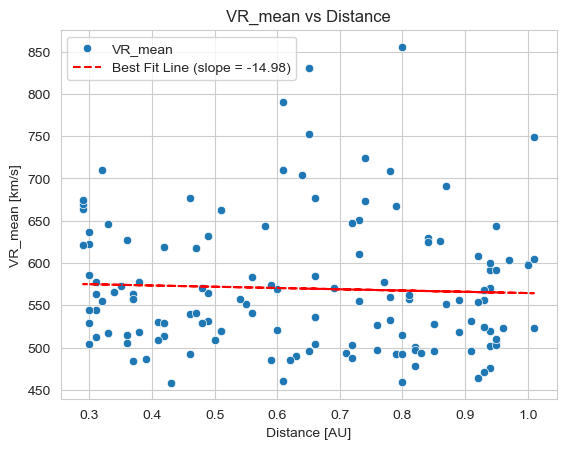

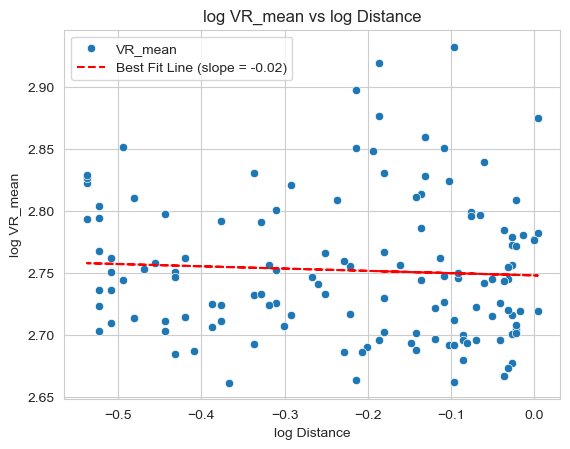

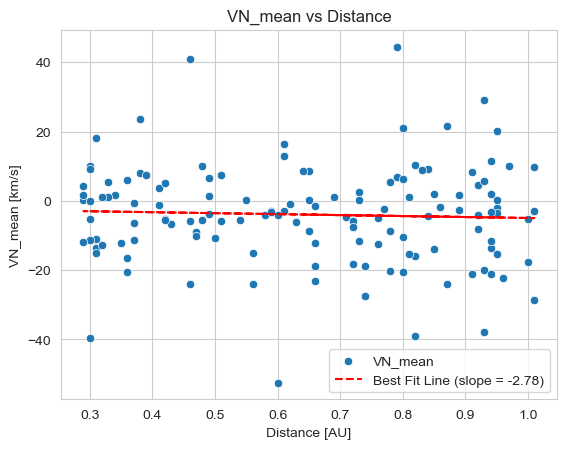

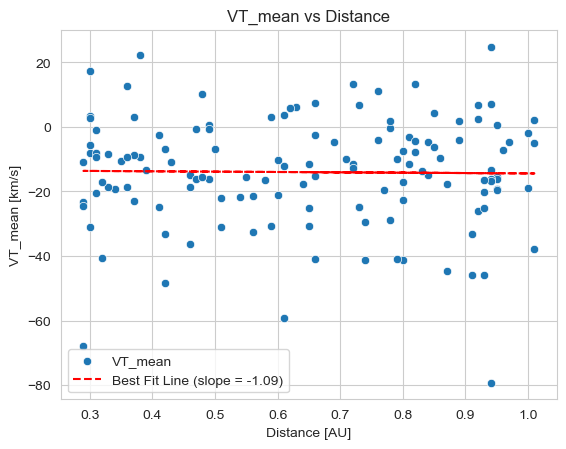

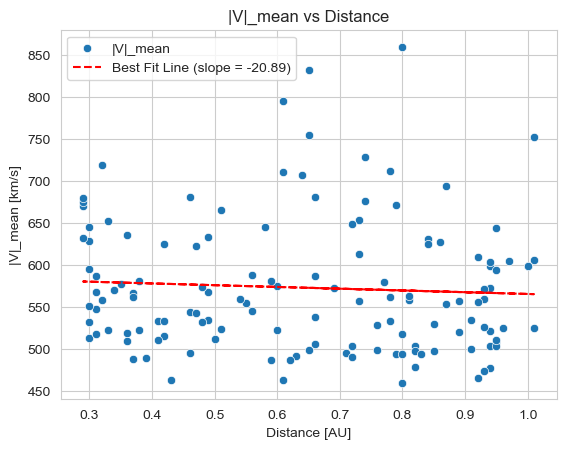

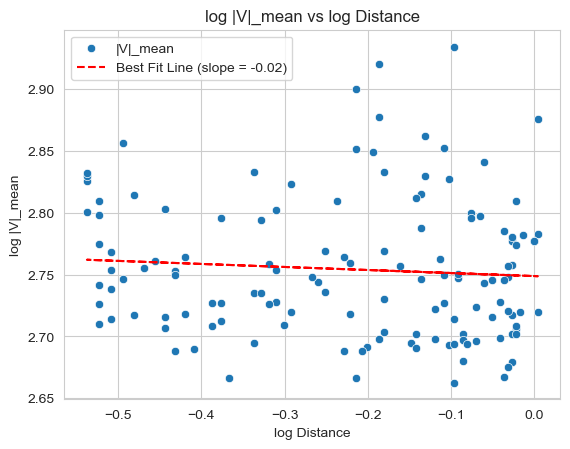

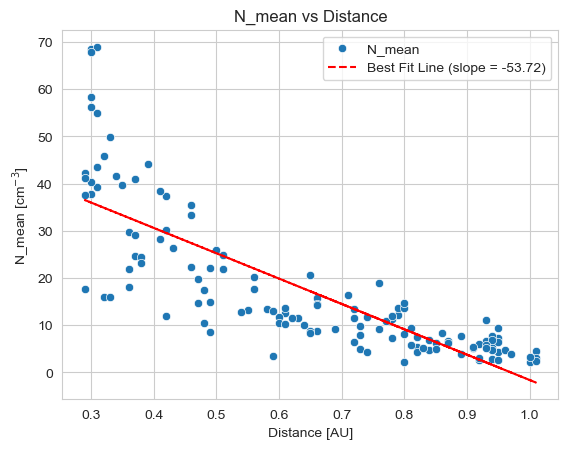

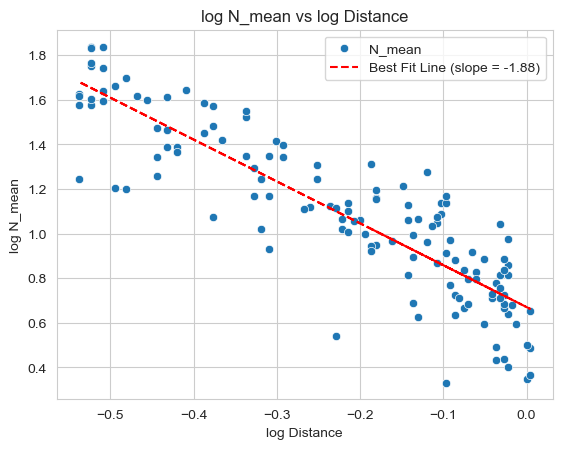

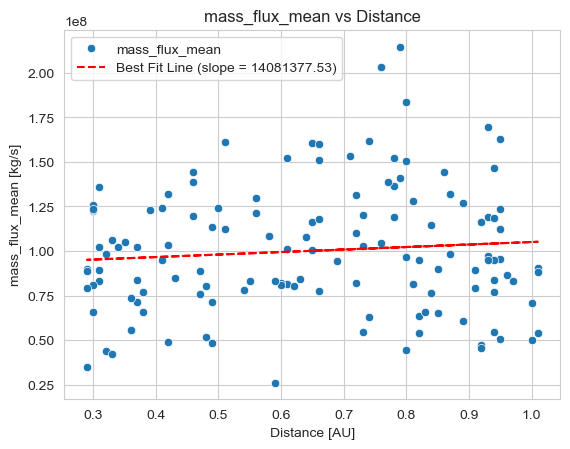

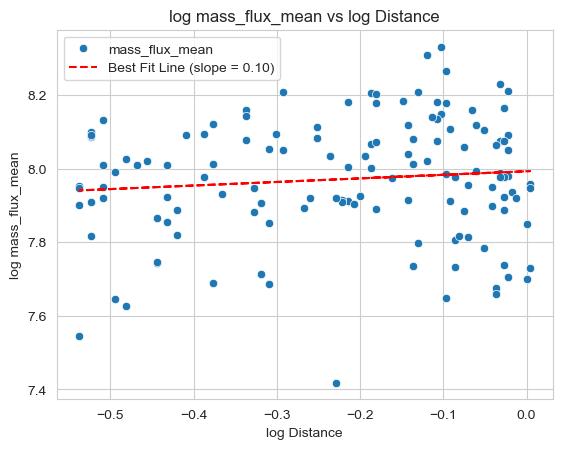

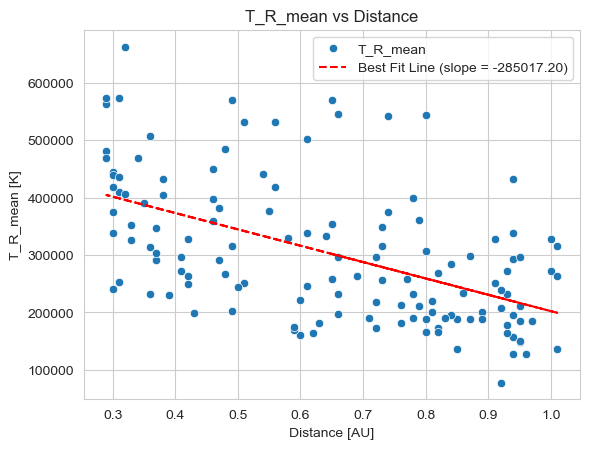

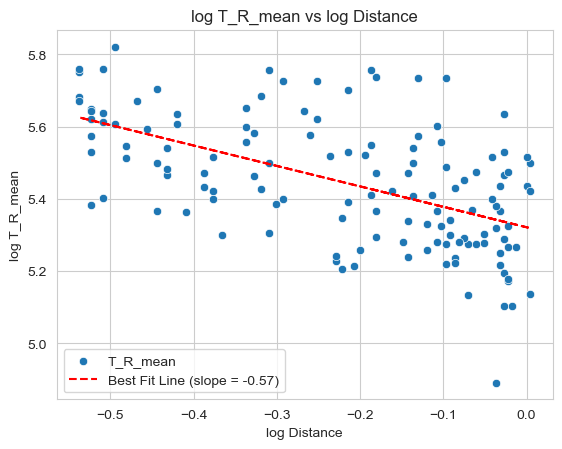

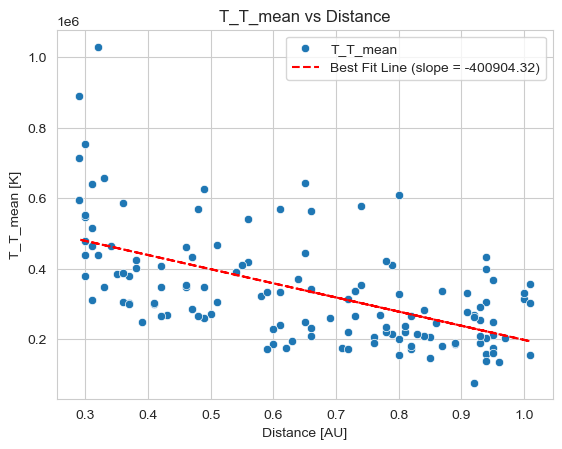

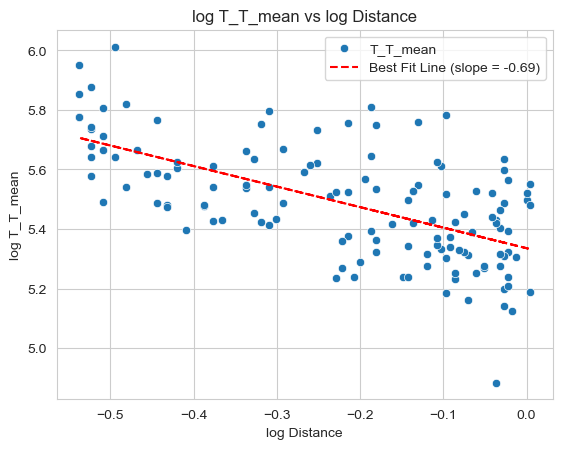

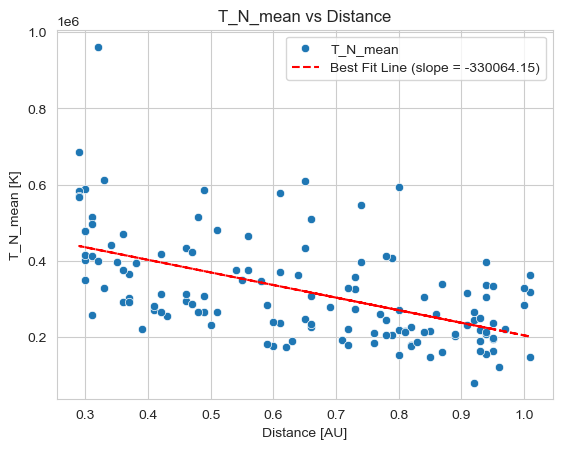

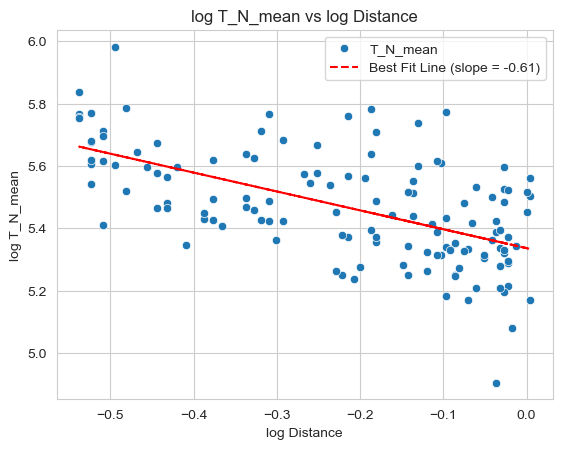

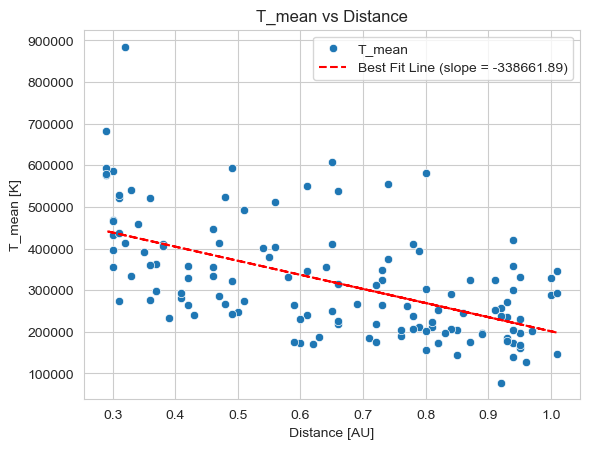

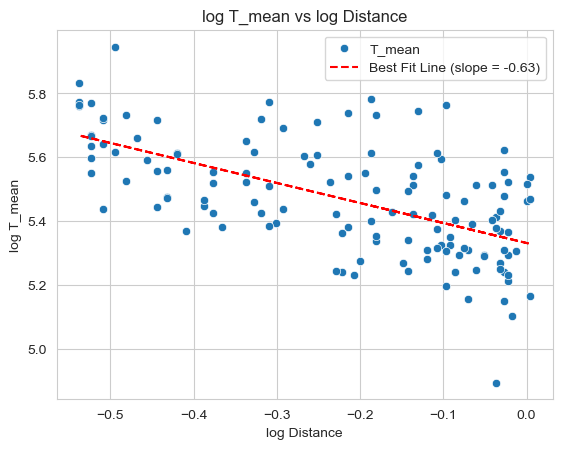

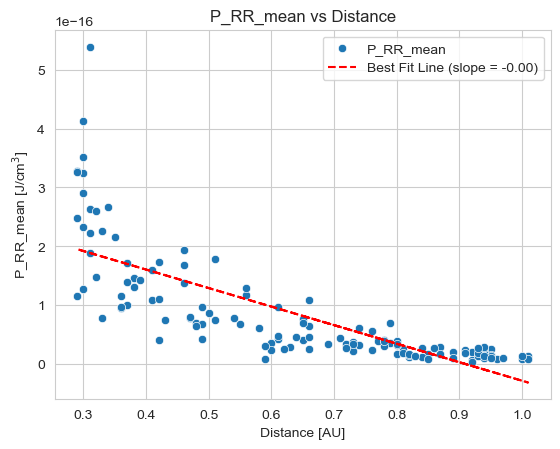

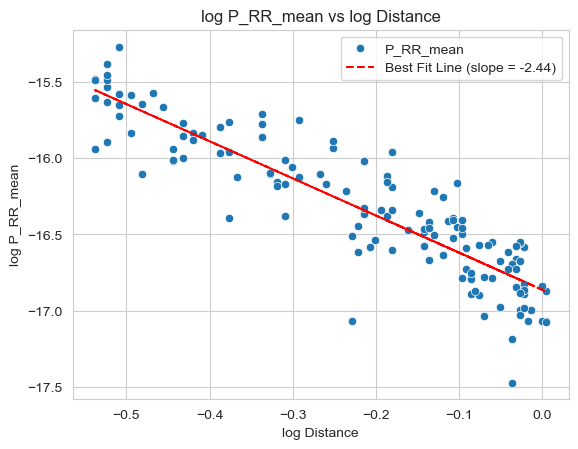

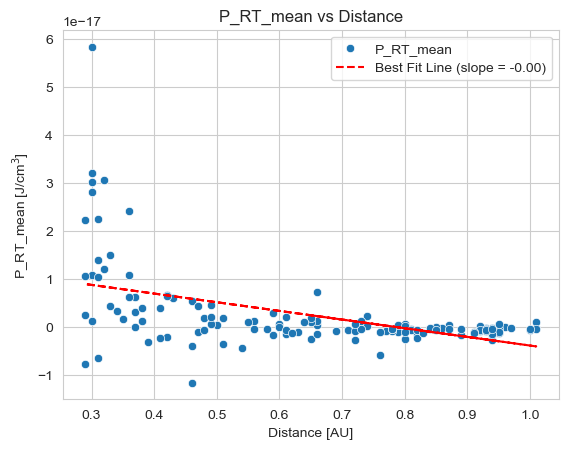

/Users/stefanipetropoulou/miniforge3/envs/sunpy/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log10



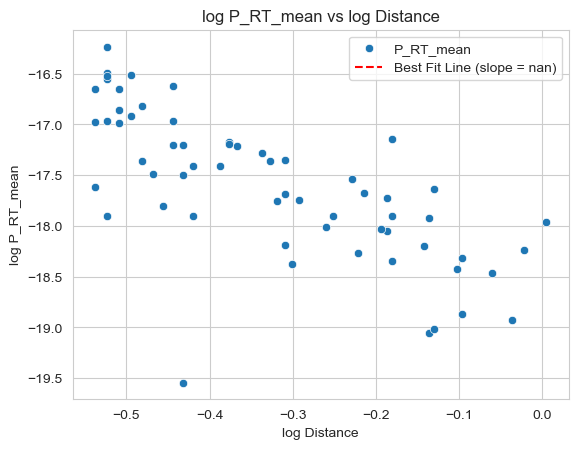

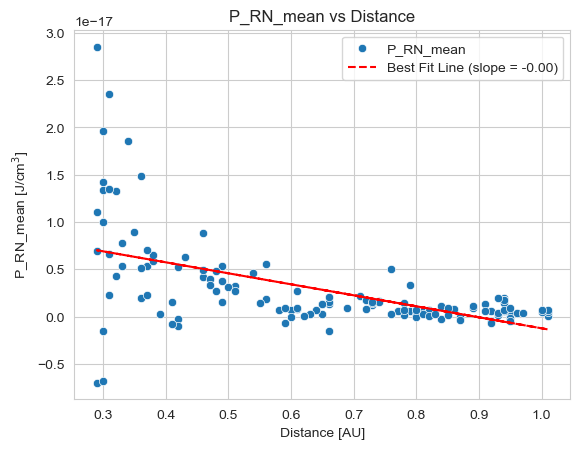

/Users/stefanipetropoulou/miniforge3/envs/sunpy/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log10



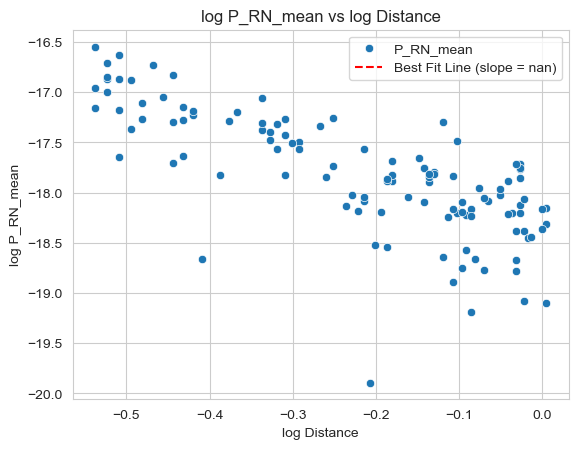

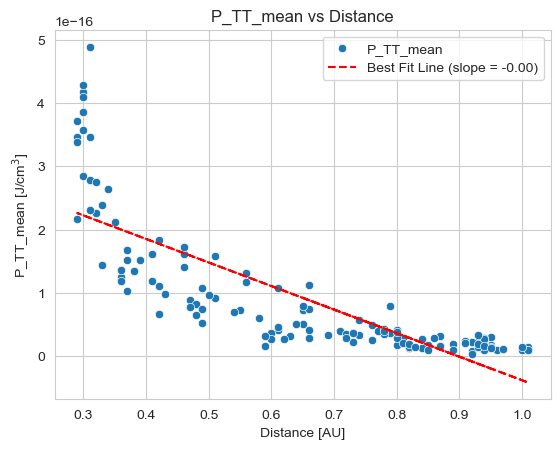

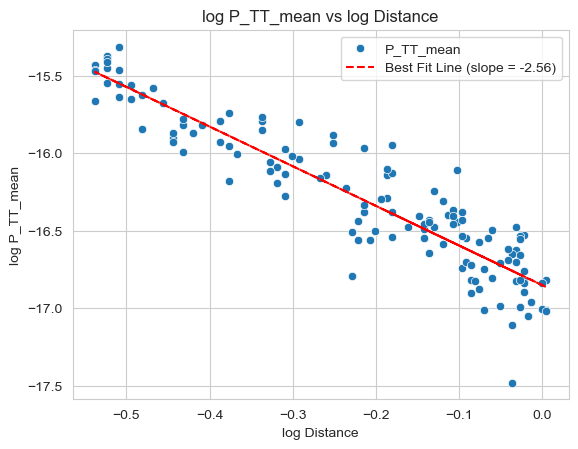

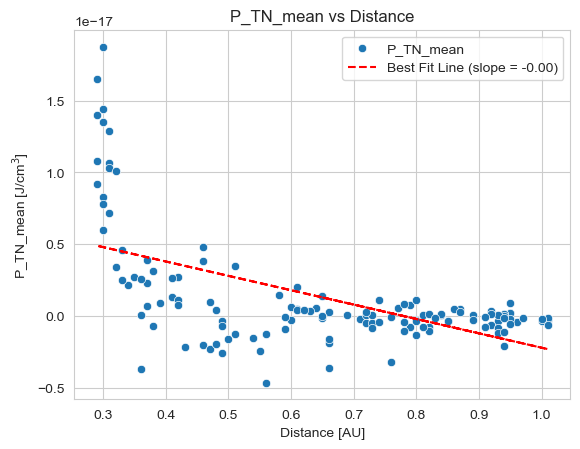

/Users/stefanipetropoulou/miniforge3/envs/sunpy/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log10



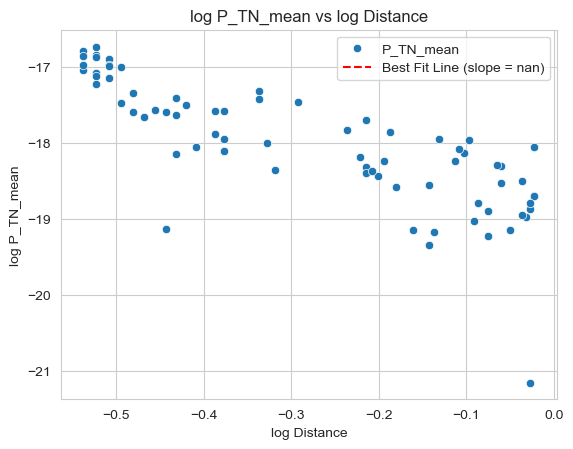

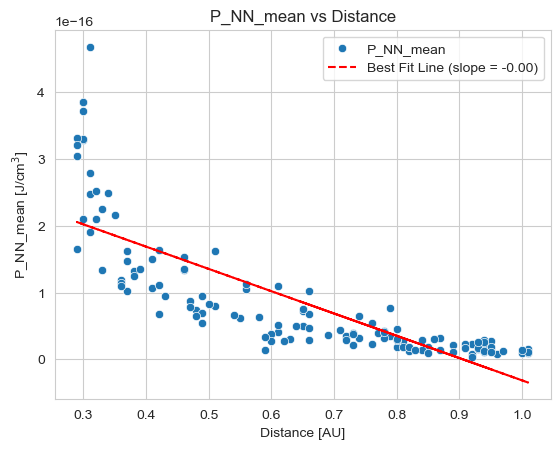

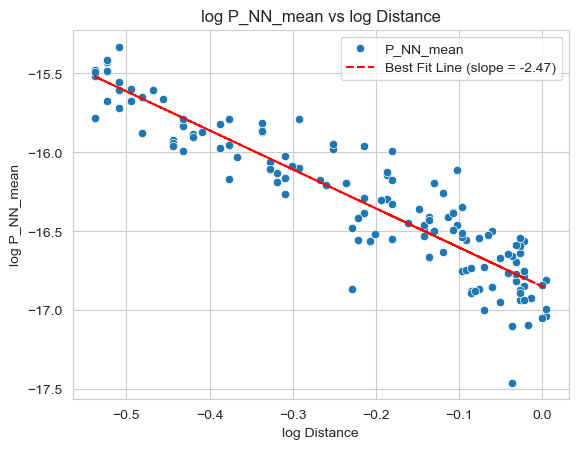

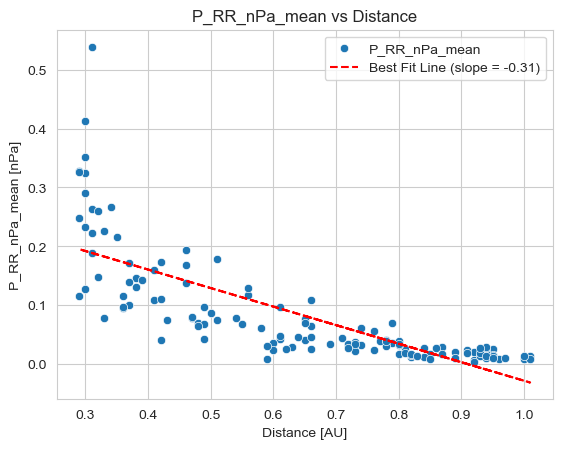

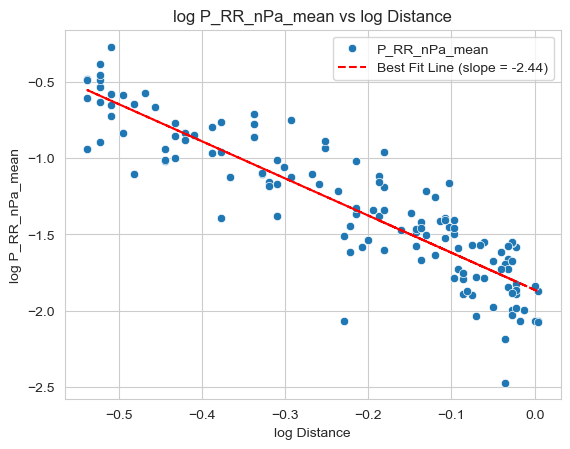

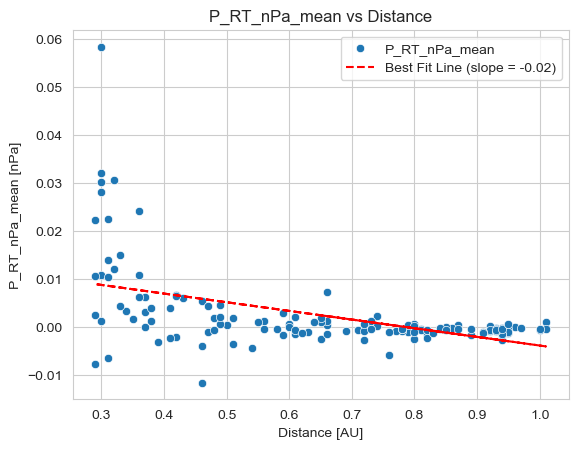

/Users/stefanipetropoulou/miniforge3/envs/sunpy/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log10



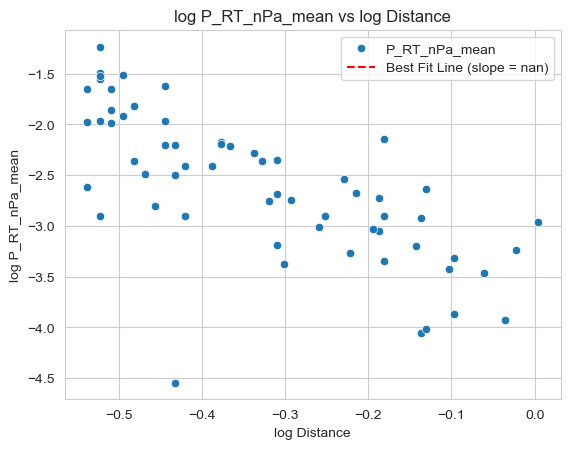

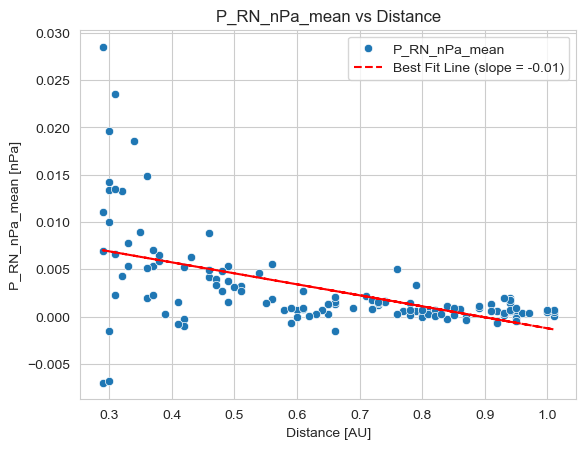

/Users/stefanipetropoulou/miniforge3/envs/sunpy/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log10



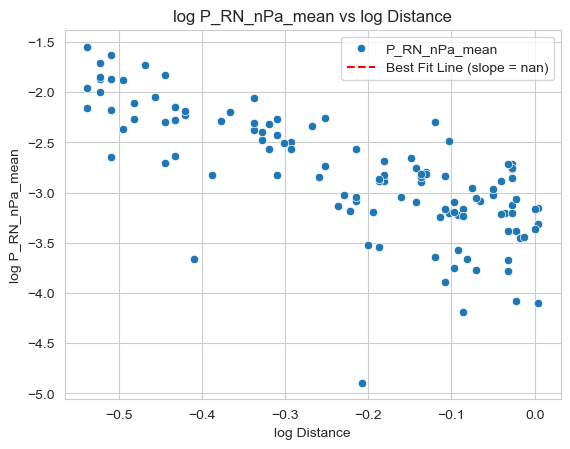

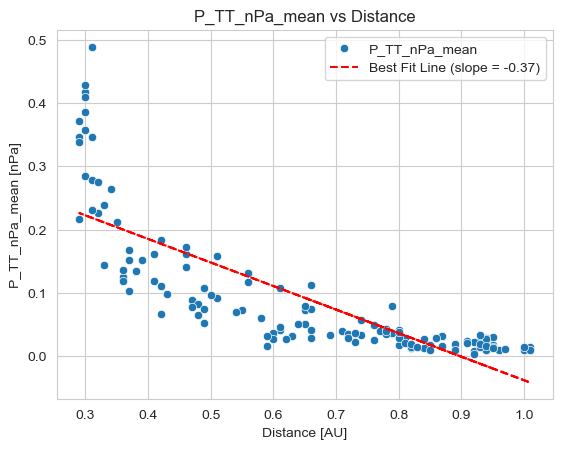

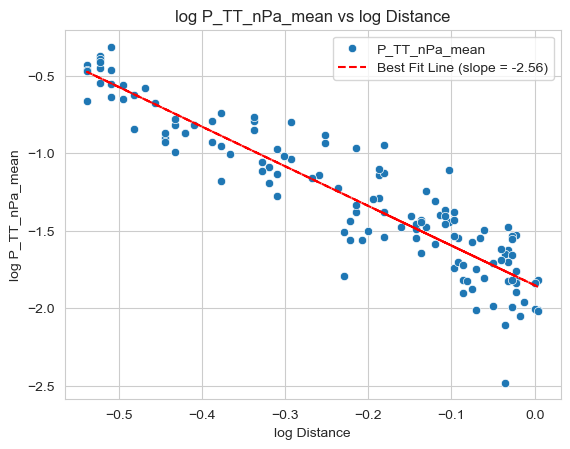

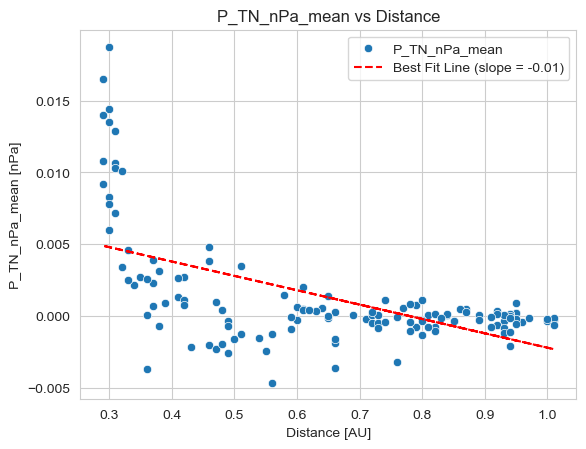

/Users/stefanipetropoulou/miniforge3/envs/sunpy/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log10



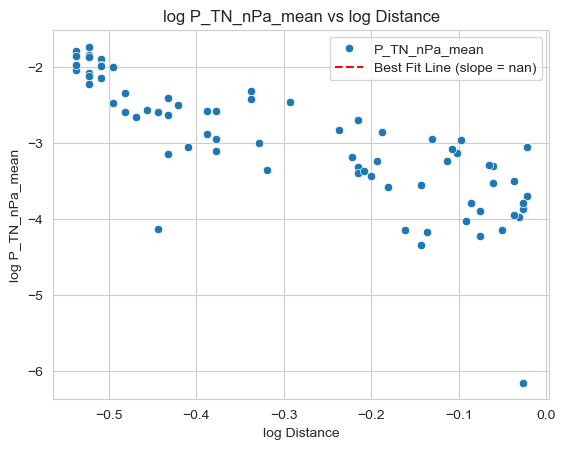

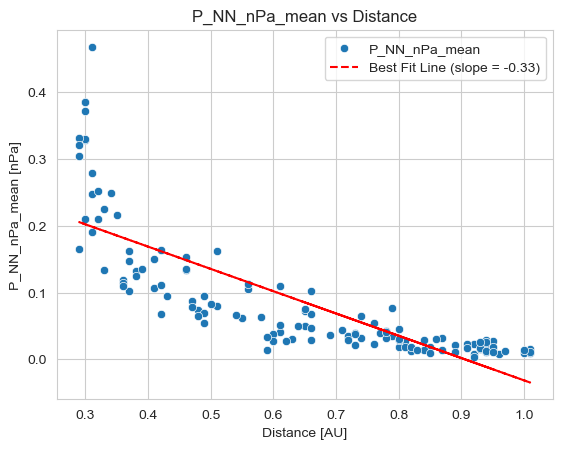

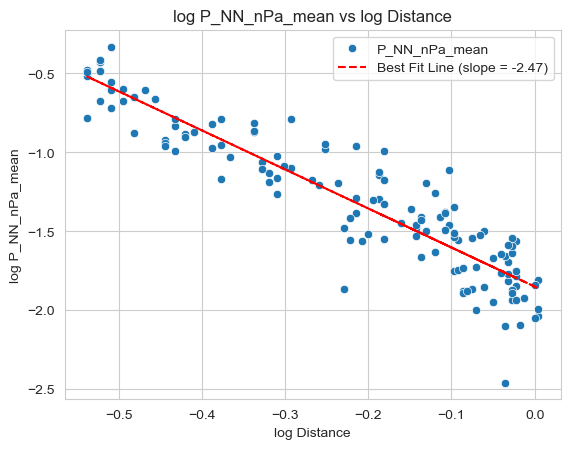

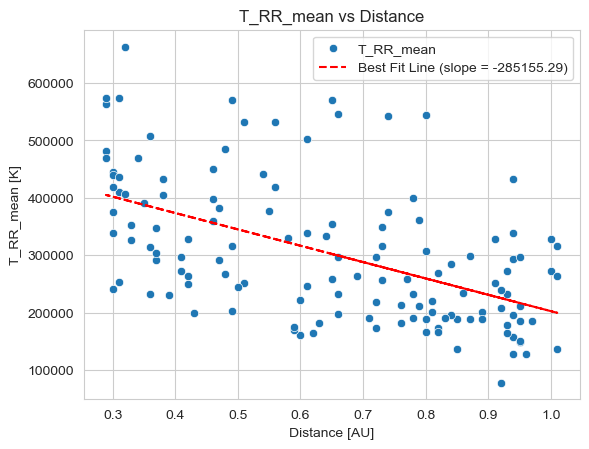

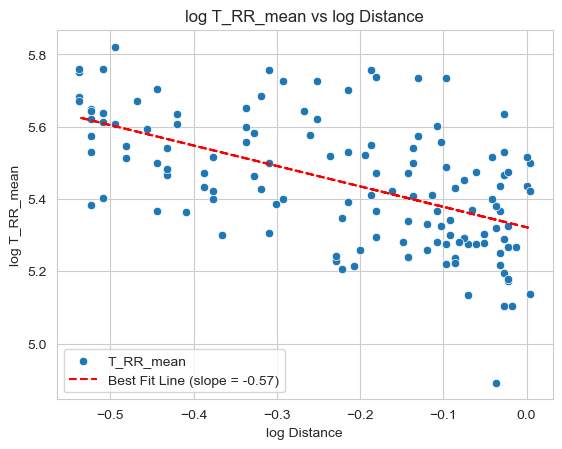

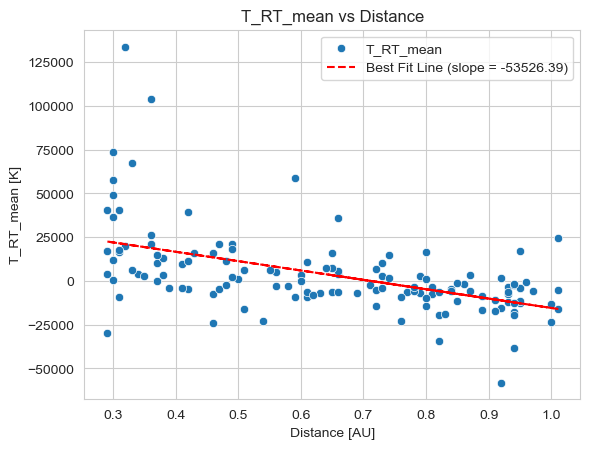

/Users/stefanipetropoulou/miniforge3/envs/sunpy/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log10



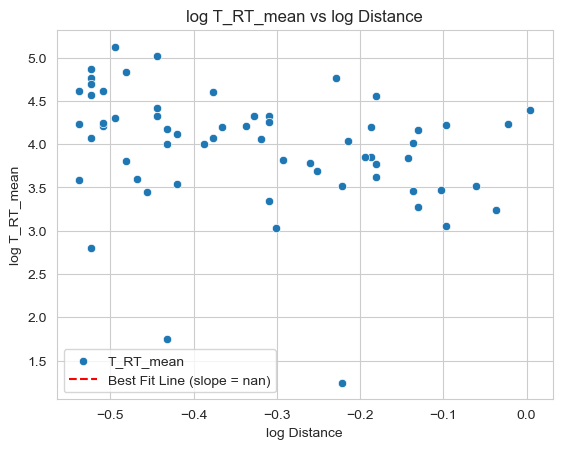

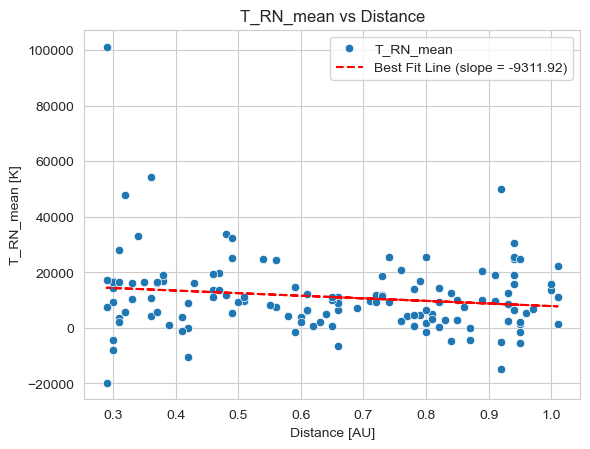

/Users/stefanipetropoulou/miniforge3/envs/sunpy/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log10



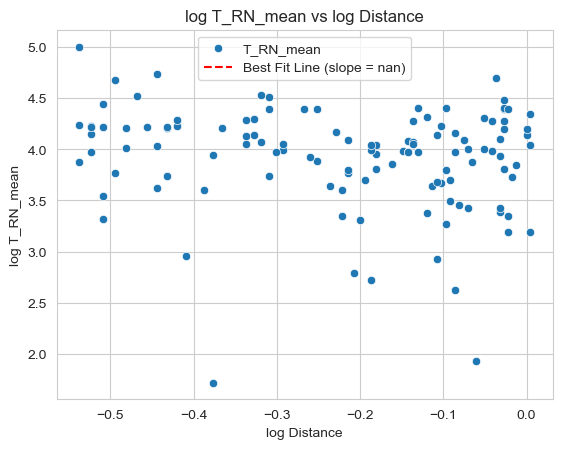

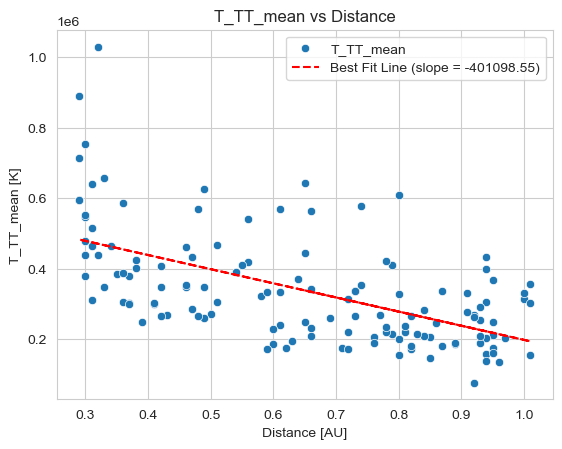

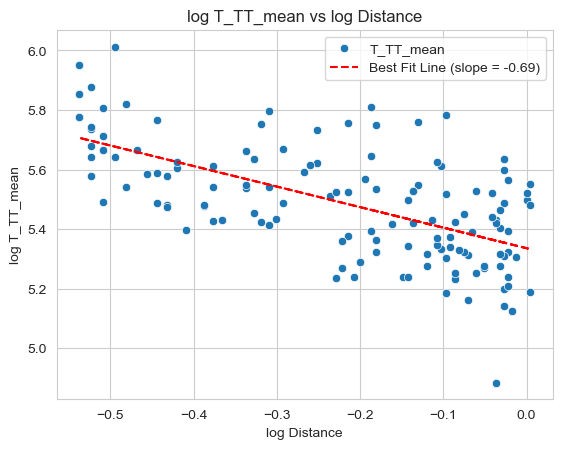

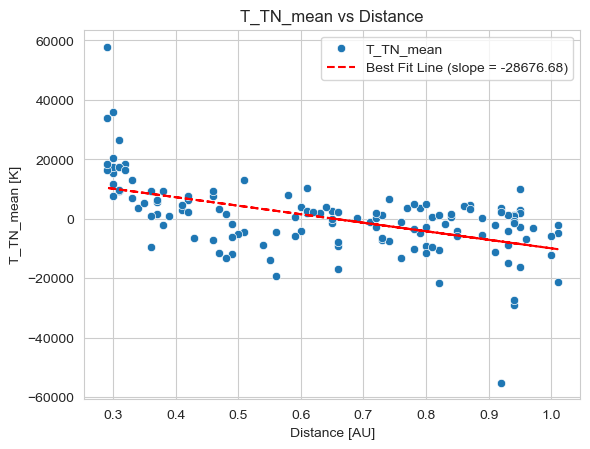

/Users/stefanipetropoulou/miniforge3/envs/sunpy/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log10



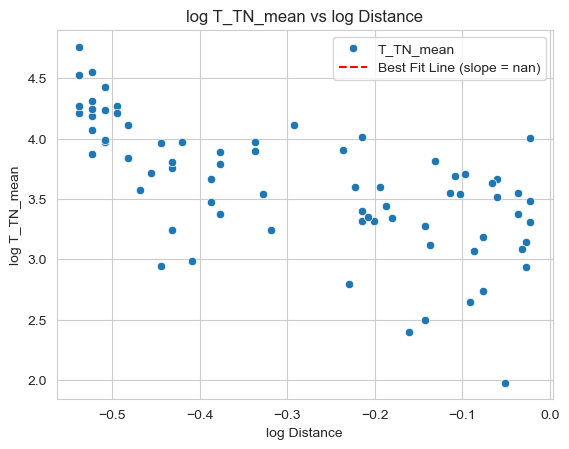

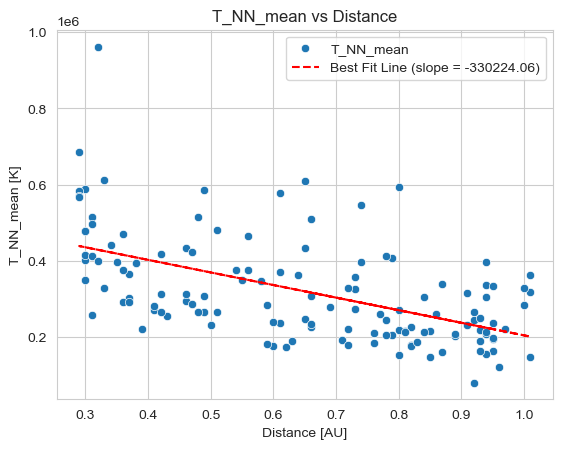

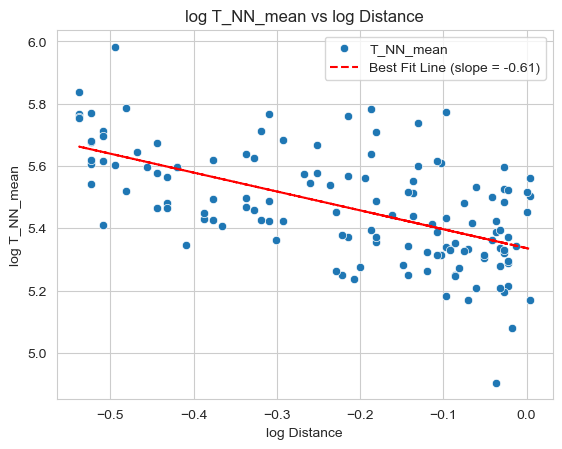

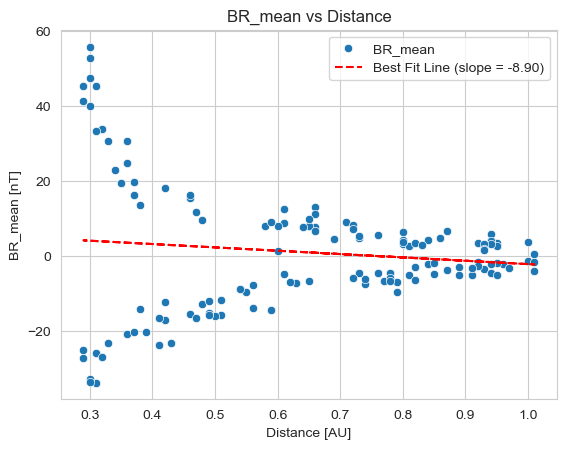

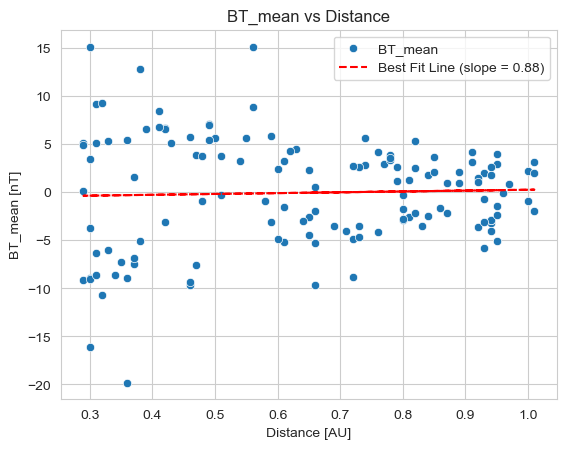

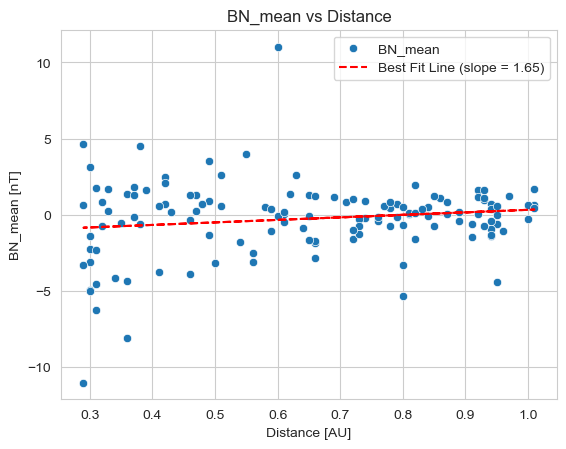

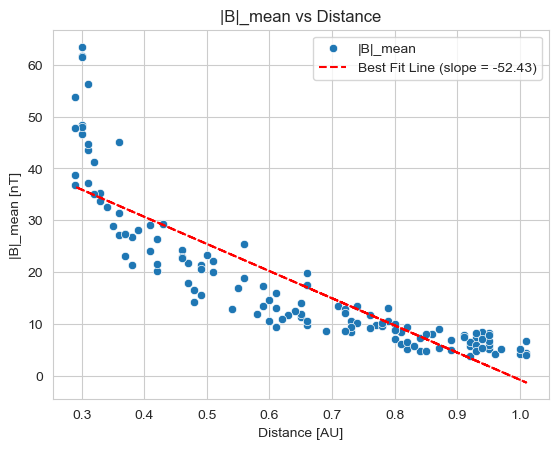

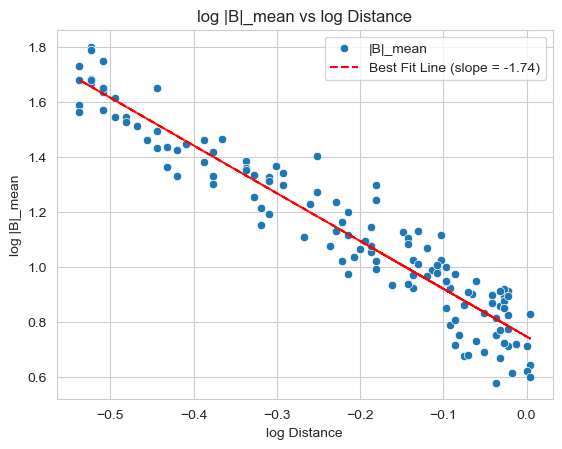

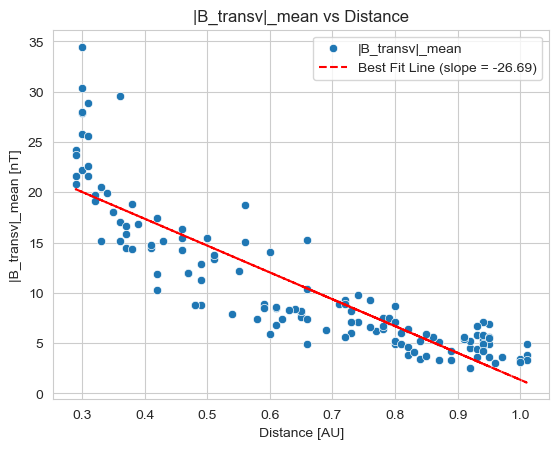

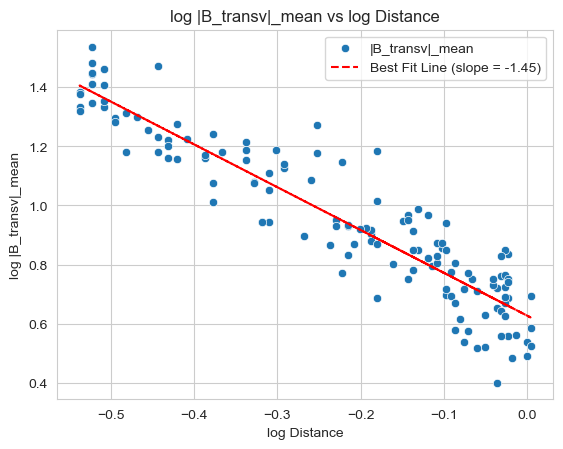

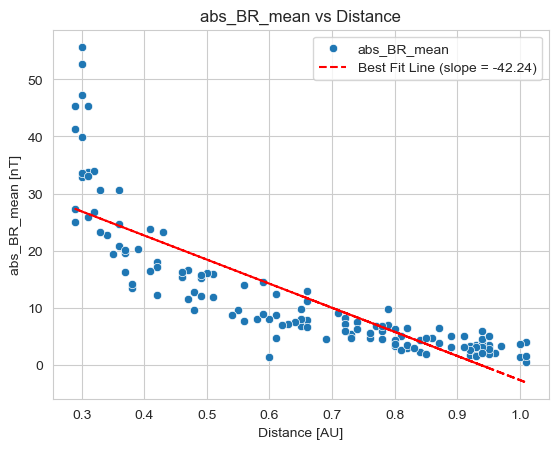

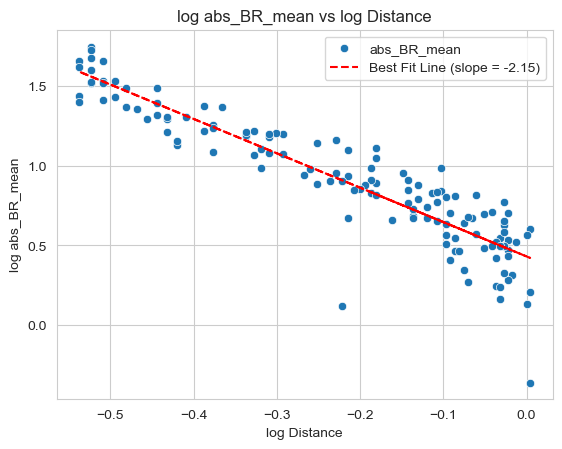

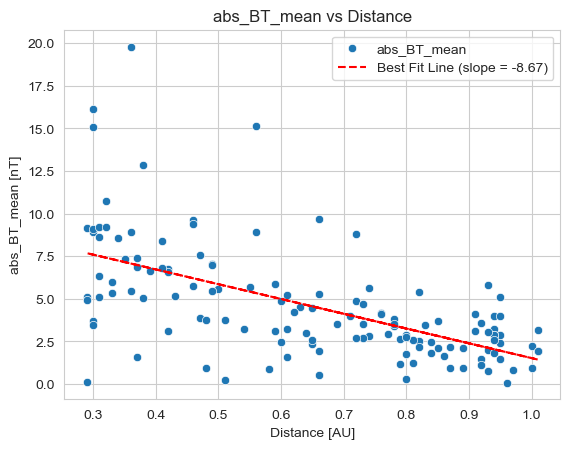

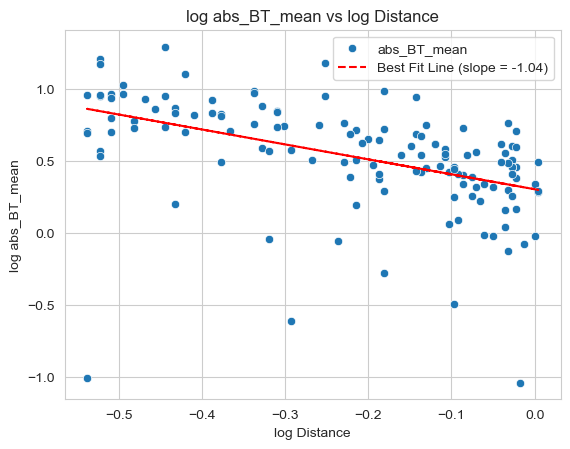

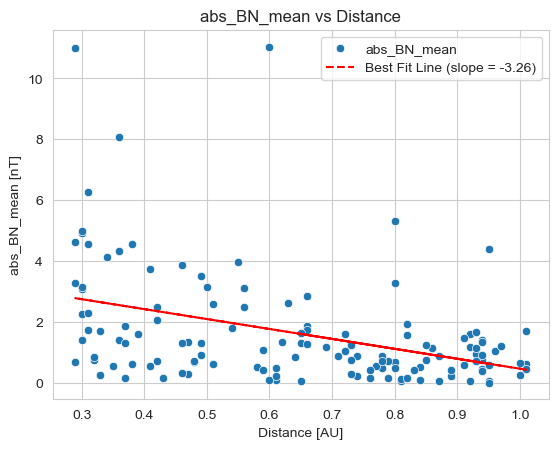

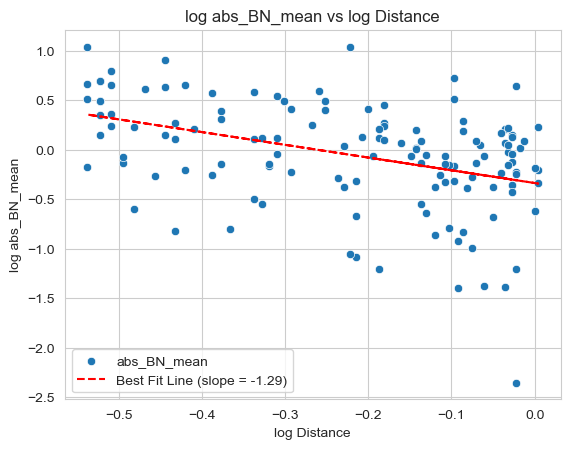

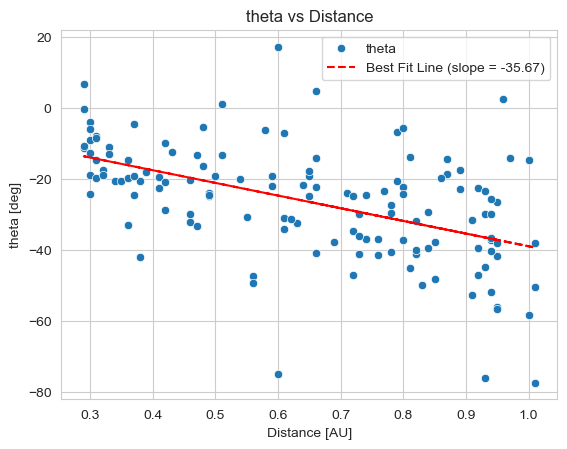

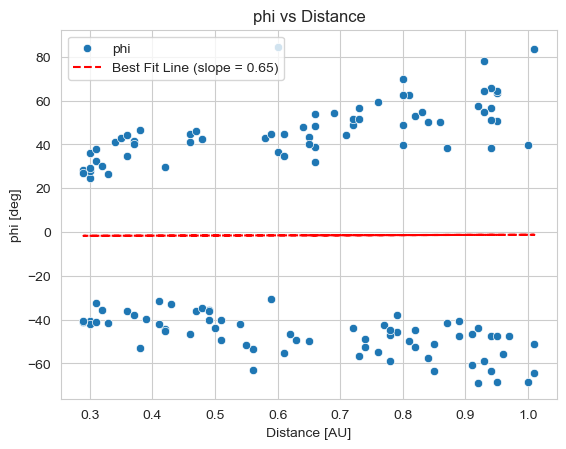

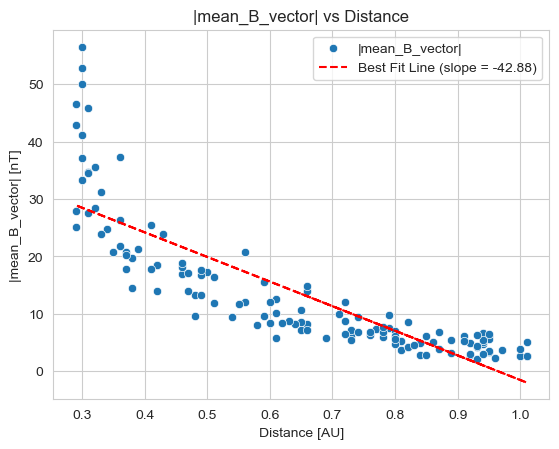

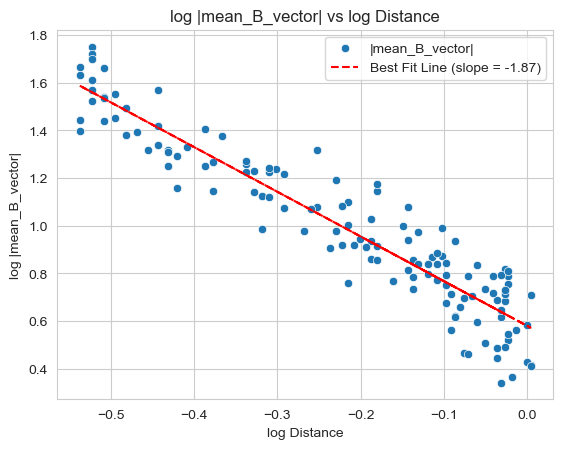

VR_mean    VN_mean    VT_mean    |V|_mean     N_mean  \
name                                                                     
Date_Range1    496.116516  -8.610609 -30.829149  498.375977  20.537035   
Date_Range10   536.230225 -18.924515 -15.096873  537.689575   8.857089   
Date_Range100  643.526001  -1.960100 -15.400931  644.386169   4.383032   
Date_Range101  506.569641   0.149152 -19.299078  507.894104   9.482888   
Date_Range102  556.190063 -19.915075 -45.952396  559.844177   6.555274   
...                   ...        ...        ...         ...        ...   
Date_Range95   492.456177  -5.913337 -36.187111  494.903259  35.407501   
Date_Range96   574.481750  -3.321916 -30.560373  580.577637   3.463761   
Date_Range97   470.783844  29.039148 -25.061211  473.194489  11.019399   
Date_Range98   600.543457 -21.184912 -13.442274  602.847168   2.741312   
Date_Range99   591.532104 -15.407187 -19.567654  594.152832   2.534470   

               Distance_mean  mass_flux_mean       T_R_mean       T_T_mean  \
name                                                                         
Date_Range1             0.65    1.603998e+08  257520.092613  247265.501825   
Date_Range10            0.66    7.779941e+07  197220.701377  230159.770422   
Date_Range100           0.95    9.541181e+07  211791.157157  247038.536489   
Date_Range101           0.95    1.629433e+08  184794.037356  210169.856613   
Date_Range102           0.93    1.188903e+08  232254.421569  254058.978065   
...                      ...             ...            ...            ...   
Date_Range95            0.46    1.388447e+08  397797.773686  353480.100780   
Date_Range96            0.59    2.621825e+07  175055.959813  334242.963195   
Date_Range97            0.93    1.697102e+08  164877.236717  207579.724738   
Date_Range98            0.94    5.474245e+07  337909.871569  397727.700225   
Date_Range99            0.95    5.090506e+07  297466.984514  366742.586203   

                    T_N_mean         T_mean     P_RR_mean     P_RT_mean  \
name                                                                      
Date_Range1    248000.564108  250928.719429  7.637191e-17 -2.634947e-18   
Date_Range10   226642.377378  218007.616344  2.485079e-17  4.462695e-19   
Date_Range100  235469.863339  231433.185690  1.282320e-17 -2.379211e-19   
Date_Range101  194056.690861  196340.194942  2.607250e-17 -1.392702e-18   
Date_Range102  217370.895149  234561.431605  2.190439e-17 -2.426981e-19   
...                      ...            ...           ...           ...   
Date_Range95   313034.189417  354770.687887  1.940282e-16 -1.163947e-17   
Date_Range96   284018.205562  264439.042878  8.489281e-18  2.867310e-18   
Date_Range97   162047.543214  178168.168231  2.640306e-17 -6.280286e-19   
Date_Range98   336542.032020  357393.201173  1.299944e-17 -5.242254e-19   
Date_Range99   332587.762405  332265.777646  1.044379e-17  5.803975e-19   

                  P_RN_mean     P_TT_mean     P_TN_mean     P_NN_mean  \
name                                                                    
Date_Range1    2.893411e-19  7.263337e-17  1.410537e-18  7.194673e-17   
Date_Range10   1.297913e-18  2.865244e-17  2.599186e-19  2.828052e-17   
Date_Range100  8.392936e-20  1.495811e-17  1.980159e-19  1.427478e-17   
Date_Range101  4.122819e-19  2.958033e-17  2.004292e-19  2.758408e-17   
Date_Range102  1.640350e-19  2.370142e-17 -3.137719e-19  2.030148e-17   
...                     ...           ...           ...           ...   
Date_Range95   4.965428e-18  1.727405e-16  4.817775e-18  1.528760e-16   
Date_Range96   9.552044e-19  1.621568e-17 -8.836068e-20  1.370587e-17   
Date_Range97   1.943666e-18  3.345260e-17 -1.154298e-18  2.579206e-17   
Date_Range98   7.459585e-19  1.528256e-17 -1.081838e-18  1.292465e-17   
Date_Range99   8.590463e-19  1.280485e-17 -5.790381e-19  1.162818e-17   

               P_RR_nPa_mean  P_RT_nPa_mean  P_RN_nPa_mean  P_TT_nPa_mean  \
name                                 

In [211]:

# Calculate angles and mean magnetic field vector magnitude
mean_values_df['theta'] = np.degrees(np.arctan(mean_values_df['BT_mean'] / mean_values_df['BR_mean']))
mean_values_df['phi'] = np.degrees(np.arctan(mean_values_df['|B_transv|_mean'] / mean_values_df['BR_mean']))
mean_values_df['|mean_B_vector|'] = np.linalg.norm(mean_values_df[['BR_mean','BT_mean','BN_mean']], axis=1)

# Define units for each parameter
UNITS = {
    # Velocities
    'VR_mean': 'km/s', 'VN_mean': 'km/s', 'VT_mean': 'km/s', '|V|_mean': 'km/s',

    # Density
    'N_mean': r'cm$^{-3}$',

    # Distance
    'Distance_mean': 'AU',

    # Mass flux
    'mass_flux_mean': 'kg/s',

    # Temperatures (scalar + tensor)
    'T_mean': 'K','T_R_mean': 'K', 'T_T_mean': 'K', 'T_N_mean': 'K',
    'T_RR_mean': 'K', 'T_RT_mean': 'K', 'T_RN_mean': 'K',
    'T_TT_mean': 'K', 'T_TN_mean': 'K', 'T_NN_mean': 'K',

    # Pressure tensor
    'P_RR_mean': 'J/cm$^{3}$',
    'P_RT_mean': 'J/cm$^{3}$',
    'P_RN_mean': 'J/cm$^{3}$',
    'P_TT_mean': 'J/cm$^{3}$',
    'P_TN_mean': 'J/cm$^{3}$',
    'P_NN_mean': 'J/cm$^{3}$',


    'P_RR_nPa_mean': 'nPa',
    'P_RT_nPa_mean': 'nPa',
    'P_RN_nPa_mean': 'nPa',
    'P_TT_nPa_mean': 'nPa',
    'P_TN_nPa_mean': 'nPa',
    'P_NN_nPa_mean': 'nPa',

    # Magnetic field
    'BR_mean': 'nT', 'BT_mean': 'nT', 'BN_mean': 'nT',
    '|B|_mean': 'nT', '|B_transv|_mean': 'nT',
    'abs_BR_mean': 'nT', 'abs_BT_mean': 'nT', 'abs_BN_mean': 'nT','|mean_B_vector|': 'nT',

    # Derived angles
    'theta': 'deg',
    'phi': 'deg',

}




# # Function to redo the data plots for a given DataFrame
# def redo_data_plots(df, group_name):
#     skip_log_plots = ['VN_mean','VT_mean', 'BR_mean','BT_mean','BN_mean','theta','phi']
#     columns = df.columns.drop('Distance_mean')
#     for col in columns:
#         x = df['Distance_mean']
#         y = df[col]
#         slope, intercept, _, _, _ = linregress(x, y)
#
#         plt.figure()
#         sns.scatterplot(x=x, y=y, label=col)
#         plt.plot(x, slope * x + intercept, color='red', linestyle='--', label=f'Best Fit Line (slope = {slope:.2f})')
#         plt.title(f'{col} vs Distance_mean ({group_name})')
#         plt.xlabel('Distance [AU]')
#         plt.ylabel(col)
#         plt.legend()
#         plt.show()
#
#         if col in skip_log_plots:
#             continue
#         x = np.log10(
# df['Distance_mean'])
#         y = np.log10(
# df[col])
#         slope, intercept, _, _, _ = linregress(x, y)
#
#         plt.figure()
#         sns.scatterplot(x=x, y=y, label=col)
#         plt.plot(x, slope * x + intercept, color='red', linestyle='--', label=f'Best Fit Line (slope = {slope:.2f})')
#         plt.title(f'log {col} vs log Distance_mean ({group_name})')
#         plt.xlabel('log Distance')
#         plt.ylabel('log ' + col)
#         plt.legend()
#         plt.show()
# #
# # # Redo the data plots for positive BR_mean
# # redo_data_plots(positive_BR_mean_df, 'Positive BR_mean')
# #
# # # Redo the data plots for negative BR_mean
# redo_data_plots(mean_values_df,'')
# mean_values_df



# -------------------

# Function to redo the data plots for a given DataFrame
def redo_data_plots(df):
    skip_log_plots = ['VN_mean','VT_mean', 'BR_mean','BT_mean','BN_mean','theta','phi']
    columns = df.columns.drop('Distance_mean')
    for col in columns:
        x = df['Distance_mean']
        y = df[col]
        slope, intercept, _, _, _ = linregress(x, y)

        plt.figure()
        sns.scatterplot(x=x, y=y, label=col)
        plt.plot(x, slope * x + intercept, color='red', linestyle='--', label=f'Best Fit Line (slope = {slope:.2f})')
        plt.title(f'{col} vs Distance')
        plt.xlabel(f"Distance [{UNITS['Distance_mean']}]")
        plt.ylabel(f"{col} [{UNITS.get(col, '')}]")
        plt.legend()
        plt.show()

        if col in skip_log_plots:
            continue
        x = np.log10(df['Distance_mean'])
        y = np.log10(df[col])
        slope, intercept, _, _, _ = linregress(x, y)

        plt.figure()
        sns.scatterplot(x=x, y=y, label=col)
        plt.plot(x, slope * x + intercept, color='red', linestyle='--', label=f'Best Fit Line (slope = {slope:.2f})')
        plt.title(f'log {col} vs log Distance')
        plt.xlabel('log Distance')
        plt.ylabel('log ' + col)
        plt.legend()
        plt.show()
#
# # Redo the data plots for positive BR_mean
# redo_data_plots(positive_BR_mean_df, 'Positive BR_mean')
#
# # Redo the data plots for negative BR_mean
redo_data_plots(mean_values_df)
mean_values_df









In [212]:
MAG_df['|B|'].min()

np.float32(0.39783782)

In [213]:
MAG_df_extra

BR         BT        BN        |B|  \
EPOCH                                                                      
2021-08-21 00:08:29.999999776 -13.179045  14.118096  0.086142  19.313604   
2021-08-21 00:09:29.999996200 -13.549139  13.454594  1.530531  19.155882   
2021-08-21 00:10:30.000002682 -14.307286  13.455720  2.443442  19.792049   
2021-08-21 00:11:29.999999105 -12.954463  10.547703  9.633520  19.284109   
2021-08-21 00:12:29.999995529 -14.416012   9.818862  8.968830  19.613041   
...                                  ...        ...       ...        ...   
2025-05-14 23:55:29.999995976  -7.750103   5.254740  6.910071  11.637245   
2025-05-14 23:56:30.000002458  -8.614252   5.152640  6.119097  11.755781   
2025-05-14 23:57:29.999998882  -9.546777   3.361250  6.075851  11.804869   
2025-05-14 23:58:29.999995306  -8.314919   3.223910  7.852269  11.882322   
2025-05-14 23:59:30.000001788  -8.794729   4.411563  6.581347  11.837368   

                               Distance           name  |B_transv|  
EPOCH                                                               
2021-08-21 00:08:29.999999776      0.65    Date_Range1   14.118360  
2021-08-21 00:09:29.999996200      0.65    Date_Range1   13.541368  
2021-08-21 00:10:30.000002682      0.65    Date_Range1   13.675775  
2021-08-21 00:11:29.999999105      0.65    Date_Range1   14.284913  
2021-08-21 00:12:29.999995529      0.65    Date_Range1   13.298494  
...                                 ...            ...         ...  
2025-05-14 23:55:29.999995976      0.74  Date_Range134    8.681093  
2025-05-14 23:56:30.000002458      0.74  Date_Range134    7.999566  
2025-05-14 23:57:29.999998882      0.74  Date_Range134    6.943628  
2025-05-14 23:58:29.999995306      0.74  Date_Range134    8.488329  
2025-05-14 23:59:30.000001788      0.74  Date_Range134    7.923132  

[111917 rows x 7 columns]

In [214]:
#merge sw_df_extra and mag_df_extra with mean_values_df
SWA_df_extra_wmean = pd.merge(SWA_df_extra.reset_index(), mean_values_df[['|V|_mean','VR_mean','VN_mean','VT_mean','N_mean','T_R_mean','T_T_mean','T_N_mean','T_mean','T_RR_mean','T_RT_mean','T_RN_mean','T_TT_mean','T_TN_mean','T_NN_mean']].reset_index(), on='name', how='left')

MAG_df_extra_wmean = pd.merge(MAG_df_extra.reset_index(), mean_values_df[['|B|_mean', 'BR_mean', 'BT_mean', 'BN_mean','|B_transv|_mean']].reset_index(), on='name', how='left')
SWA_df_extra_wmean

Epoch          VR         VT         VN  \
0       2021-08-21 00:08:01.118751  437.473389 -26.718201   6.084368   
1       2021-08-21 00:08:05.118758  439.720306 -22.816080   3.323184   
2       2021-08-21 00:08:09.118765  432.573883 -27.319345   2.573995   
3       2021-08-21 00:08:13.118772  436.548035 -27.892700   1.240144   
4       2021-08-21 00:08:17.118779  437.345337 -25.834433   1.337073   
...                            ...         ...        ...        ...   
3167022 2025-05-14 23:59:54.729239  637.353821 -11.448981  37.776844   
3167023 2025-05-14 23:59:55.729241  631.091003 -19.316486  34.539440   
3167024 2025-05-14 23:59:56.729241  630.593201 -17.627209  35.446499   
3167025 2025-05-14 23:59:57.729243  633.294373 -14.713834  35.602718   
3167026 2025-05-14 23:59:58.729245  627.194397 -24.238518  30.672318   

                 N            T_R            T_T            T_N  \
0        26.741230  371061.218305  387029.028698  281682.671218   
1        26.076748  334987.251559  390647.915060  283368.031971   
2        25.579350  392441.953073  395567.874071  276858.795299   
3        25.094852  378040.467526  398981.668072  279699.278019   
4        26.132803  378733.257392  407162.033424  291730.404066   
...            ...            ...            ...            ...   
3167022  10.946076  259095.198317  282348.081497  298255.842724   
3167023  10.697098  268227.297582  298212.106214  304669.527515   
3167024  10.188207  241404.134000  271952.692085  299667.628949   
3167025  10.800016  252061.787537  285210.786613  299128.802223   
3167026  10.790687  233231.626169  298182.623910  298646.106971   

                     T          P_RR          P_TT          P_NN  \
0        346590.950606  1.369987e-16  1.428941e-16  1.039994e-16   
1        336334.406908  1.206066e-16  1.406463e-16  1.020220e-16   
2        354956.200103  1.385972e-16  1.397011e-16  9.777712e-17   
3        352240.463828  1.309822e-16  1.382379e-16  9.690929e-17   
4        359208.579717  1.366498e-16  1.469071e-16  1.052585e-16   
...                ...           ...           ...           ...   
3167022  279899.700135  3.915681e-17  4.267099e-17  4.507512e-17   
3167023  290369.658526  3.961488e-17  4.404338e-17  4.499709e-17   
3167024  271008.173812  3.395720e-17  3.825433e-17  4.215286e-17   
3167025  278800.444035  3.758555e-17  4.252848e-17  4.460383e-17   
3167026  276686.770927  3.474769e-17  4.442433e-17  4.449338e-17   

                 P_RT          P_RN          P_TN           T_RR  \
0       -3.057749e-17  6.547376e-18  3.094860e-18  371241.000000   
1       -2.247051e-17  3.485177e-18  3.781086e-18  335149.531250   
2       -3.160848e-17  7.177762e-18  1.653420e-18  392632.093750   
3       -3.178418e-17  8.530045e-18  4.017915e-19  378223.625000   
4       -3.267473e-17  1.265891e-17 -4.567090e-18  378916.750000   
...               ...           ...           ...            ...   
3167022  2.956777e-18  5.448101e-18  4.790137e-19  259220.718750   
3167023  1.140193e-18  3.440813e-18  6.461821e-19  268357.250000   
3167024  1.173169e-18  1.591415e-18  1.554560e-18  241521.078125   
3167025  3.266872e-18  4.052821e-18 -6.180652e-20  252183.921875   
3167026  3.332663e-18  4.597292e-18  1.763823e-19  233344.609375   

                 T_RT          T_RN          T_TT          T_TN          T_NN  \
0       -82859.328125  17742.173828  387216.50000   8386.495117  281819.15625   
1       -62442.511719   9684.837891  390837.12500  10507.128906  283505.31250   
2       -89543.695312  20333.890625  395759.50000   4683.975586  276992.90625   
3       -91779.835938  24631.314453  399175.00000   1160.210938  279834.75000   
4       -90603.898438  35101.953125  407359.31250 -12664.104492  291871.75000   
...               ...           ...           ...           ...           ...   
3167022  19574.064453  36066.792969  282484.84375   3171.103027  298400.31250   
3167023   7723.837402  23308.587891  298356.56250   4377.335938  304817.12500

In [215]:
SWA_df_extra_wmean['delta_|V|'] = SWA_df_extra_wmean['|V|'] - SWA_df_extra_wmean['|V|_mean']
SWA_df_extra_wmean['delta_VR'] = SWA_df_extra_wmean['VR'] - SWA_df_extra_wmean['VR_mean']
SWA_df_extra_wmean['delta_VN'] = SWA_df_extra_wmean['VN'] - SWA_df_extra_wmean['VN_mean']
SWA_df_extra_wmean['delta_VT'] = SWA_df_extra_wmean['VT'] - SWA_df_extra_wmean['VT_mean']
SWA_df_extra_wmean['delta_N'] = SWA_df_extra_wmean['N'] - SWA_df_extra_wmean['N_mean']
SWA_df_extra_wmean['delta_T_R'] = SWA_df_extra_wmean['T_R'] - SWA_df_extra_wmean['T_R_mean']
SWA_df_extra_wmean['delta_T_T'] = SWA_df_extra_wmean['T_T'] - SWA_df_extra_wmean['T_T_mean']
SWA_df_extra_wmean['delta_T_N'] = SWA_df_extra_wmean['T_N'] - SWA_df_extra_wmean['T_N_mean']
SWA_df_extra_wmean['delta_T'] = SWA_df_extra_wmean['T'] - SWA_df_extra_wmean['T_mean']

SWA_df_extra_wmean['delta_T_RR'] = SWA_df_extra_wmean['T_RR'] - SWA_df_extra_wmean['T_RR_mean']
SWA_df_extra_wmean['delta_T_RT'] = SWA_df_extra_wmean['T_RT'] - SWA_df_extra_wmean['T_RT_mean']
SWA_df_extra_wmean['delta_T_RN'] = SWA_df_extra_wmean['T_RN'] - SWA_df_extra_wmean['T_RN_mean']
SWA_df_extra_wmean['delta_T_TT'] = SWA_df_extra_wmean['T_TT'] - SWA_df_extra_wmean['T_TT_mean']
SWA_df_extra_wmean['delta_T_TN'] = SWA_df_extra_wmean['T_TN'] - SWA_df_extra_wmean['T_TN_mean']
SWA_df_extra_wmean['delta_T_NN'] = SWA_df_extra_wmean['T_NN'] - SWA_df_extra_wmean['T_NN_mean']


MAG_df_extra_wmean['delta_|B|'] = MAG_df_extra_wmean['|B|'] - MAG_df_extra_wmean['|B|_mean']
MAG_df_extra_wmean['delta_BR'] = MAG_df_extra_wmean['BR'] - MAG_df_extra_wmean['BR_mean']
MAG_df_extra_wmean['delta_BT'] = MAG_df_extra_wmean['BT'] - MAG_df_extra_wmean['BT_mean']
MAG_df_extra_wmean['delta_BN'] = MAG_df_extra_wmean['BN'] - MAG_df_extra_wmean['BN_mean']
MAG_df_extra_wmean['delta_|B_transv|'] = MAG_df_extra_wmean['|B_transv|'] -MAG_df_extra_wmean['|B_transv|_mean']



MAG_df_extra_wmean['squared_delta_BR'] = MAG_df_extra_wmean['delta_BR'] ** 2
MAG_df_extra_wmean['squared_delta_BT'] = MAG_df_extra_wmean['delta_BT'] ** 2
MAG_df_extra_wmean['squared_delta_BN'] = MAG_df_extra_wmean['delta_BN'] ** 2
MAG_df_extra_wmean['squared_delta_|B|'] = MAG_df_extra_wmean['delta_|B|'] ** 2

SWA_df_extra_wmean['squared_delta_|V|'] = SWA_df_extra_wmean['delta_|V|'] ** 2
SWA_df_extra_wmean['squared_delta_VR'] = SWA_df_extra_wmean['delta_VR'] ** 2
SWA_df_extra_wmean['squared_delta_VN'] = SWA_df_extra_wmean['delta_VN'] ** 2
SWA_df_extra_wmean['squared_delta_VT'] = SWA_df_extra_wmean['delta_VT'] ** 2
SWA_df_extra_wmean['squared_delta_N'] = SWA_df_extra_wmean['delta_N'] ** 2
SWA_df_extra_wmean['squared_delta_T_R'] = SWA_df_extra_wmean['delta_T_R'] ** 2
SWA_df_extra_wmean['squared_delta_T_T'] = SWA_df_extra_wmean['delta_T_T'] ** 2
SWA_df_extra_wmean['squared_delta_T_N'] = SWA_df_extra_wmean['delta_T_N'] ** 2
SWA_df_extra_wmean['squared_delta_T'] = SWA_df_extra_wmean['delta_T'] ** 2
SWA_df_extra_wmean['squared_delta_T_RR'] = SWA_df_extra_wmean['delta_T_RR'] ** 2
SWA_df_extra_wmean['squared_delta_T_RT'] = SWA_df_extra_wmean['delta_T_RT'] ** 2
SWA_df_extra_wmean['squared_delta_T_RN'] = SWA_df_extra_wmean['delta_T_RN'] ** 2
SWA_df_extra_wmean['squared_delta_T_TT'] = SWA_df_extra_wmean['delta_T_TT'] ** 2
SWA_df_extra_wmean['squared_delta_T_TN'] = SWA_df_extra_wmean['delta_T_TN'] ** 2
SWA_df_extra_wmean['squared_delta_T_NN'] = SWA_df_extra_wmean['delta_T_NN'] ** 2




SWA_delta_means = SWA_df_extra_wmean.groupby('name')[['delta_|V|','delta_VR','delta_VN','delta_VT','delta_N', 'squared_delta_|V|','squared_delta_VR','squared_delta_VN','squared_delta_VT', 'squared_delta_N','delta_T_R','delta_T_T','delta_T_N','delta_T','delta_T_RR','delta_T_RT','delta_T_RN','delta_T_TT','delta_T_TN','delta_T_NN']].mean()
MAG_delta_means = MAG_df_extra_wmean.groupby('name')[['delta_|B|', 'squared_delta_BR', 'squared_delta_BT', 'squared_delta_BN', 'squared_delta_|B|','delta_|B_transv|']].mean()
#new dataframe
all_delta_means = pd.merge(SWA_delta_means, MAG_delta_means, on='name', how='left')
all_delta_means.rename(columns=lambda x: "mean_"+x, inplace=True)
#new columns
all_delta_means['root_mean_squared_delta_BR'] = np.sqrt(all_delta_means['mean_squared_delta_BR'])
all_delta_means['root_mean_squared_delta_BT'] = np.sqrt(all_delta_means['mean_squared_delta_BT'])
all_delta_means['root_mean_squared_delta_BN'] = np.sqrt(all_delta_means['mean_squared_delta_BN'])
all_delta_means['root_mean_squared_delta_N'] = np.sqrt(all_delta_means['mean_squared_delta_N'])
all_delta_means['root_mean_squared_delta_|V|'] = np.sqrt(all_delta_means['mean_squared_delta_|V|'])
all_delta_means['root_mean_squared_delta_VR'] = np.sqrt(all_delta_means['mean_squared_delta_VR'])
all_delta_means['root_mean_squared_delta_VN'] = np.sqrt(all_delta_means['mean_squared_delta_VN'])
all_delta_means['root_mean_squared_delta_VT'] = np.sqrt(all_delta_means['mean_squared_delta_VT'])
all_delta_means['root_mean_squared_delta_|B|'] = np.sqrt(all_delta_means['mean_squared_delta_|B|'])



all_delta_means['Distance'] = mean_values_df['Distance_mean']
all_delta_means

mean_delta_|V|  mean_delta_VR  mean_delta_VN  mean_delta_VT  \
name                                                                         
Date_Range1     -8.303946e-07       0.000020   3.605661e-07   1.608171e-06   
Date_Range10    -3.373274e-05      -0.000013   5.695149e-07   3.605758e-08   
Date_Range100   -8.321940e-06      -0.000026   2.035644e-08  -3.873418e-07   
Date_Range101   -9.941560e-06       0.000019   4.184158e-08   1.417567e-06   
Date_Range102   -3.491441e-05      -0.000019   1.337696e-06  -1.382704e-06   
...                       ...            ...            ...            ...   
Date_Range95    -4.716691e-06      -0.000013   2.349045e-07   3.204397e-07   
Date_Range96     2.469445e-05      -0.000014  -4.844734e-07   4.313145e-07   
Date_Range97     1.020148e-06       0.000018  -8.581069e-07  -5.605003e-07   
Date_Range98    -7.717573e-06       0.000012  -2.180650e-07   1.989013e-07   
Date_Range99    -3.320767e-05      -0.000038   8.005937e-08  -4.752033e-07   

               mean_delta_N  mean_squared_delta_|V|  mean_squared_delta_VR  \
name                                                                         
Date_Range1   -3.935605e-07              616.675476             625.619080   
Date_Range10  -7.939977e-07              321.545074             299.106598   
Date_Range100 -1.820069e-07              231.517776             233.037445   
Date_Range101  6.055262e-08              208.141693             199.283646   
Date_Range102  7.270894e-08              344.898407             316.221588   
...                     ...                     ...                    ...   
Date_Range95  -1.882618e-06              297.242920             305.703308   
Date_Range96  -1.139896e-07              868.543030             753.422119   
Date_Range97  -3.153439e-07              444.301575             414.856964   
Date_Range98   2.816229e-08              592.578674             579.501038   
Date_Range99  -8.537926e-08              747.102722             717.721680   

               mean_squared_delta_VN  mean_squared_delta_VT  \
name                                                          
Date_Range1               474.038361             739.435059   
Date_Range10              362.564728             641.024780   
Date_Range100             357.278839             508.014954   
Date_Range101             526.691711             453.279999   
Date_Range102             701.803589             896.738770   
...                              ...                    ...   
Date_Range95              468.628571             594.594360   
Date_Range96             4210.224121            2001.081177   
Date_Range97              193.850067             639.838257   
Date_Range98             1114.636108            1041.187134   
Date_Range99             1564.183350             952.285767   

               mean_squared_delta_N  mean_delta_T_R  mean_delta_T_T  \
name                                                                  
Date_Range1               30.827419    2.880329e-11   -8.983205e-12   
Date_Range10               1.850509    2.205241e-12    3.182507e-11   
Date_Range100              0.085725    2.735961e-11   -1.917014e-11   
Date_Range101             11.034060    1.132694e-11    1.634676e-11   
Date_Range102              3.128489   -2.884786e-12    6.014620e-12   
...                             ...             ...             ...   
Date_Range95              10.785283    1.001449e-11   -2.579147e-12   
Date_Range96               0.309620    1.118885e-11   -2.030014e-11   
Date_Range97               5.175705   -7.415097e-12    1.349947e-11   
Date_Range98               0.114707    4.571602e-12    1.281559e-11   
Date_Range99               0.114896   -4.793665e-11   -1.125146e-11   

               mean_delta_T_N  mean_delta_T  mean_delta_T_RR  mean_delta_T_RT  \
name                                                                            
Date_Range1      2.060543e-11 -8.636601e-12        -0.014990        -0.000477  

In [216]:
mean_values_df

VR_mean    VN_mean    VT_mean    |V|_mean     N_mean  \
name                                                                     
Date_Range1    496.116516  -8.610609 -30.829149  498.375977  20.537035   
Date_Range10   536.230225 -18.924515 -15.096873  537.689575   8.857089   
Date_Range100  643.526001  -1.960100 -15.400931  644.386169   4.383032   
Date_Range101  506.569641   0.149152 -19.299078  507.894104   9.482888   
Date_Range102  556.190063 -19.915075 -45.952396  559.844177   6.555274   
...                   ...        ...        ...         ...        ...   
Date_Range95   492.456177  -5.913337 -36.187111  494.903259  35.407501   
Date_Range96   574.481750  -3.321916 -30.560373  580.577637   3.463761   
Date_Range97   470.783844  29.039148 -25.061211  473.194489  11.019399   
Date_Range98   600.543457 -21.184912 -13.442274  602.847168   2.741312   
Date_Range99   591.532104 -15.407187 -19.567654  594.152832   2.534470   

               Distance_mean  mass_flux_mean       T_R_mean       T_T_mean  \
name                                                                         
Date_Range1             0.65    1.603998e+08  257520.092613  247265.501825   
Date_Range10            0.66    7.779941e+07  197220.701377  230159.770422   
Date_Range100           0.95    9.541181e+07  211791.157157  247038.536489   
Date_Range101           0.95    1.629433e+08  184794.037356  210169.856613   
Date_Range102           0.93    1.188903e+08  232254.421569  254058.978065   
...                      ...             ...            ...            ...   
Date_Range95            0.46    1.388447e+08  397797.773686  353480.100780   
Date_Range96            0.59    2.621825e+07  175055.959813  334242.963195   
Date_Range97            0.93    1.697102e+08  164877.236717  207579.724738   
Date_Range98            0.94    5.474245e+07  337909.871569  397727.700225   
Date_Range99            0.95    5.090506e+07  297466.984514  366742.586203   

                    T_N_mean         T_mean     P_RR_mean     P_RT_mean  \
name                                                                      
Date_Range1    248000.564108  250928.719429  7.637191e-17 -2.634947e-18   
Date_Range10   226642.377378  218007.616344  2.485079e-17  4.462695e-19   
Date_Range100  235469.863339  231433.185690  1.282320e-17 -2.379211e-19   
Date_Range101  194056.690861  196340.194942  2.607250e-17 -1.392702e-18   
Date_Range102  217370.895149  234561.431605  2.190439e-17 -2.426981e-19   
...                      ...            ...           ...           ...   
Date_Range95   313034.189417  354770.687887  1.940282e-16 -1.163947e-17   
Date_Range96   284018.205562  264439.042878  8.489281e-18  2.867310e-18   
Date_Range97   162047.543214  178168.168231  2.640306e-17 -6.280286e-19   
Date_Range98   336542.032020  357393.201173  1.299944e-17 -5.242254e-19   
Date_Range99   332587.762405  332265.777646  1.044379e-17  5.803975e-19   

                  P_RN_mean     P_TT_mean     P_TN_mean     P_NN_mean  \
name                                                                    
Date_Range1    2.893411e-19  7.263337e-17  1.410537e-18  7.194673e-17   
Date_Range10   1.297913e-18  2.865244e-17  2.599186e-19  2.828052e-17   
Date_Range100  8.392936e-20  1.495811e-17  1.980159e-19  1.427478e-17   
Date_Range101  4.122819e-19  2.958033e-17  2.004292e-19  2.758408e-17   
Date_Range102  1.640350e-19  2.370142e-17 -3.137719e-19  2.030148e-17   
...                     ...           ...           ...           ...   
Date_Range95   4.965428e-18  1.727405e-16  4.817775e-18  1.528760e-16   
Date_Range96   9.552044e-19  1.621568e-17 -8.836068e-20  1.370587e-17   
Date_Range97   1.943666e-18  3.345260e-17 -1.154298e-18  2.579206e-17   
Date_Range98   7.459585e-19  1.528256e-17 -1.081838e-18  1.292465e-17   
Date_Range99   8.590463e-19  1.280485e-17 -5.790381e-19  1.162818e-17   

               P_RR_nPa_mean  P_RT_nPa_mean  P_RN_nPa_mean  P_TT_nPa_mean  \
name                                 

FROM HERE 

In [217]:
#all_delta_means.to_excel('all_delta_means.xlsx')

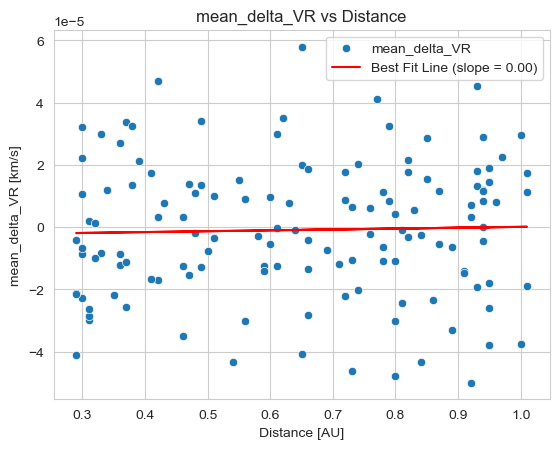

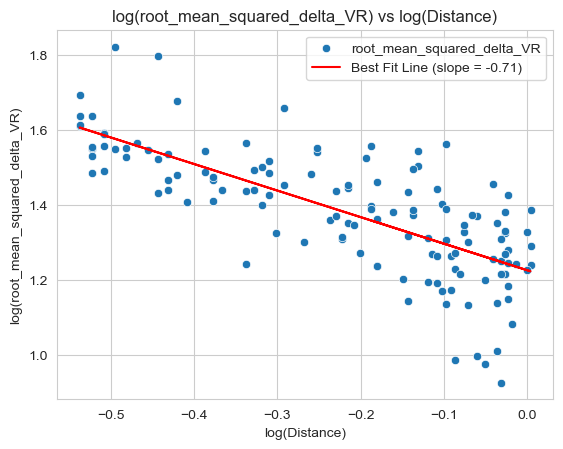

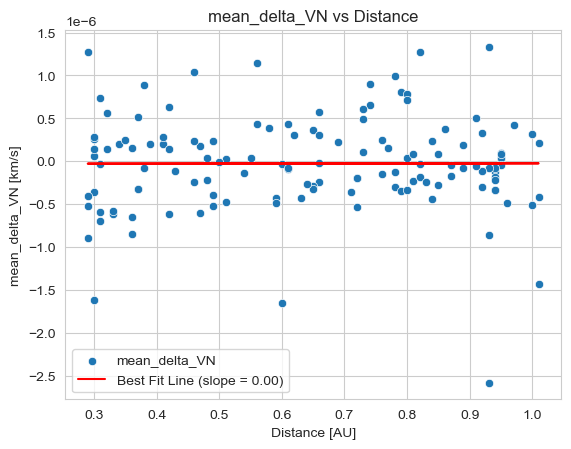

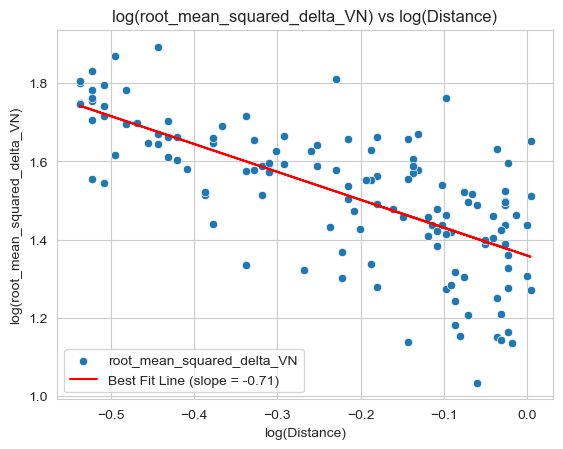

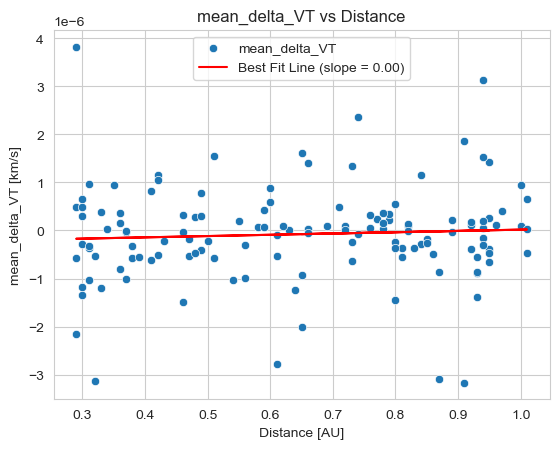

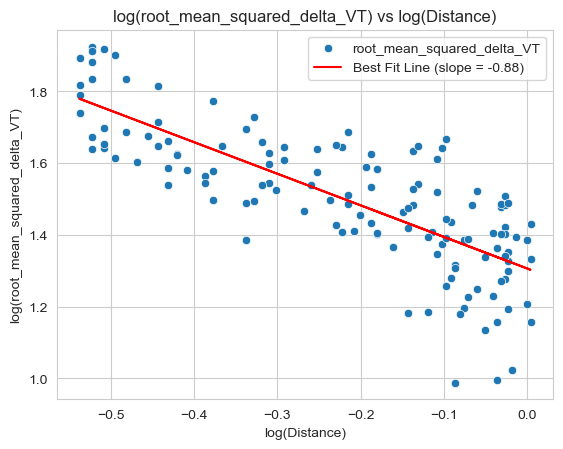

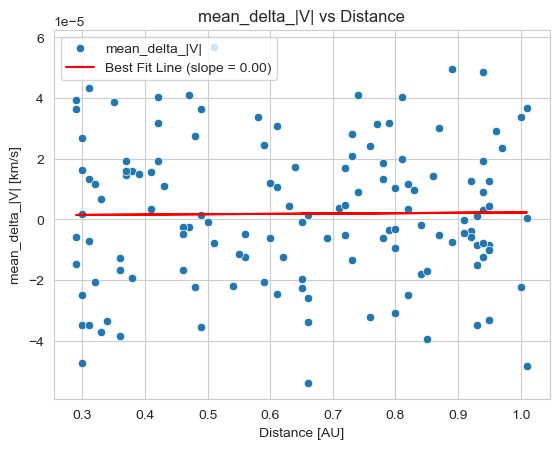

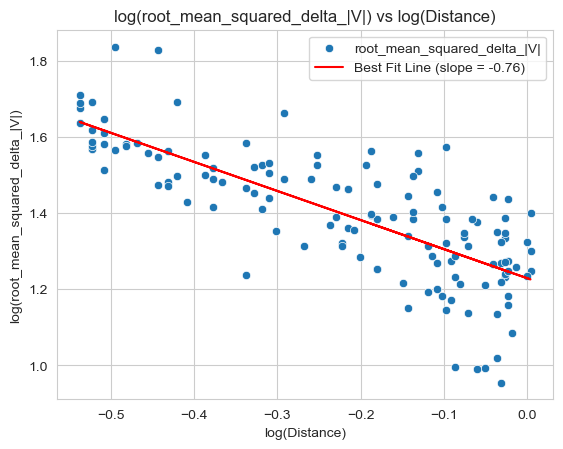

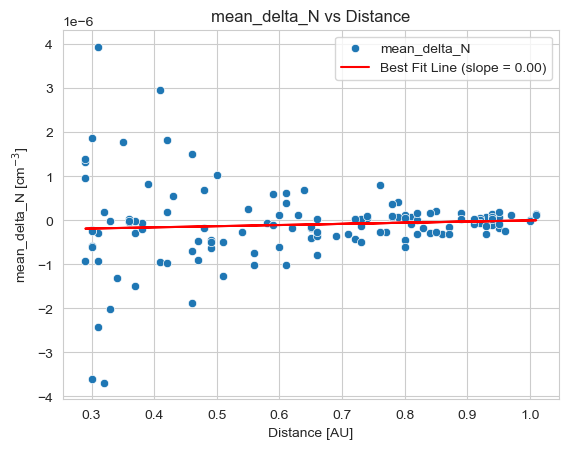

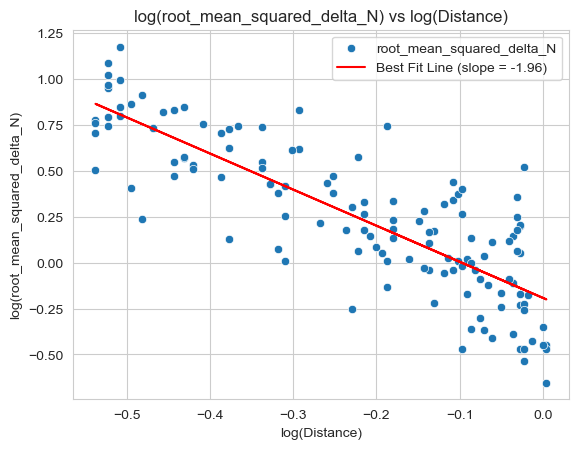

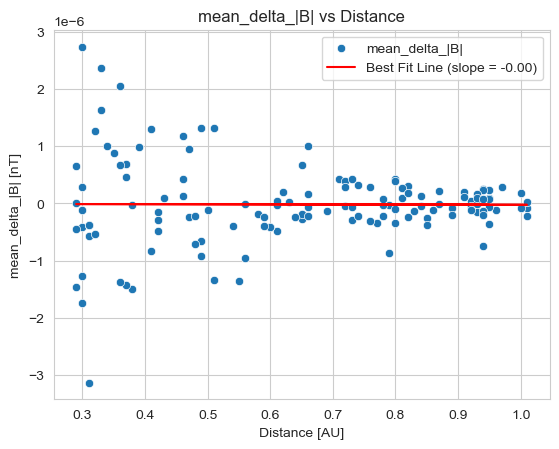

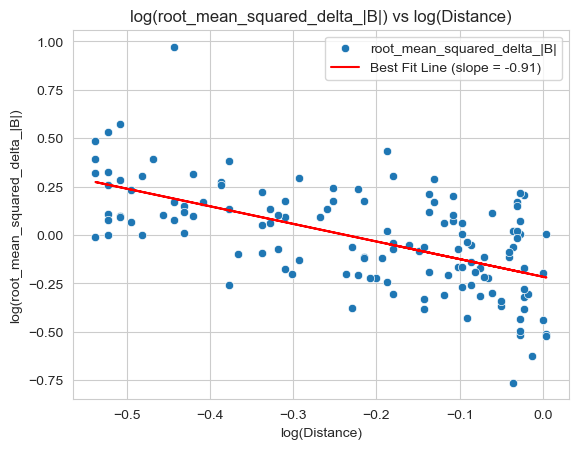

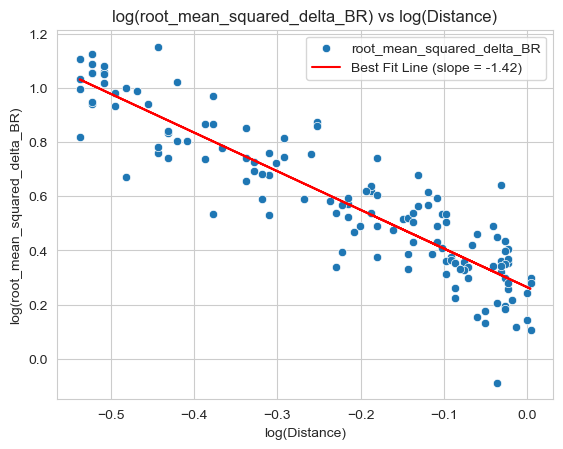

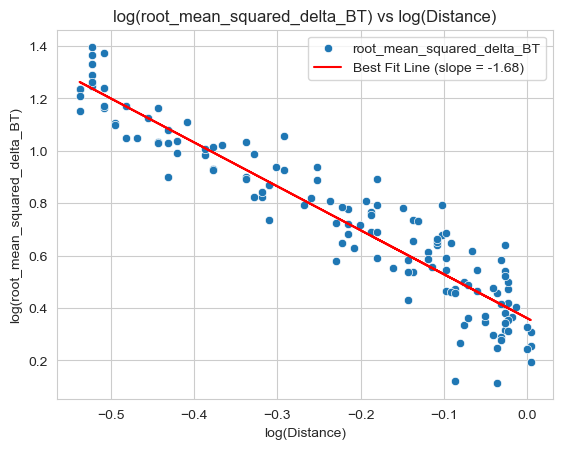

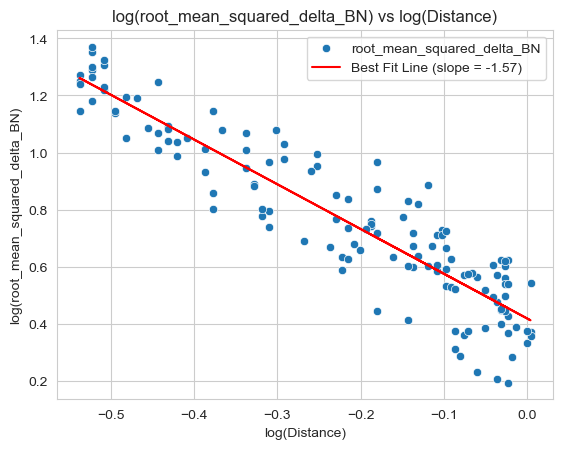

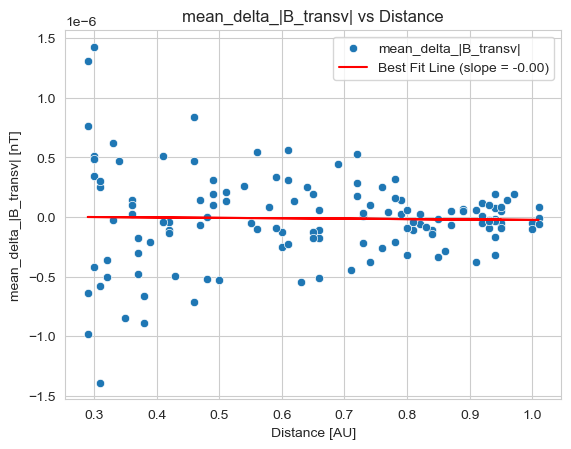

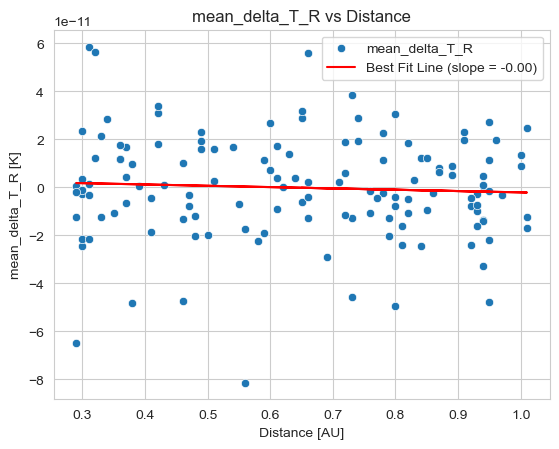

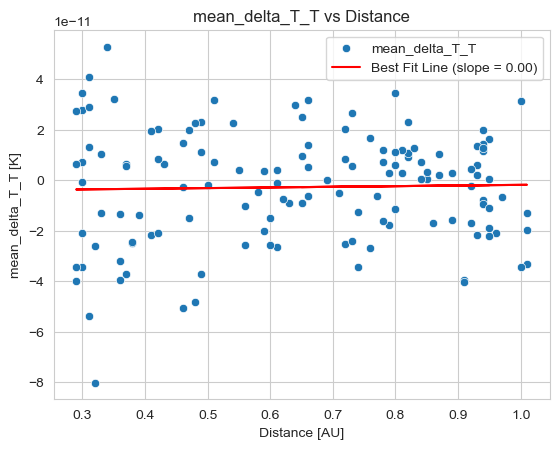

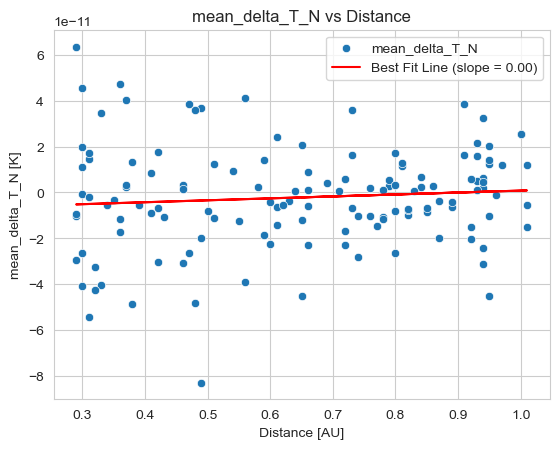

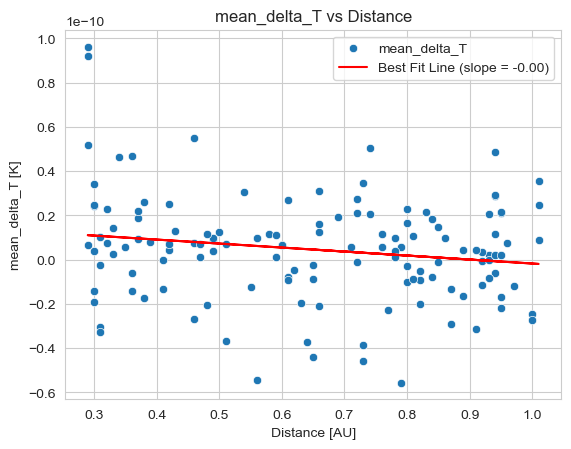

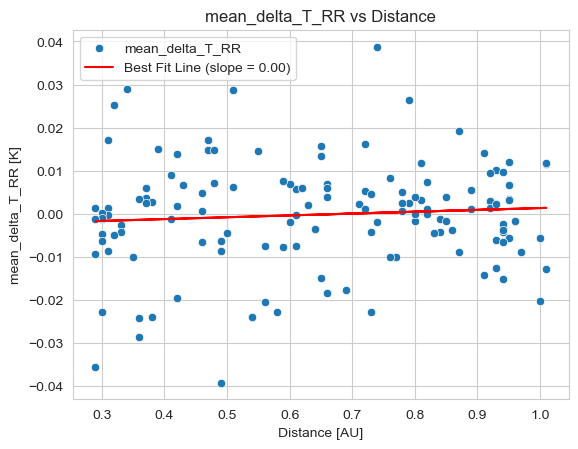

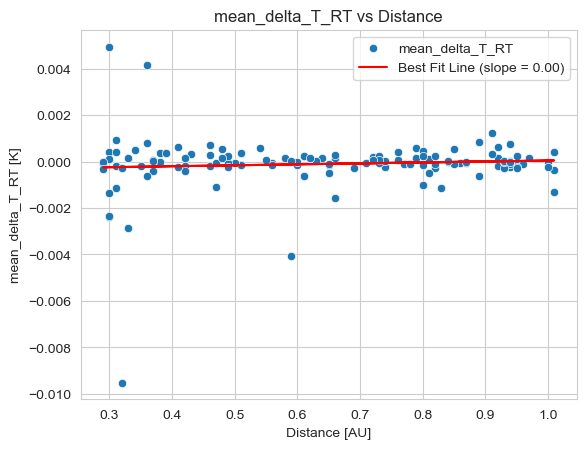

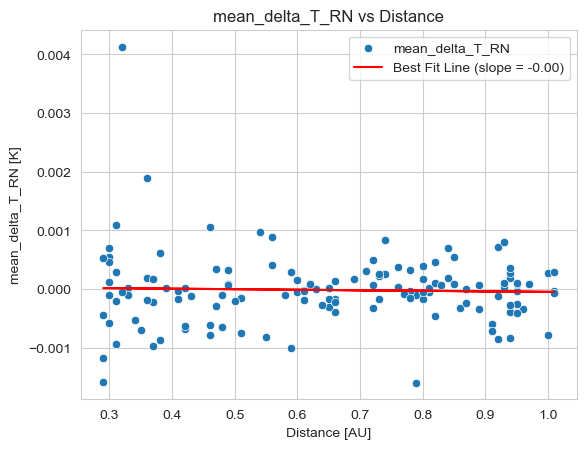

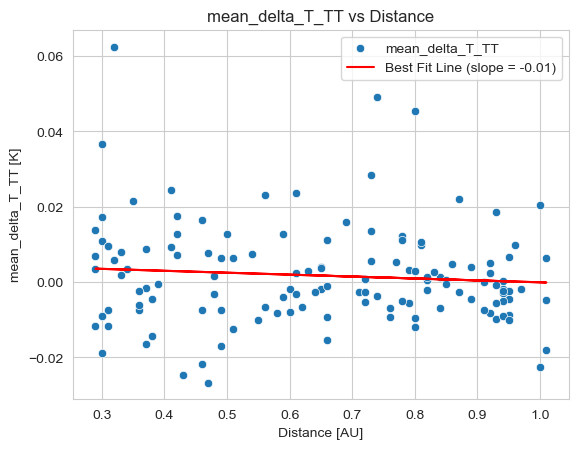

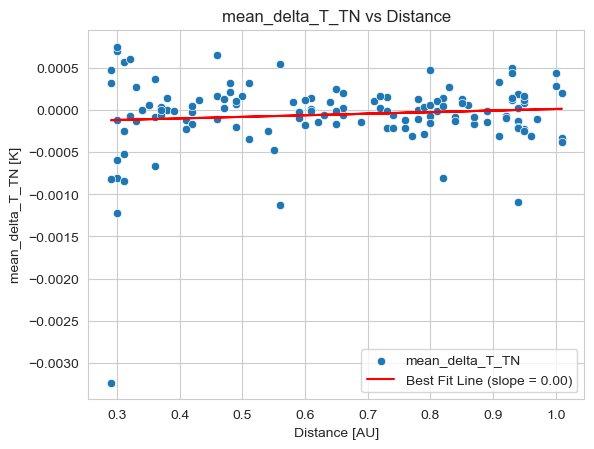

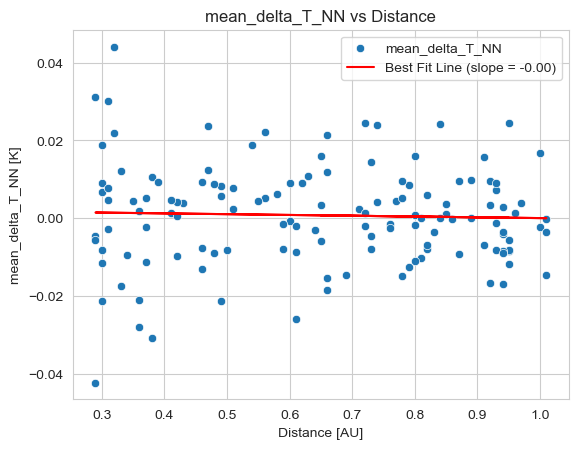

In [218]:
# # Split all_delta_means into two groups based on the sign of BR_mean
# positive_all_delta_means = all_delta_means[mean_values_df['BR_mean'] > 0]
# negative_all_delta_means = all_delta_means[mean_values_df['BR_mean'] < 0]


# Define units for each parameter
UNITS_deltas = {
    # Velocities
    'mean_delta_VR': 'km/s', 'mean_delta_VN': 'km/s', 'mean_delta_VT': 'km/s', 'mean_delta_|V|': 'km/s','root_mean_squared_delta_VR': 'km/s', 'root_mean_squared_delta_VN': 'km/s', 'root_mean_squared_delta_VT': 'km/s', 'root_mean_squared_delta_|V|': 'km/s',

    # Density
    'mean_delta_N': r'cm$^{-3}$' , 'root_mean_squared_delta_N': r'cm$^{-3}$',

    # Distance
    'Distance': 'AU',

    # Temperatures (scalar + tensor)
    'mean_delta_T_R': 'K',
    'mean_delta_T_T': 'K',
    'mean_delta_T_N': 'K',
    'mean_delta_T': 'K',
    'mean_delta_T_RR': 'K',
    'mean_delta_T_RT': 'K',
    'mean_delta_T_RN': 'K',
    'mean_delta_T_TT': 'K',
    'mean_delta_T_TN': 'K',
    'mean_delta_T_NN': 'K',


    # Magnetic field
    'mean_delta_|B|':'nT',
    'root_mean_squared_delta_|B|':'nT',
    'root_mean_squared_delta_BR':'nT',
    'root_mean_squared_delta_BT':'nT',
    'root_mean_squared_delta_BN':'nT',
    'mean_delta_|B_transv|':'nT'


}



# Function to redo the data plots for a given DataFrame
def redo_all_delta_means_plots(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy.stats import linregress
    import numpy as np

    columns = [
        'mean_delta_VR', 'root_mean_squared_delta_VR', 'mean_delta_VN', 'root_mean_squared_delta_VN',
        'mean_delta_VT', 'root_mean_squared_delta_VT', 'mean_delta_|V|', 'root_mean_squared_delta_|V|',
        'mean_delta_N', 'root_mean_squared_delta_N', 'mean_delta_|B|', 'root_mean_squared_delta_|B|',
        'root_mean_squared_delta_BR', 'root_mean_squared_delta_BT', 'root_mean_squared_delta_BN',
        'mean_delta_|B_transv|','mean_delta_T_R','mean_delta_T_T','mean_delta_T_N','mean_delta_T','mean_delta_T_RR','mean_delta_T_RT','mean_delta_T_RN','mean_delta_T_TT','mean_delta_T_TN','mean_delta_T_NN'
    ]

    cols_to_log = [
        'root_mean_squared_delta_BR', 'root_mean_squared_delta_BT', 'root_mean_squared_delta_BN',
        'root_mean_squared_delta_N', 'root_mean_squared_delta_|V|', 'root_mean_squared_delta_|B|',
        'root_mean_squared_delta_VR', 'root_mean_squared_delta_VN', 'root_mean_squared_delta_VT'
    ]

    for col in columns:
        if col in cols_to_log:
            x = np.log10(
df['Distance'])
            y = np.log10(
df[col])
        else:
            x = df['Distance']
            y = df[col]

        slope, intercept, _, _, _ = linregress(x, y)

        plt.figure()
        sns.scatterplot(x=x, y=y, label=col)
        plt.plot(x, slope * x + intercept, color='red', label=f'Best Fit Line (slope = {slope:.2f})')

        if col in cols_to_log:
            plt.title(f'log({col}) vs log(Distance)')
            plt.xlabel('log(Distance)')
            plt.ylabel(f'log({col})')
        else:
            plt.title(f'{col} vs Distance')
            plt.xlabel(f"Distance [{UNITS_deltas['Distance']}]")
            plt.ylabel(f"{col} [{UNITS_deltas.get(col, '')}]")

        plt.legend()
        plt.show()

redo_all_delta_means_plots(all_delta_means)
#
# # Redo the data plots for positive BR_mean
# redo_all_delta_means_plots(positive_all_delta_means, 'Positive BR_mean')
#
# # Redo the data plots for negative BR_mean
# redo_all_delta_means_plots(negative_all_delta_means, 'Negative BR_mean')

In [219]:
# # Mass Flux Plots
# # Loop through each date range in the daterange dictionary
# for name in SWA_df_extra['name'].unique():
#                         # Get the name of the range
#
#     # Filter the dataframes for the current date range
#     SWA_filtered = SWA_df_extra[SWA_df_extra['name'] == name]
#
#
#     # Create subplots for plotting                       1st number is the width, 2nd is the height
#     fig, ax = plt.subplots(1, 1, layout='tight', sharex=True, figsize=(8, 6))
#
#     # Plotting for Proton Velocity Moments
#     ax.set_title(f'Mass Flux: {name}')
#     ax.plot(SWA_filtered['mass_flux'], color='red', label='Mass Flux')# ,linewidth=0.2)
#     ax.tick_params(top=False, bottom=True, left=True, right=False, labelbottom=True, labeltop=False, labelleft=True, labelright=False)
#     ax.legend()
#
#
#     # Format the dates nicely
#     fig.autofmt_xdate()
#
#     # Show each figure
#     # fig.show()
#     plotly_fig = tls.mpl_to_plotly(fig)
#     legend = go.layout.Legend(
#         x=1,
#         y=0.5
#     )
#     plotly_fig.update_layout(showlegend=True,legend=legend)
#     plotly_fig.update_xaxes(matches='x')
#     iplot(plotly_fig)

In [220]:
mean_values_df

VR_mean    VN_mean    VT_mean    |V|_mean     N_mean  \
name                                                                     
Date_Range1    496.116516  -8.610609 -30.829149  498.375977  20.537035   
Date_Range10   536.230225 -18.924515 -15.096873  537.689575   8.857089   
Date_Range100  643.526001  -1.960100 -15.400931  644.386169   4.383032   
Date_Range101  506.569641   0.149152 -19.299078  507.894104   9.482888   
Date_Range102  556.190063 -19.915075 -45.952396  559.844177   6.555274   
...                   ...        ...        ...         ...        ...   
Date_Range95   492.456177  -5.913337 -36.187111  494.903259  35.407501   
Date_Range96   574.481750  -3.321916 -30.560373  580.577637   3.463761   
Date_Range97   470.783844  29.039148 -25.061211  473.194489  11.019399   
Date_Range98   600.543457 -21.184912 -13.442274  602.847168   2.741312   
Date_Range99   591.532104 -15.407187 -19.567654  594.152832   2.534470   

               Distance_mean  mass_flux_mean       T_R_mean       T_T_mean  \
name                                                                         
Date_Range1             0.65    1.603998e+08  257520.092613  247265.501825   
Date_Range10            0.66    7.779941e+07  197220.701377  230159.770422   
Date_Range100           0.95    9.541181e+07  211791.157157  247038.536489   
Date_Range101           0.95    1.629433e+08  184794.037356  210169.856613   
Date_Range102           0.93    1.188903e+08  232254.421569  254058.978065   
...                      ...             ...            ...            ...   
Date_Range95            0.46    1.388447e+08  397797.773686  353480.100780   
Date_Range96            0.59    2.621825e+07  175055.959813  334242.963195   
Date_Range97            0.93    1.697102e+08  164877.236717  207579.724738   
Date_Range98            0.94    5.474245e+07  337909.871569  397727.700225   
Date_Range99            0.95    5.090506e+07  297466.984514  366742.586203   

                    T_N_mean         T_mean     P_RR_mean     P_RT_mean  \
name                                                                      
Date_Range1    248000.564108  250928.719429  7.637191e-17 -2.634947e-18   
Date_Range10   226642.377378  218007.616344  2.485079e-17  4.462695e-19   
Date_Range100  235469.863339  231433.185690  1.282320e-17 -2.379211e-19   
Date_Range101  194056.690861  196340.194942  2.607250e-17 -1.392702e-18   
Date_Range102  217370.895149  234561.431605  2.190439e-17 -2.426981e-19   
...                      ...            ...           ...           ...   
Date_Range95   313034.189417  354770.687887  1.940282e-16 -1.163947e-17   
Date_Range96   284018.205562  264439.042878  8.489281e-18  2.867310e-18   
Date_Range97   162047.543214  178168.168231  2.640306e-17 -6.280286e-19   
Date_Range98   336542.032020  357393.201173  1.299944e-17 -5.242254e-19   
Date_Range99   332587.762405  332265.777646  1.044379e-17  5.803975e-19   

                  P_RN_mean     P_TT_mean     P_TN_mean     P_NN_mean  \
name                                                                    
Date_Range1    2.893411e-19  7.263337e-17  1.410537e-18  7.194673e-17   
Date_Range10   1.297913e-18  2.865244e-17  2.599186e-19  2.828052e-17   
Date_Range100  8.392936e-20  1.495811e-17  1.980159e-19  1.427478e-17   
Date_Range101  4.122819e-19  2.958033e-17  2.004292e-19  2.758408e-17   
Date_Range102  1.640350e-19  2.370142e-17 -3.137719e-19  2.030148e-17   
...                     ...           ...           ...           ...   
Date_Range95   4.965428e-18  1.727405e-16  4.817775e-18  1.528760e-16   
Date_Range96   9.552044e-19  1.621568e-17 -8.836068e-20  1.370587e-17   
Date_Range97   1.943666e-18  3.345260e-17 -1.154298e-18  2.579206e-17   
Date_Range98   7.459585e-19  1.528256e-17 -1.081838e-18  1.292465e-17   
Date_Range99   8.590463e-19  1.280485e-17 -5.790381e-19  1.162818e-17   

               P_RR_nPa_mean  P_RT_nPa_mean  P_RN_nPa_mean  P_TT_nPa_mean  \
name                                 

In [221]:
all_mean_table=pd.merge(mean_values_df, all_delta_means, on='name')
all_mean_table

VR_mean    VN_mean    VT_mean    |V|_mean     N_mean  \
name                                                                     
Date_Range1    496.116516  -8.610609 -30.829149  498.375977  20.537035   
Date_Range10   536.230225 -18.924515 -15.096873  537.689575   8.857089   
Date_Range100  643.526001  -1.960100 -15.400931  644.386169   4.383032   
Date_Range101  506.569641   0.149152 -19.299078  507.894104   9.482888   
Date_Range102  556.190063 -19.915075 -45.952396  559.844177   6.555274   
...                   ...        ...        ...         ...        ...   
Date_Range95   492.456177  -5.913337 -36.187111  494.903259  35.407501   
Date_Range96   574.481750  -3.321916 -30.560373  580.577637   3.463761   
Date_Range97   470.783844  29.039148 -25.061211  473.194489  11.019399   
Date_Range98   600.543457 -21.184912 -13.442274  602.847168   2.741312   
Date_Range99   591.532104 -15.407187 -19.567654  594.152832   2.534470   

               Distance_mean  mass_flux_mean       T_R_mean       T_T_mean  \
name                                                                         
Date_Range1             0.65    1.603998e+08  257520.092613  247265.501825   
Date_Range10            0.66    7.779941e+07  197220.701377  230159.770422   
Date_Range100           0.95    9.541181e+07  211791.157157  247038.536489   
Date_Range101           0.95    1.629433e+08  184794.037356  210169.856613   
Date_Range102           0.93    1.188903e+08  232254.421569  254058.978065   
...                      ...             ...            ...            ...   
Date_Range95            0.46    1.388447e+08  397797.773686  353480.100780   
Date_Range96            0.59    2.621825e+07  175055.959813  334242.963195   
Date_Range97            0.93    1.697102e+08  164877.236717  207579.724738   
Date_Range98            0.94    5.474245e+07  337909.871569  397727.700225   
Date_Range99            0.95    5.090506e+07  297466.984514  366742.586203   

                    T_N_mean         T_mean     P_RR_mean     P_RT_mean  \
name                                                                      
Date_Range1    248000.564108  250928.719429  7.637191e-17 -2.634947e-18   
Date_Range10   226642.377378  218007.616344  2.485079e-17  4.462695e-19   
Date_Range100  235469.863339  231433.185690  1.282320e-17 -2.379211e-19   
Date_Range101  194056.690861  196340.194942  2.607250e-17 -1.392702e-18   
Date_Range102  217370.895149  234561.431605  2.190439e-17 -2.426981e-19   
...                      ...            ...           ...           ...   
Date_Range95   313034.189417  354770.687887  1.940282e-16 -1.163947e-17   
Date_Range96   284018.205562  264439.042878  8.489281e-18  2.867310e-18   
Date_Range97   162047.543214  178168.168231  2.640306e-17 -6.280286e-19   
Date_Range98   336542.032020  357393.201173  1.299944e-17 -5.242254e-19   
Date_Range99   332587.762405  332265.777646  1.044379e-17  5.803975e-19   

                  P_RN_mean     P_TT_mean     P_TN_mean     P_NN_mean  \
name                                                                    
Date_Range1    2.893411e-19  7.263337e-17  1.410537e-18  7.194673e-17   
Date_Range10   1.297913e-18  2.865244e-17  2.599186e-19  2.828052e-17   
Date_Range100  8.392936e-20  1.495811e-17  1.980159e-19  1.427478e-17   
Date_Range101  4.122819e-19  2.958033e-17  2.004292e-19  2.758408e-17   
Date_Range102  1.640350e-19  2.370142e-17 -3.137719e-19  2.030148e-17   
...                     ...           ...           ...           ...   
Date_Range95   4.965428e-18  1.727405e-16  4.817775e-18  1.528760e-16   
Date_Range96   9.552044e-19  1.621568e-17 -8.836068e-20  1.370587e-17   
Date_Range97   1.943666e-18  3.345260e-17 -1.154298e-18  2.579206e-17   
Date_Range98   7.459585e-19  1.528256e-17 -1.081838e-18  1.292465e-17   
Date_Range99   8.590463e-19  1.280485e-17 -5.790381e-19  1.162818e-17   

               P_RR_nPa_mean  P_RT_nPa_mean  P_RN_nPa_mean  P_TT_nPa_mean  \
name                                 

In [222]:
all_mean_table['average_delta_BR_star']=(all_mean_table['mean_delta_|B_transv|']**2)/(all_mean_table['|B|_mean']*2)
all_mean_table['average_delta_BR_star_TRIAL']=(((all_mean_table['root_mean_squared_delta_BN']**2)+(all_mean_table['root_mean_squared_delta_BT']**2))/(all_mean_table['|mean_B_vector|']*2))*1.4

In [223]:
display(all_mean_table[['average_delta_BR_star','average_delta_BR_star_TRIAL','root_mean_squared_delta_BR']])

all_mean_table[['mean_delta_|B_transv|', 'root_mean_squared_delta_BN']]


average_delta_BR_star  average_delta_BR_star_TRIAL  \
name                                                                
Date_Range1             1.593565e-15                     6.230168   
Date_Range10            1.585149e-15                     1.949485   
Date_Range100           7.421088e-16                     2.607714   
Date_Range101           1.413409e-16                     3.009387   
Date_Range102           5.722346e-16                     5.432567   
...                              ...                          ...   
Date_Range95            1.111160e-14                     5.169353   
Date_Range96            2.677552e-16                     2.169687   
Date_Range97            5.772154e-17                     1.292977   
Date_Range98            3.595463e-15                     3.322816   
Date_Range99            5.408407e-16                     1.760351   

               root_mean_squared_delta_BR  
name                                       
Date_Range1                      4.173930  
Date_Range10                     2.381903  
Date_Range100                    1.815844  
Date_Range101                    2.250424  
Date_Range102                    2.291207  
...                                   ...  
Date_Range95                     4.539263  
Date_Range96                     2.177630  
Date_Range97                     4.375026  
Date_Range98                     1.981681  
Date_Range99                     1.906569  

[134 rows x 3 columns]

mean_delta_|B_transv|  root_mean_squared_delta_BN
name                                                            
Date_Range1             1.897726e-07                    5.529300
Date_Range10           -1.762853e-07                    2.784224
Date_Range100          -8.742015e-08                    2.338406
Date_Range101           4.804496e-08                    4.187141
Date_Range102          -9.103255e-08                    4.195351
...                              ...                         ...
Date_Range95           -7.087851e-07                    8.837554
Date_Range96           -9.602971e-08                    5.841851
Date_Range97           -3.079573e-08                    2.817686
Date_Range98            1.951500e-07                    3.140849
Date_Range99           -9.205606e-08                    3.471491

[134 rows x 2 columns]

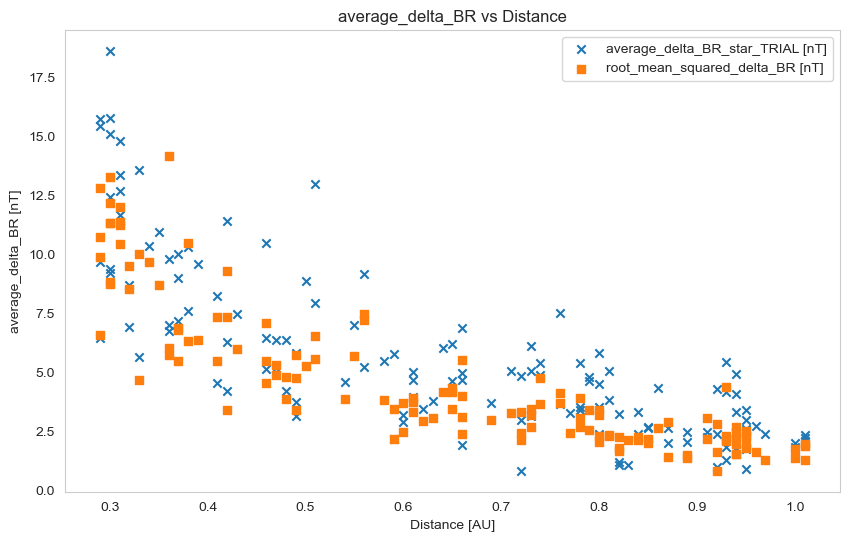

In [224]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
#plt.scatter(all_mean_table['Distance'], all_mean_table['average_delta_BR_star'], label='average_delta_BR_star', marker='o')
plt.scatter(all_mean_table['Distance'], all_mean_table['average_delta_BR_star_TRIAL'], label='average_delta_BR_star_TRIAL [nT]', marker='x')
plt.scatter(all_mean_table['Distance'], all_mean_table['root_mean_squared_delta_BR'], label='root_mean_squared_delta_BR [nT]', marker='s')

plt.xlabel('Distance [AU]')
plt.ylabel('average_delta_BR [nT]')
plt.title('average_delta_BR vs Distance')
plt.legend()
plt.grid()
plt.show()


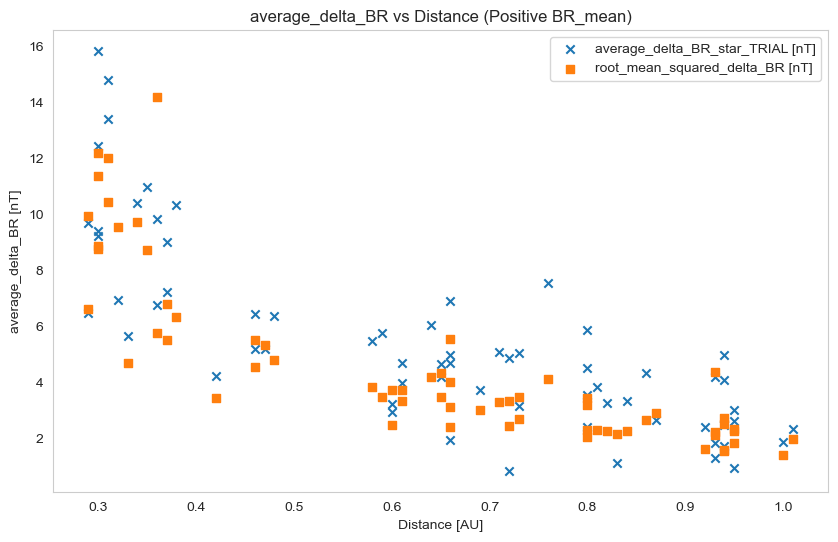

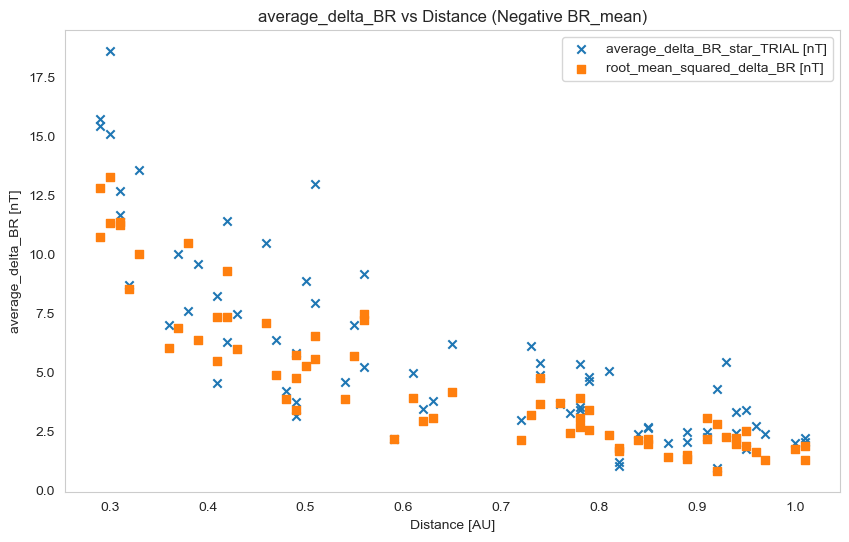

In [225]:
# Split all_mean_table into two groups based on the sign of BR_mean
positive_all_mean_table = all_mean_table[all_mean_table['BR_mean'] > 0]
negative_all_mean_table = all_mean_table[all_mean_table['BR_mean'] < 0]

# Function to redo the 'average_delta_BR vs Distance' plots for a given DataFrame
def redo_average_delta_BR_plots(df, group_name):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.scatter(df['Distance'], df['average_delta_BR_star_TRIAL'], label='average_delta_BR_star_TRIAL [nT]', marker='x')
    plt.scatter(df['Distance'], df['root_mean_squared_delta_BR'], label='root_mean_squared_delta_BR [nT]', marker='s')

    plt.xlabel('Distance [AU]')
    plt.ylabel('average_delta_BR [nT]')
    plt.title(f'average_delta_BR vs Distance ({group_name})')
    plt.legend()
    plt.grid()
    plt.show()

# Redo the 'average_delta_BR vs Distance' plots for positive BR_mean
redo_average_delta_BR_plots(positive_all_mean_table, 'Positive BR_mean')

# Redo the 'average_delta_BR vs Distance' plots for negative BR_mean
redo_average_delta_BR_plots(negative_all_mean_table, 'Negative BR_mean')

In [226]:
MAG_df_extra_wmean

EPOCH         BR         BT        BN  \
0      2021-08-21 00:08:29.999999776 -13.179045  14.118096  0.086142   
1      2021-08-21 00:09:29.999996200 -13.549139  13.454594  1.530531   
2      2021-08-21 00:10:30.000002682 -14.307286  13.455720  2.443442   
3      2021-08-21 00:11:29.999999105 -12.954463  10.547703  9.633520   
4      2021-08-21 00:12:29.999995529 -14.416012   9.818862  8.968830   
...                              ...        ...        ...       ...   
111912 2025-05-14 23:55:29.999995976  -7.750103   5.254740  6.910071   
111913 2025-05-14 23:56:30.000002458  -8.614252   5.152640  6.119097   
111914 2025-05-14 23:57:29.999998882  -9.546777   3.361250  6.075851   
111915 2025-05-14 23:58:29.999995306  -8.314919   3.223910  7.852269   
111916 2025-05-14 23:59:30.000001788  -8.794729   4.411563  6.581347   

              |B|  Distance           name  |B_transv|   |B|_mean   BR_mean  \
0       19.313604      0.65    Date_Range1   14.118360  11.299715 -6.752596   
1       19.155882      0.65    Date_Range1   13.541368  11.299715 -6.752596   
2       19.792049      0.65    Date_Range1   13.675775  11.299715 -6.752596   
3       19.284109      0.65    Date_Range1   14.284913  11.299715 -6.752596   
4       19.613041      0.65    Date_Range1   13.298494  11.299715 -6.752596   
...           ...       ...            ...         ...        ...       ...   
111912  11.637245      0.74  Date_Range134    8.681093  13.482927 -7.522831   
111913  11.755781      0.74  Date_Range134    7.999566  13.482927 -7.522831   
111914  11.804869      0.74  Date_Range134    6.943628  13.482927 -7.522831   
111915  11.882322      0.74  Date_Range134    8.488329  13.482927 -7.522831   
111916  11.837368      0.74  Date_Range134    7.923132  13.482927 -7.522831   

         BT_mean   BN_mean  |B_transv|_mean  delta_|B|  delta_BR   delta_BT  \
0       2.362416  1.315146         7.982371   8.013889 -6.426449  11.755680   
1       2.362416  1.315146         7.982371   7.856167 -6.796543  11.092178   
2       2.362416  1.315146         7.982371   8.492334 -7.554690  11.093304   
3       2.362416  1.315146         7.982371   7.984394 -6.201867   8.185287   
4       2.362416  1.315146         7.982371   8.313326 -7.663416   7.456446   
...          ...       ...              ...        ...       ...        ...   
111912  5.636755 -0.227423         9.756806  -1.845682 -0.227272  -0.382015   
111913  5.636755 -0.227423         9.756806  -1.727146 -1.091421  -0.484114   
111914  5.636755 -0.227423         9.756806  -1.678059 -2.023945  -2.275504   
111915  5.636755 -0.227423         9.756806  -1.600605 -0.792087  -2.412845   
111916  5.636755 -0.227423         9.756806  -1.645559 -1.271898  -1.225191   

        delta_BN  delta_|B_transv|  squared_delta_BR  squared_delta_BT  \
0      -1.229004          6.135989         41.299244        138.196014   
1       0.215385          5.558997         46.192997        123.036423   
2       1.128296          5.693404         57.073345        123.061386   
3       8.318374          6.302542         38.463154         66.998932   
4       7.653684          5.316123         58.727943         55.598591   
...          ...               ...               ...               ...   
111912  7.137494         -1.075713          0.051653          0.145935   
111913  6.346520         -1.757241          1.191199          0.234367   
111914  6.303274         -2.813179          4.096354          5.177919   
111915  8.079692         -1.268477          0.627402          5.821820   
111916  6.808770         -1.833674          1.617724          1.501093   

        squared_delta_BN  squared_delta_|B|  
0               1.510451          64.222420  
1               0.046391          61.719357  
2               1.273052          72.119743  
3              69.195343          63.750549  
4              58.578880          69.111389  
...                  ...                ...  
111912         50.943813           3.406543  
111913     

In [227]:
MAG_df_extra_wmean['delta_BR_star']=(MAG_df_extra_wmean['delta_|B_transv|']**2)/(MAG_df_extra_wmean['|B|']*2)
MAG_df_extra_wmean['delta_BR_star_TRIAL']=((MAG_df_extra_wmean['delta_BN']**2)+(MAG_df_extra_wmean['delta_BT']**2))/(MAG_df_extra_wmean['|B|']*2)

In [228]:
MAG_df_extra_wmean[['delta_BR_star','delta_BR_star_TRIAL','delta_BR']]

delta_BR_star  delta_BR_star_TRIAL  delta_BR
0            0.974711             3.616789 -6.426449
1            0.806605             3.212664 -6.796543
2            0.818886             3.141020 -7.554690
3            1.029916             3.531257 -6.201867
4            0.720469             2.910754 -7.663416
...               ...                  ...       ...
111912       0.049718             2.195096 -0.227272
111913       0.131335             1.723096 -1.091421
111914       0.335200             1.902146 -2.023945
111915       0.067707             2.991976 -0.792087
111916       0.142023             2.021583 -1.271898

[111917 rows x 3 columns]

In [229]:
# # Plot delta_BR_star, delta_BR_star_TRIAL, and delta_BR vs EPOCH for each 'name' group interactively
# 
# import matplotlib.pyplot as plt
# import pandas as pd
# 
# # Ensure the 'name' column exists in the DataFrame and 'EPOCH' is in a proper datetime format
# for name, group in MAG_df_extra_wmean.groupby('name'):
#     fig, ax = plt.subplots(1, 1, layout='tight', sharex=True, figsize=(8, 6))
#     ax.plot(group['EPOCH'], group['delta_BR_star'], label='delta_BR_star',linestyle='-',linewidth=1)
#     ax.plot(group['EPOCH'], group['delta_BR_star_TRIAL'], label='delta_BR_star_TRIAL', linestyle='-',linewidth=1)
#     ax.plot(group['EPOCH'], (group['delta_BR']), label='delta_BR', linestyle='-',linewidth=1)
# 
# 
#     ax.set_title(f'delta_BR vs EPOCH for {name}')
#     ax.legend()
#     fig.autofmt_xdate()
# 
#     # Show each figure
#     # fig.show()
#     plotly_fig = tls.mpl_to_plotly(fig)
#     legend = go.layout.Legend(
#         x=1,
#         y=0.5
#     )
#     plotly_fig.update_layout(showlegend=True,legend=legend)
#     plotly_fig.update_xaxes(matches='x')
#     iplot(plotly_fig)

In [230]:
print(len(SWA_df_extra), len(MAG_df_extra))

SWA_df_extra

3167027 111917


VR         VT         VN          N  \
Epoch                                                                     
2021-08-21 00:08:01.118751  437.473389 -26.718201   6.084368  26.741230   
2021-08-21 00:08:05.118758  439.720306 -22.816080   3.323184  26.076748   
2021-08-21 00:08:09.118765  432.573883 -27.319345   2.573995  25.579350   
2021-08-21 00:08:13.118772  436.548035 -27.892700   1.240144  25.094852   
2021-08-21 00:08:17.118779  437.345337 -25.834433   1.337073  26.132803   
...                                ...        ...        ...        ...   
2025-05-14 23:59:54.729239  637.353821 -11.448981  37.776844  10.946076   
2025-05-14 23:59:55.729241  631.091003 -19.316486  34.539440  10.697098   
2025-05-14 23:59:56.729241  630.593201 -17.627209  35.446499  10.188207   
2025-05-14 23:59:57.729243  633.294373 -14.713834  35.602718  10.800016   
2025-05-14 23:59:58.729245  627.194397 -24.238518  30.672318  10.790687   

                                      T_R            T_T            T_N  \
Epoch                                                                     
2021-08-21 00:08:01.118751  371061.218305  387029.028698  281682.671218   
2021-08-21 00:08:05.118758  334987.251559  390647.915060  283368.031971   
2021-08-21 00:08:09.118765  392441.953073  395567.874071  276858.795299   
2021-08-21 00:08:13.118772  378040.467526  398981.668072  279699.278019   
2021-08-21 00:08:17.118779  378733.257392  407162.033424  291730.404066   
...                                   ...            ...            ...   
2025-05-14 23:59:54.729239  259095.198317  282348.081497  298255.842724   
2025-05-14 23:59:55.729241  268227.297582  298212.106214  304669.527515   
2025-05-14 23:59:56.729241  241404.134000  271952.692085  299667.628949   
2025-05-14 23:59:57.729243  252061.787537  285210.786613  299128.802223   
2025-05-14 23:59:58.729245  233231.626169  298182.623910  298646.106971   

                                        T          P_RR          P_TT  \
Epoch                                                                   
2021-08-21 00:08:01.118751  346590.950606  1.369987e-16  1.428941e-16   
2021-08-21 00:08:05.118758  336334.406908  1.206066e-16  1.406463e-16   
2021-08-21 00:08:09.118765  354956.200103  1.385972e-16  1.397011e-16   
2021-08-21 00:08:13.118772  352240.463828  1.309822e-16  1.382379e-16   
2021-08-21 00:08:17.118779  359208.579717  1.366498e-16  1.469071e-16   
...                                   ...           ...           ...   
2025-05-14 23:59:54.729239  279899.700135  3.915681e-17  4.267099e-17   
2025-05-14 23:59:55.729241  290369.658526  3.961488e-17  4.404338e-17   
2025-05-14 23:59:56.729241  271008.173812  3.395720e-17  3.825433e-17   
2025-05-14 23:59:57.729243  278800.444035  3.758555e-17  4.252848e-17   
2025-05-14 23:59:58.729245  276686.770927  3.474769e-17  4.442433e-17   

                                    P_NN          P_RT          P_RN  \
Epoch                                                                  
2021-08-21 00:08:01.118751  1.039994e-16 -3.057749e-17  6.547376e-18   
2021-08-21 00:08:05.118758  1.020220e-16 -2.247051e-17  3.485177e-18   
2021-08-21 00:08:09.118765  9.777712e-17 -3.160848e-17  7.177762e-18   
2021-08-21 00:08:13.118772  9.690929e-17 -3.178418e-17  8.530045e-18   
2021-08-21 00:08:17.118779  1.052585e-16 -3.267473e-17  1.265891e-17   
...                                  ...           ...           ...   
2025-05-14 23:59:54.729239  4.507512e-17  2.956777e-18  5.448101e-18   
2025-05-14 23:59:55.729241  4.499709e-17  1.140193e-18  3.440813e-18   
2025-05-14 23:59:56.729241  4.215286e-17  1.173169e-18  1.591415e-18   
2025-05-14 23:59:57.729243  4.460383e-17  3.266872e-18  4.052821e-18   
2025-05-14 23:59:58.729245  4.449338e-17  3.332663e-18  4.597292e-18   

                                    P_TN           T_RR          T_RT  \
Epoch                                                                   
2021-08-21 00:08:01.118751  3.094860e-18  371241.00

In [231]:
import numpy as np

mean_values_df_with_calcs = mean_values_df.copy()
#T is average T # possible issue here, T is interpolated but so are its sub components, should we do that or re calculate T based off the new interpolated sub components?

print(mean_values_df_with_calcs.columns)
#mean_values_df_with_calcs['|B|'] = np.linalg.norm(mean_values_df_with_calcs[['BR',"BT",'BN']], axis=1)
mean_values_df_with_calcs


Index(['VR_mean', 'VN_mean', 'VT_mean', '|V|_mean', 'N_mean', 'Distance_mean',
       'mass_flux_mean', 'T_R_mean', 'T_T_mean', 'T_N_mean', 'T_mean',
       'P_RR_mean', 'P_RT_mean', 'P_RN_mean', 'P_TT_mean', 'P_TN_mean',
       'P_NN_mean', 'P_RR_nPa_mean', 'P_RT_nPa_mean', 'P_RN_nPa_mean',
       'P_TT_nPa_mean', 'P_TN_nPa_mean', 'P_NN_nPa_mean', 'T_RR_mean',
       'T_RT_mean', 'T_RN_mean', 'T_TT_mean', 'T_TN_mean', 'T_NN_mean',
       'BR_mean', 'BT_mean', 'BN_mean', '|B|_mean', '|B_transv|_mean',
       'abs_BR_mean', 'abs_BT_mean', 'abs_BN_mean', 'theta', 'phi',
       '|mean_B_vector|'],
      dtype='object')


VR_mean    VN_mean    VT_mean    |V|_mean     N_mean  \
name                                                                     
Date_Range1    496.116516  -8.610609 -30.829149  498.375977  20.537035   
Date_Range10   536.230225 -18.924515 -15.096873  537.689575   8.857089   
Date_Range100  643.526001  -1.960100 -15.400931  644.386169   4.383032   
Date_Range101  506.569641   0.149152 -19.299078  507.894104   9.482888   
Date_Range102  556.190063 -19.915075 -45.952396  559.844177   6.555274   
...                   ...        ...        ...         ...        ...   
Date_Range95   492.456177  -5.913337 -36.187111  494.903259  35.407501   
Date_Range96   574.481750  -3.321916 -30.560373  580.577637   3.463761   
Date_Range97   470.783844  29.039148 -25.061211  473.194489  11.019399   
Date_Range98   600.543457 -21.184912 -13.442274  602.847168   2.741312   
Date_Range99   591.532104 -15.407187 -19.567654  594.152832   2.534470   

               Distance_mean  mass_flux_mean       T_R_mean       T_T_mean  \
name                                                                         
Date_Range1             0.65    1.603998e+08  257520.092613  247265.501825   
Date_Range10            0.66    7.779941e+07  197220.701377  230159.770422   
Date_Range100           0.95    9.541181e+07  211791.157157  247038.536489   
Date_Range101           0.95    1.629433e+08  184794.037356  210169.856613   
Date_Range102           0.93    1.188903e+08  232254.421569  254058.978065   
...                      ...             ...            ...            ...   
Date_Range95            0.46    1.388447e+08  397797.773686  353480.100780   
Date_Range96            0.59    2.621825e+07  175055.959813  334242.963195   
Date_Range97            0.93    1.697102e+08  164877.236717  207579.724738   
Date_Range98            0.94    5.474245e+07  337909.871569  397727.700225   
Date_Range99            0.95    5.090506e+07  297466.984514  366742.586203   

                    T_N_mean         T_mean     P_RR_mean     P_RT_mean  \
name                                                                      
Date_Range1    248000.564108  250928.719429  7.637191e-17 -2.634947e-18   
Date_Range10   226642.377378  218007.616344  2.485079e-17  4.462695e-19   
Date_Range100  235469.863339  231433.185690  1.282320e-17 -2.379211e-19   
Date_Range101  194056.690861  196340.194942  2.607250e-17 -1.392702e-18   
Date_Range102  217370.895149  234561.431605  2.190439e-17 -2.426981e-19   
...                      ...            ...           ...           ...   
Date_Range95   313034.189417  354770.687887  1.940282e-16 -1.163947e-17   
Date_Range96   284018.205562  264439.042878  8.489281e-18  2.867310e-18   
Date_Range97   162047.543214  178168.168231  2.640306e-17 -6.280286e-19   
Date_Range98   336542.032020  357393.201173  1.299944e-17 -5.242254e-19   
Date_Range99   332587.762405  332265.777646  1.044379e-17  5.803975e-19   

                  P_RN_mean     P_TT_mean     P_TN_mean     P_NN_mean  \
name                                                                    
Date_Range1    2.893411e-19  7.263337e-17  1.410537e-18  7.194673e-17   
Date_Range10   1.297913e-18  2.865244e-17  2.599186e-19  2.828052e-17   
Date_Range100  8.392936e-20  1.495811e-17  1.980159e-19  1.427478e-17   
Date_Range101  4.122819e-19  2.958033e-17  2.004292e-19  2.758408e-17   
Date_Range102  1.640350e-19  2.370142e-17 -3.137719e-19  2.030148e-17   
...                     ...           ...           ...           ...   
Date_Range95   4.965428e-18  1.727405e-16  4.817775e-18  1.528760e-16   
Date_Range96   9.552044e-19  1.621568e-17 -8.836068e-20  1.370587e-17   
Date_Range97   1.943666e-18  3.345260e-17 -1.154298e-18  2.579206e-17   
Date_Range98   7.459585e-19  1.528256e-17 -1.081838e-18  1.292465e-17   
Date_Range99   8.590463e-19  1.280485e-17 -5.790381e-19  1.162818e-17   

               P_RR_nPa_mean  P_RT_nPa_mean  P_RN_nPa_mean  P_TT_nPa_mean  \
name                                 

##

In [232]:
# @TODO check maths for T parallel and T perp
# TORA TO SWA_df_with_interpolated_MAG EXI KAI TA MAGNETIC FIELDS, SO MPORIS NA KANIS RUN TO CALCULATLATION
#T_||=T_R*B_R^2/|B|^2 + T_T*B_T^2/|B|^2 + T_N*B_N^2/|B|^2
mean_values_df_with_calcs['T_PARALLEL'] = ((mean_values_df_with_calcs['T_R_mean']* (mean_values_df_with_calcs['BR_mean'])**2) +  (mean_values_df_with_calcs['T_T_mean']* (mean_values_df_with_calcs['BT_mean'])**2) + (mean_values_df_with_calcs['T_N_mean']* (mean_values_df_with_calcs['BN_mean'])**2))/(mean_values_df_with_calcs['|B|_mean'])**2

mean_values_df_with_calcs['T_PARALLEL_fromPT'] =((mean_values_df_with_calcs['T_RR_mean'] * (mean_values_df_with_calcs['BR_mean']**2)) +
        (mean_values_df_with_calcs['T_TT_mean'] * (mean_values_df_with_calcs['BT_mean']**2)) +
        (mean_values_df_with_calcs['T_NN_mean'] * (mean_values_df_with_calcs['BN_mean']**2)) +
        (2 * mean_values_df_with_calcs['T_RT_mean'] * mean_values_df_with_calcs['BR_mean'] * mean_values_df_with_calcs['BT_mean']) +
        (2 * mean_values_df_with_calcs['T_RN_mean'] * mean_values_df_with_calcs['BR_mean'] * mean_values_df_with_calcs['BN_mean']) +
        (2 * mean_values_df_with_calcs['T_TN_mean'] * mean_values_df_with_calcs['BT_mean'] * mean_values_df_with_calcs['BN_mean']))/(mean_values_df_with_calcs['|B|_mean'])**2


# get T_perp by subtraction T_|| from the total T (trace)
mean_values_df_with_calcs['T_PERPENDICULAR']=1/2*(3*(mean_values_df_with_calcs['T_mean'])-mean_values_df_with_calcs['T_PARALLEL'])

# is Tmean the same as before where i just have a diagonal vector?
mean_values_df_with_calcs['T_PERPENDICULAR_fromPT']=1/2*(3*(mean_values_df_with_calcs['T_mean'])-mean_values_df_with_calcs['T_PARALLEL_fromPT'])

#T_PERP=T_R*(1-B_R^2/|B|^2) + T_T*(1-B_T^2/|B|^2) + T_N*(1-B_N^2/|B|^2)
def check_T_perpendicular(row):
    T_vector = np.array([row.T_R_mean, row.T_T_mean, row.T_N_mean])
    B_vector = np.array([(row.BR_mean)**2,(row.BT_mean)**2,(row.BN_mean)**2])
    B_vector = B_vector / (row["|B|_mean"])**2
    B_vector = (1 - B_vector)/2
    return np.dot(T_vector, B_vector)

def check_T_perpendicular_PT(row):
    T_tensor = np.array([
            [row.T_RR_mean, row.T_RT_mean, row.T_RN_mean],
            [row.T_RT_mean, row.T_TT_mean, row.T_TN_mean],
            [row.T_RN_mean, row.T_TN_mean, row.T_NN_mean]
        ])
    B_vector = np.array([(row.BR_mean)**2,(row.BT_mean)**2,(row.BN_mean)**2])
    B_vector = B_vector / (row["|B|_mean"])**2
    B_vector = (1 - B_vector)/2
    return np.dot(T_tensor, B_vector)

def check_T_3(row):
    # Normalize magnetic field to get unit vector b_hat
    B_vec = np.array([row.BR_mean,row.BT_mean,row.BN_mean])
    b_hat = B_vec / row["|B|_mean"]

    # Construct diagonal temperature tensor in RTN
    T_tensor = np.diag([row.T_R_mean, row.T_T_mean, row.T_N_mean])

    # Compute T_parallel = b̂ᵀ · T_tensor · b̂
    T_parallel = b_hat @ T_tensor @ b_hat

    #Compute T_perp assuming gyrotropy (T_perp is average of other two components)
    T_trace = np.trace(T_tensor)
    T_perp = 0.5 * (T_trace - T_parallel)
    return( T_trace,T_trace/3,T_parallel,T_perp)

def check_T_3_PT(row):
       B_vec = np.array([row.BR_mean,row.BT_mean,row.BN_mean])
       b_hat = B_vec / row["|B|_mean"]
       T_tensor = np.array([
            [row.T_RR_mean, row.T_RT_mean, row.T_RN_mean],
            [row.T_RT_mean, row.T_TT_mean, row.T_TN_mean],
            [row.T_RN_mean, row.T_TN_mean, row.T_NN_mean]
        ])
        # Compute T_parallel = b̂ᵀ · T_tensor · b̂
       T_parallel = b_hat @ T_tensor @ b_hat

        #Compute T_perp assuming gyrotropy (T_perp is average of other two components)
       T_trace = np.trace(T_tensor)
       T_perp = 0.5 * (T_trace - T_parallel)
       return( T_trace,T_trace/3,T_parallel,T_perp)




mean_values_df_with_calcs['T_PERPENDICULAR_2']=mean_values_df_with_calcs.apply(check_T_perpendicular, axis=1)
mean_values_df_with_calcs[['T_trace3','T_3','T_parallel3','T_perp3']]=mean_values_df_with_calcs.apply(check_T_3, axis=1, result_type="expand")

mean_values_df_with_calcs['T_PERPENDICULAR_2_PT']=mean_values_df_with_calcs.apply(check_T_perpendicular_PT, axis=1)
mean_values_df_with_calcs[['T_trace3_PT','T_3_PT','T_parallel3_PT','T_perp3_PT']]=mean_values_df_with_calcs.apply(check_T_3_PT, axis=1, result_type="expand")


mean_values_df_with_calcs


VR_mean    VN_mean    VT_mean    |V|_mean     N_mean  \
name                                                                     
Date_Range1    496.116516  -8.610609 -30.829149  498.375977  20.537035   
Date_Range10   536.230225 -18.924515 -15.096873  537.689575   8.857089   
Date_Range100  643.526001  -1.960100 -15.400931  644.386169   4.383032   
Date_Range101  506.569641   0.149152 -19.299078  507.894104   9.482888   
Date_Range102  556.190063 -19.915075 -45.952396  559.844177   6.555274   
...                   ...        ...        ...         ...        ...   
Date_Range95   492.456177  -5.913337 -36.187111  494.903259  35.407501   
Date_Range96   574.481750  -3.321916 -30.560373  580.577637   3.463761   
Date_Range97   470.783844  29.039148 -25.061211  473.194489  11.019399   
Date_Range98   600.543457 -21.184912 -13.442274  602.847168   2.741312   
Date_Range99   591.532104 -15.407187 -19.567654  594.152832   2.534470   

               Distance_mean  mass_flux_mean       T_R_mean       T_T_mean  \
name                                                                         
Date_Range1             0.65    1.603998e+08  257520.092613  247265.501825   
Date_Range10            0.66    7.779941e+07  197220.701377  230159.770422   
Date_Range100           0.95    9.541181e+07  211791.157157  247038.536489   
Date_Range101           0.95    1.629433e+08  184794.037356  210169.856613   
Date_Range102           0.93    1.188903e+08  232254.421569  254058.978065   
...                      ...             ...            ...            ...   
Date_Range95            0.46    1.388447e+08  397797.773686  353480.100780   
Date_Range96            0.59    2.621825e+07  175055.959813  334242.963195   
Date_Range97            0.93    1.697102e+08  164877.236717  207579.724738   
Date_Range98            0.94    5.474245e+07  337909.871569  397727.700225   
Date_Range99            0.95    5.090506e+07  297466.984514  366742.586203   

                    T_N_mean         T_mean     P_RR_mean     P_RT_mean  \
name                                                                      
Date_Range1    248000.564108  250928.719429  7.637191e-17 -2.634947e-18   
Date_Range10   226642.377378  218007.616344  2.485079e-17  4.462695e-19   
Date_Range100  235469.863339  231433.185690  1.282320e-17 -2.379211e-19   
Date_Range101  194056.690861  196340.194942  2.607250e-17 -1.392702e-18   
Date_Range102  217370.895149  234561.431605  2.190439e-17 -2.426981e-19   
...                      ...            ...           ...           ...   
Date_Range95   313034.189417  354770.687887  1.940282e-16 -1.163947e-17   
Date_Range96   284018.205562  264439.042878  8.489281e-18  2.867310e-18   
Date_Range97   162047.543214  178168.168231  2.640306e-17 -6.280286e-19   
Date_Range98   336542.032020  357393.201173  1.299944e-17 -5.242254e-19   
Date_Range99   332587.762405  332265.777646  1.044379e-17  5.803975e-19   

                  P_RN_mean     P_TT_mean     P_TN_mean     P_NN_mean  \
name                                                                    
Date_Range1    2.893411e-19  7.263337e-17  1.410537e-18  7.194673e-17   
Date_Range10   1.297913e-18  2.865244e-17  2.599186e-19  2.828052e-17   
Date_Range100  8.392936e-20  1.495811e-17  1.980159e-19  1.427478e-17   
Date_Range101  4.122819e-19  2.958033e-17  2.004292e-19  2.758408e-17   
Date_Range102  1.640350e-19  2.370142e-17 -3.137719e-19  2.030148e-17   
...                     ...           ...           ...           ...   
Date_Range95   4.965428e-18  1.727405e-16  4.817775e-18  1.528760e-16   
Date_Range96   9.552044e-19  1.621568e-17 -8.836068e-20  1.370587e-17   
Date_Range97   1.943666e-18  3.345260e-17 -1.154298e-18  2.579206e-17   
Date_Range98   7.459585e-19  1.528256e-17 -1.081838e-18  1.292465e-17   
Date_Range99   8.590463e-19  1.280485e-17 -5.790381e-19  1.162818e-17   

               P_RR_nPa_mean  P_RT_nPa_mean  P_RN_nPa_mean  P_TT_nPa_mean  \
name                                 

In [233]:
mean_values_df_with_calcs['magnetic_moment']=mean_values_df_with_calcs['T_perp3']/mean_values_df_with_calcs['|B|_mean']
mean_values_df_with_calcs['second_adiabatic_invariant']=(mean_values_df_with_calcs['T_parallel3']*((mean_values_df_with_calcs['|B|_mean'])**2))/((mean_values_df_with_calcs['N_mean'])**2)
1

1

In [234]:
# mean_values_df_with_calcs_means = mean_values_df_with_calcs.groupby('name').mean()
# mean_values_df_with_calcs_means

In [235]:
# mean_values_df_with_calcs.columns

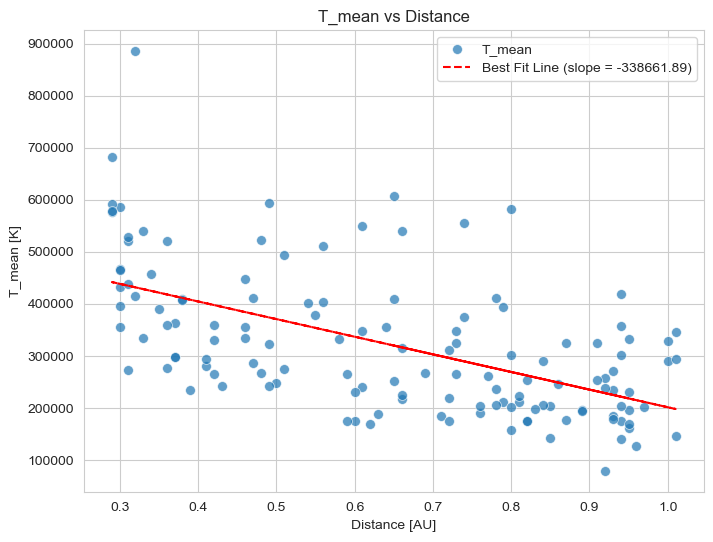

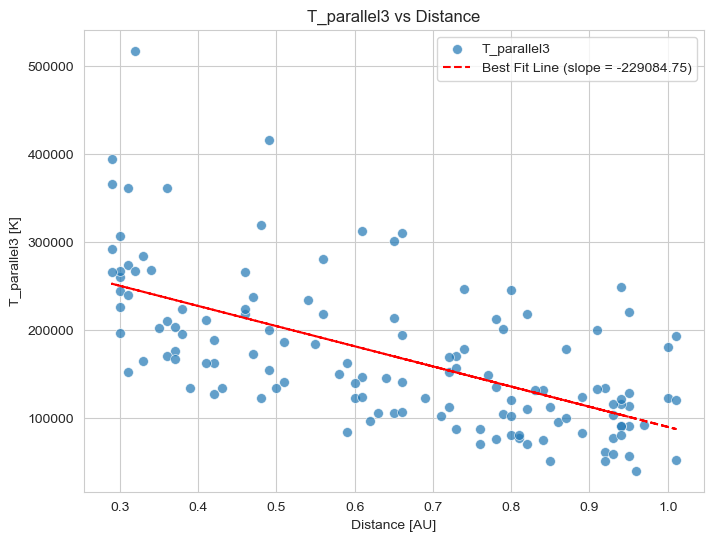

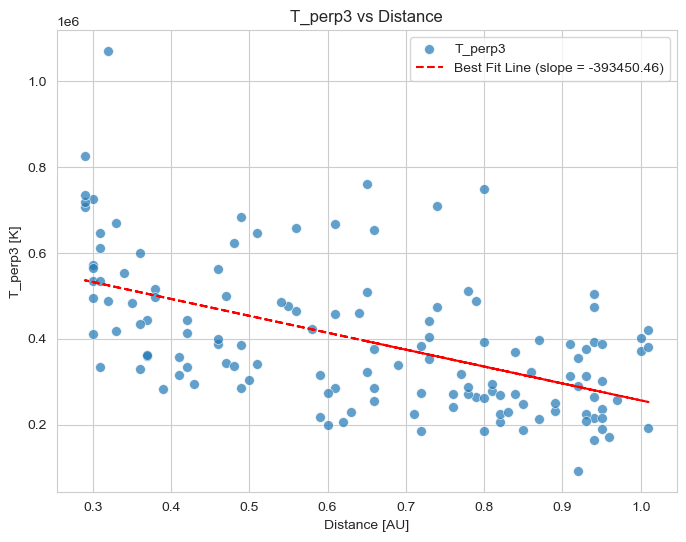

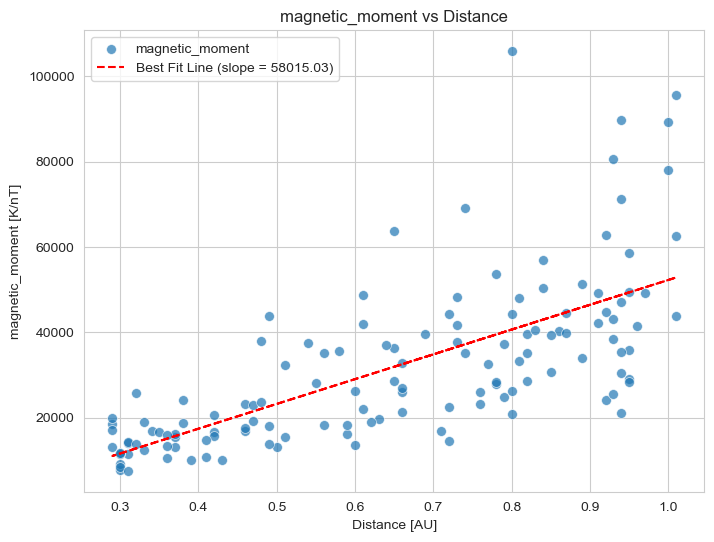

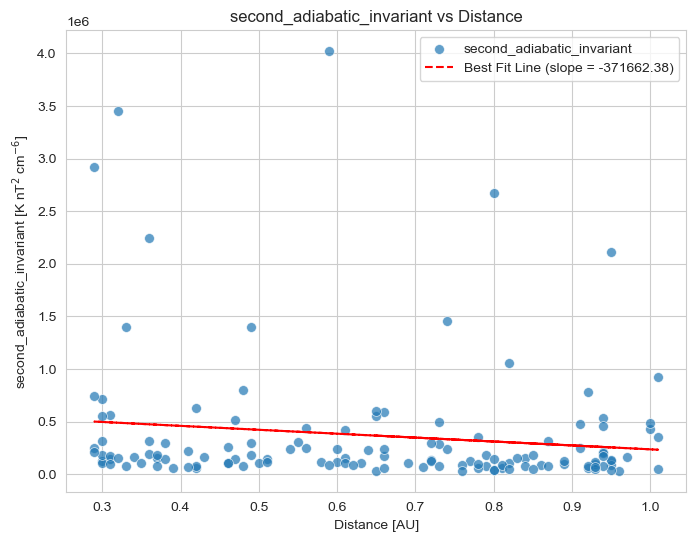

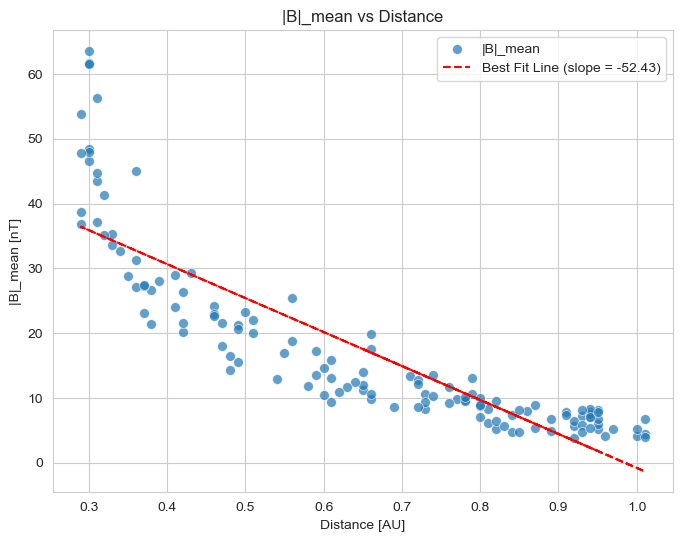

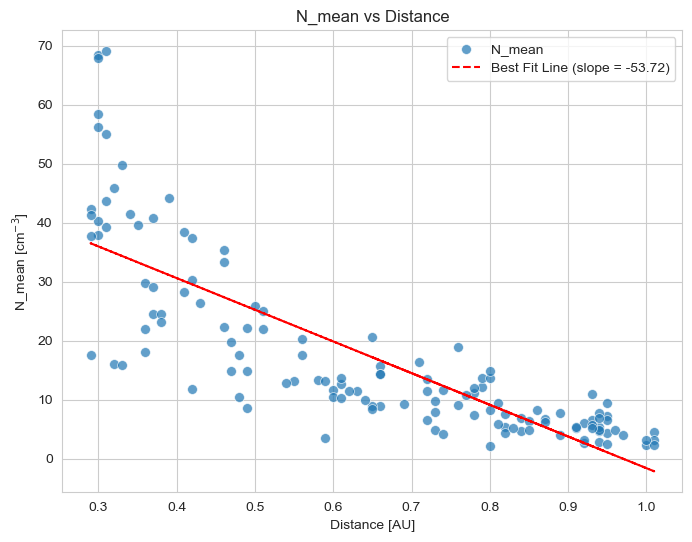

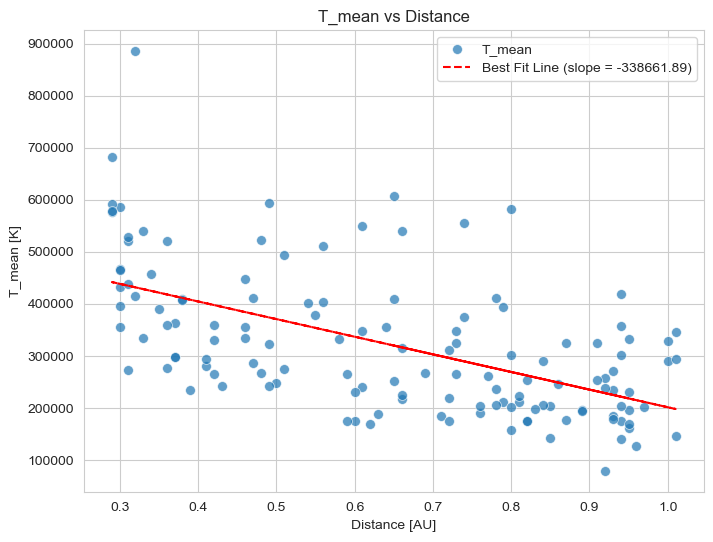

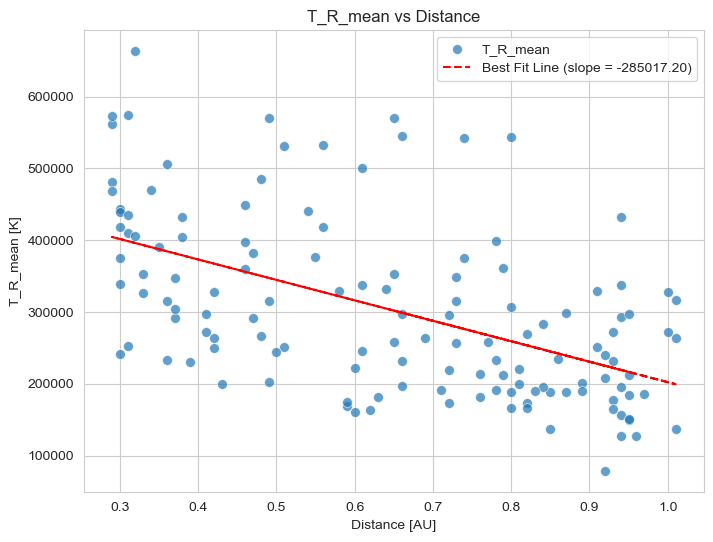

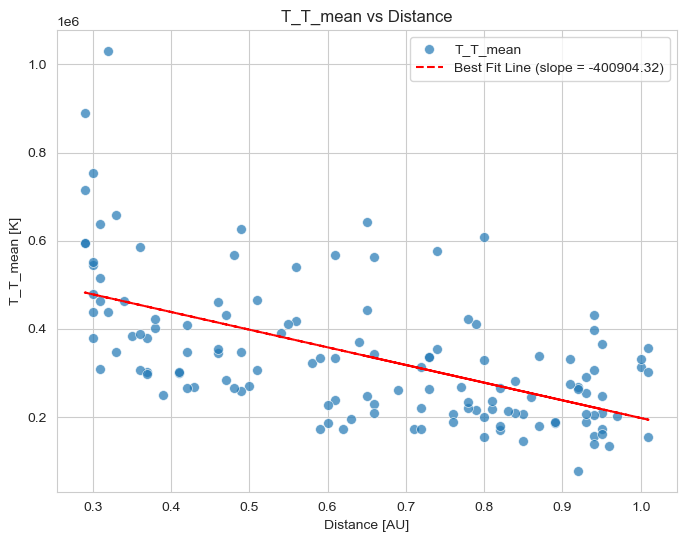

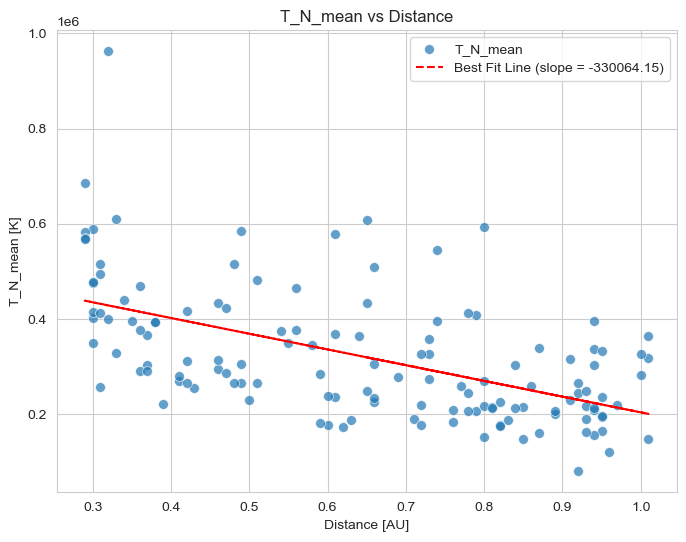

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress


# Define the quantities to plot
quantities = ['T_mean','T_parallel3', 'T_perp3','magnetic_moment','second_adiabatic_invariant', '|B|_mean', "N_mean",'T_mean','T_R_mean','T_T_mean','T_N_mean']  # Add more if needed

# ---- Units for these quantities ----
UNITS_CALC = {
    'Distance_mean': 'AU',

    # Temperatures
    'T_mean': 'K',
    'T_R_mean': 'K', 'T_T_mean': 'K', 'T_N_mean': 'K',
    'T_parallel3': 'K', 'T_perp3': 'K',

    # Plasma / field
    'N_mean': r'cm$^{-3}$',
    '|B|_mean': 'nT',

    # Invariants (adjust if you used different definitions)
    'magnetic_moment': 'K/nT',                 # Tperp/ B
    'second_adiabatic_invariant': r'K nT$^{2}$ cm$^{-6}$'  # Tparallel * B^2 / N^2
}



# Loop through each quantity and generate a separate plot
for quantity in quantities:
    # Extract x (Distance) and y (current quantity)
    x = mean_values_df_with_calcs['Distance_mean']
    y = mean_values_df_with_calcs[quantity]

    # Filter out NaN and infinite values
    mask = np.isfinite(x) & np.isfinite(y)
    x, y = x[mask], y[mask]

    # Perform linear regression
    slope, intercept, _, _, _ = linregress(x, y)
    best_fit_line = slope * x + intercept

    # Create the plot
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=x, y=y, s=50, alpha=0.7, label=quantity)
    plt.plot(x, best_fit_line, color='red', linestyle='--', label=f'Best Fit Line (slope = {slope:.2f})')
    plt.title(f'{quantity} vs Distance')
    plt.xlabel('Distance [AU]')
    plt.ylabel(f"{quantity} [{UNITS_CALC.get(quantity, '')}]")
    plt.legend()

    # Show the plot
    plt.show()


T_mean


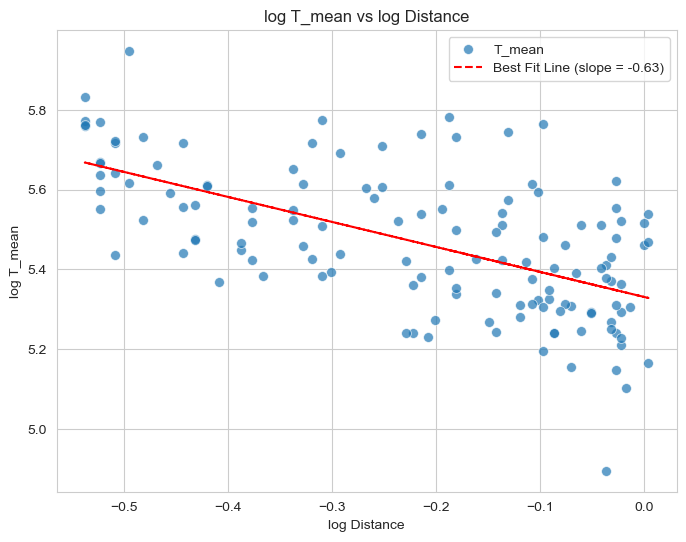

T_parallel3


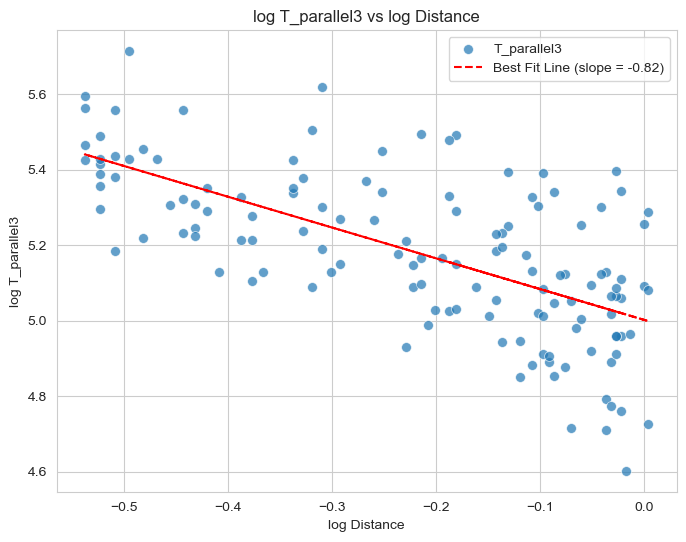

T_perp3


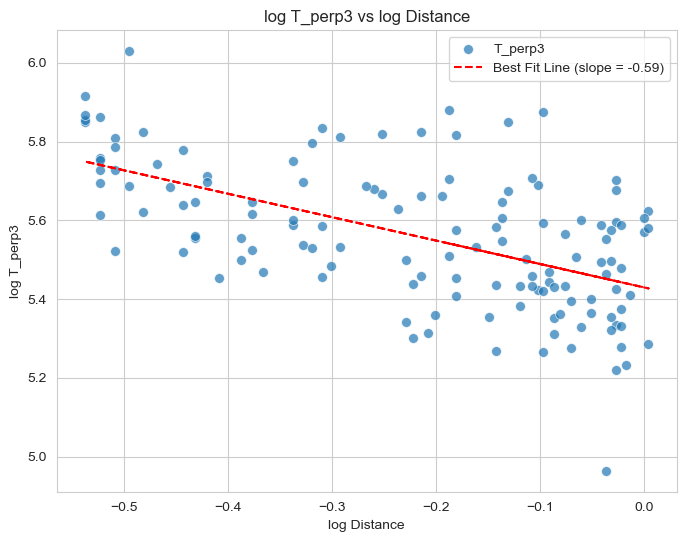

magnetic_moment


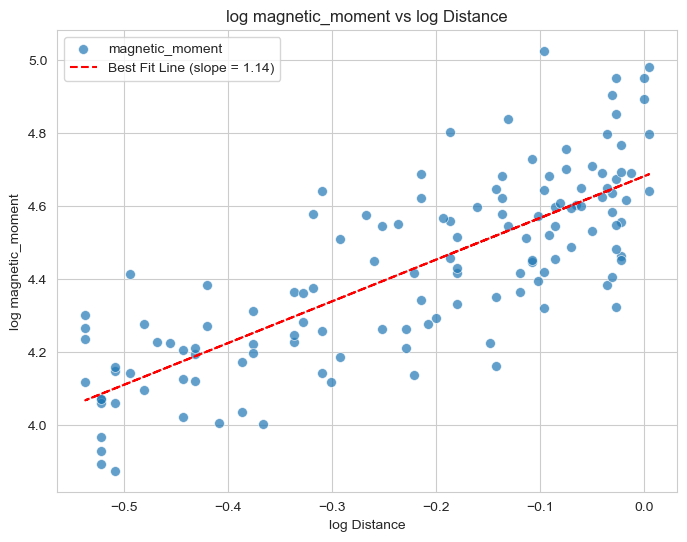

second_adiabatic_invariant


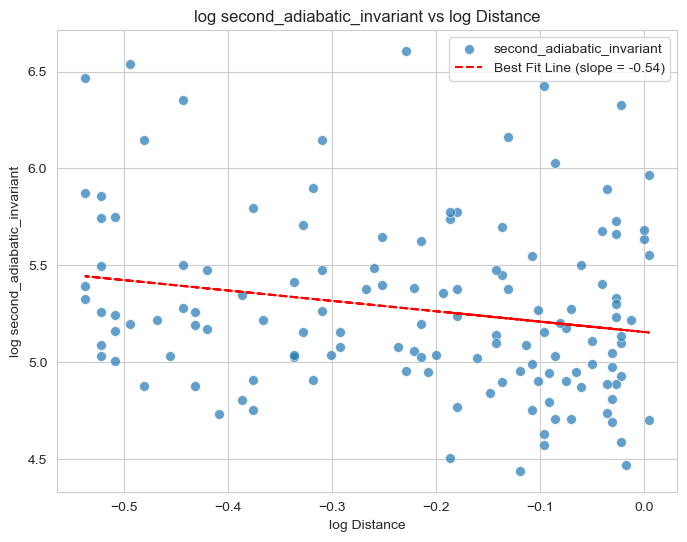

|B|_mean


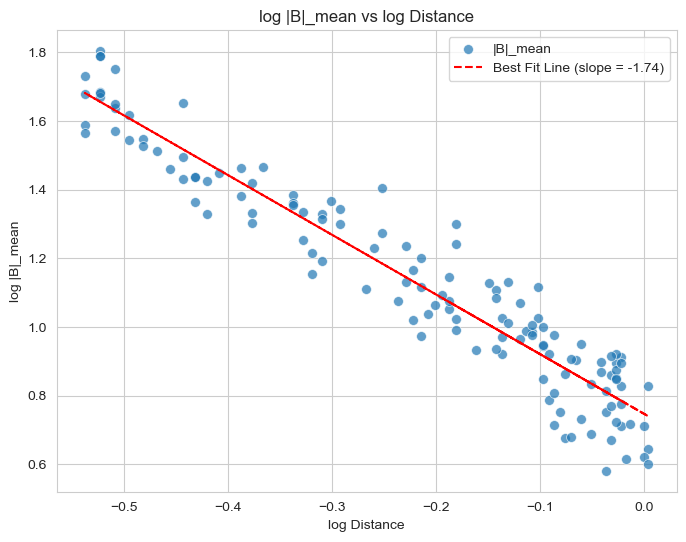

N_mean


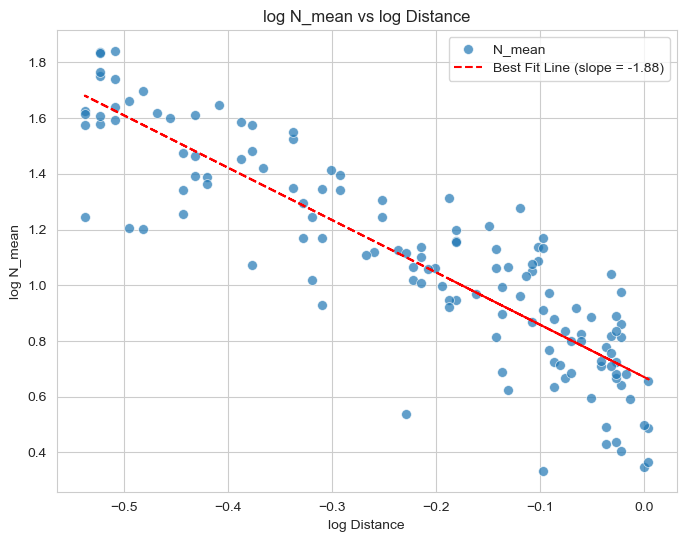

T_mean


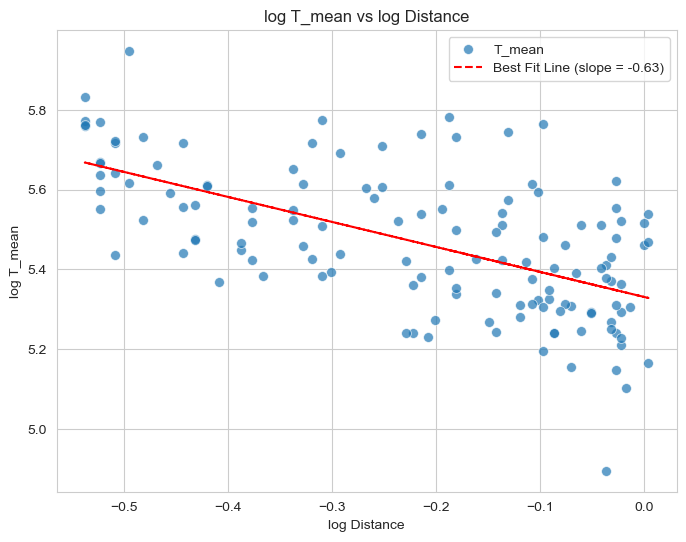

T_R_mean


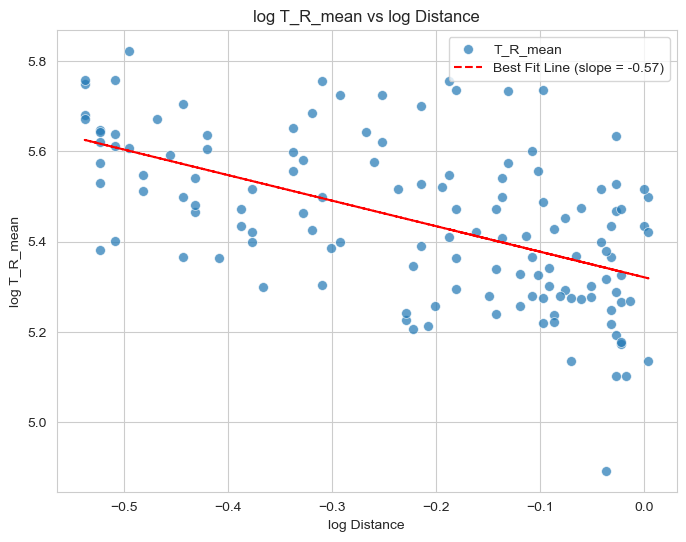

T_T_mean


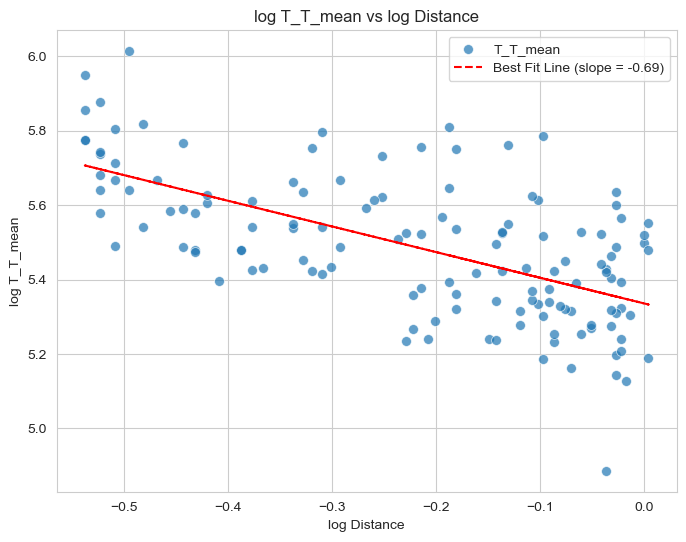

T_N_mean


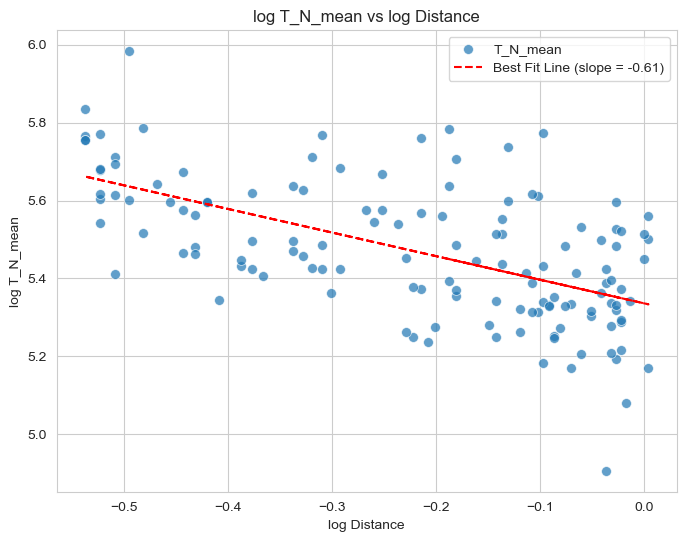

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

# Define the quantities to plot (log-log scale)
# quantities = ['T','T_parallel3', 'T_perp3','magnetic_moment','second_adiabatic_invariant', "|B|", "N",'T','T_R','T_T','T_N']  # Add more quantities if needed
quantities = ['T_mean','T_parallel3', 'T_perp3','magnetic_moment','second_adiabatic_invariant', '|B|_mean', "N_mean",'T_mean','T_R_mean','T_T_mean','T_N_mean']  # Add more if needed

# Loop through each quantity and generate a separate log-log plot
for quantity in quantities:
    # Extract x (Distance) and y (current quantity)
    print(quantity)
    x = np.log10(
mean_values_df_with_calcs['Distance_mean'])
    y = np.log10(
mean_values_df_with_calcs[quantity])

    # Perform linear regression in log-log space
    slope, intercept, _, _, _ = linregress(x, y)
    best_fit_line = slope * x + intercept  # Compute best-fit line in log-log space

    # Create the plot
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=x, y=y, s=50, alpha=0.7, label=quantity)
    plt.plot(x, best_fit_line, color='red', linestyle='--', label=f'Best Fit Line (slope = {slope:.2f})')
    plt.title(f'log {quantity} vs log Distance')
    plt.xlabel('log Distance')
    plt.ylabel(f'log {quantity}')
    plt.legend()

    # Show the plot
    plt.show()


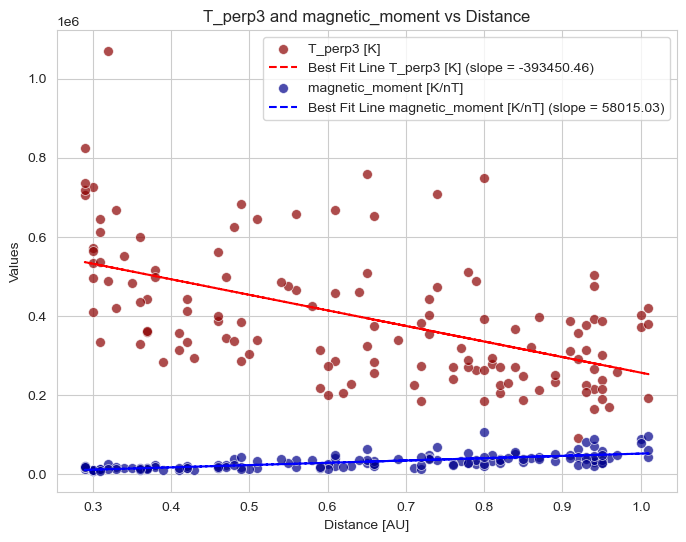

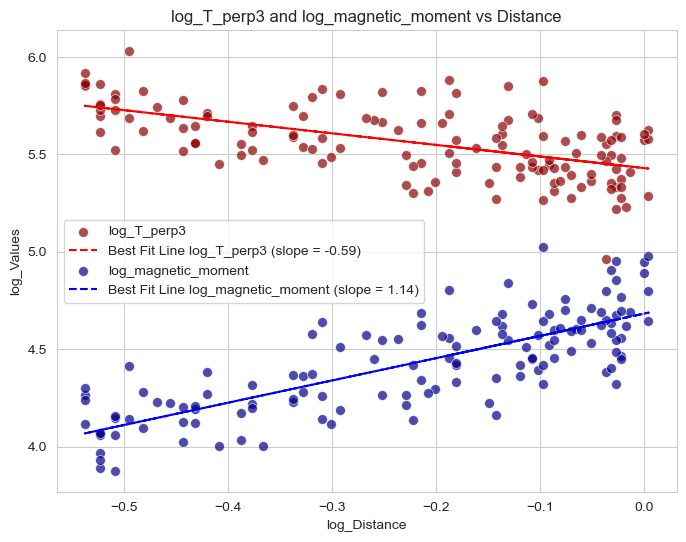

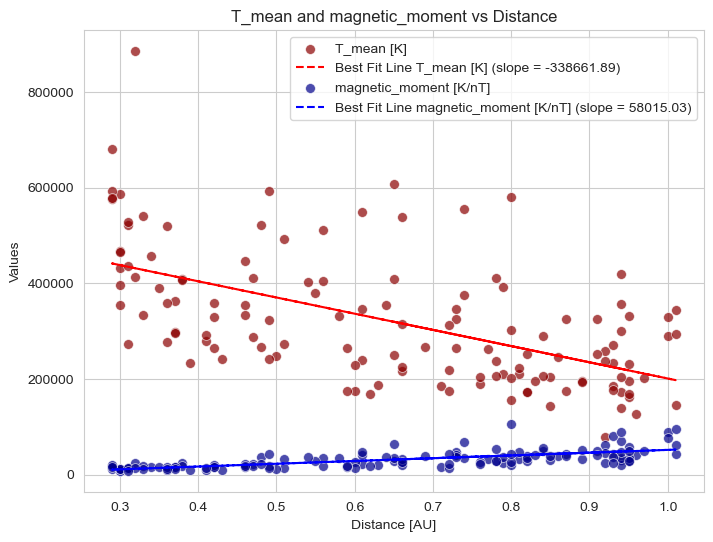

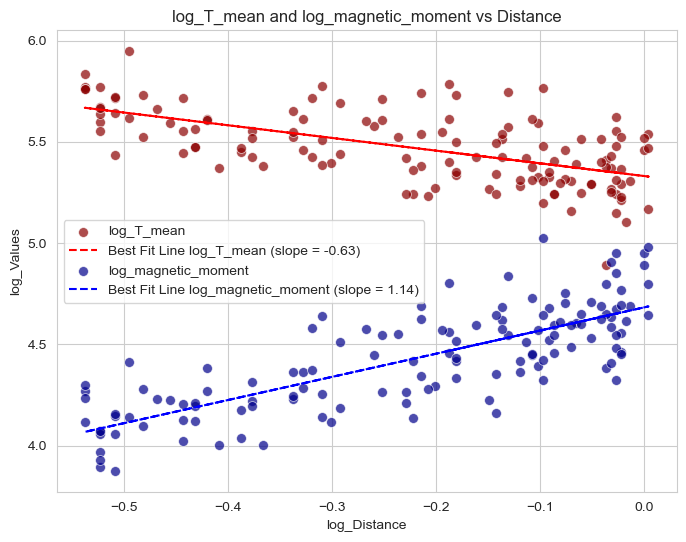

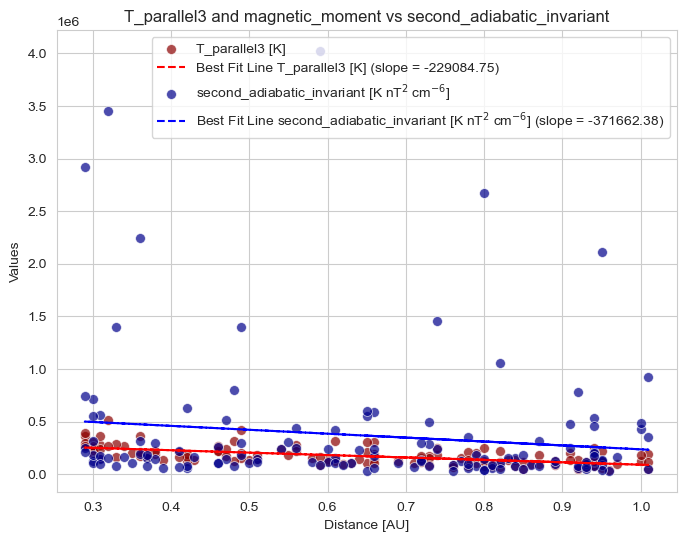

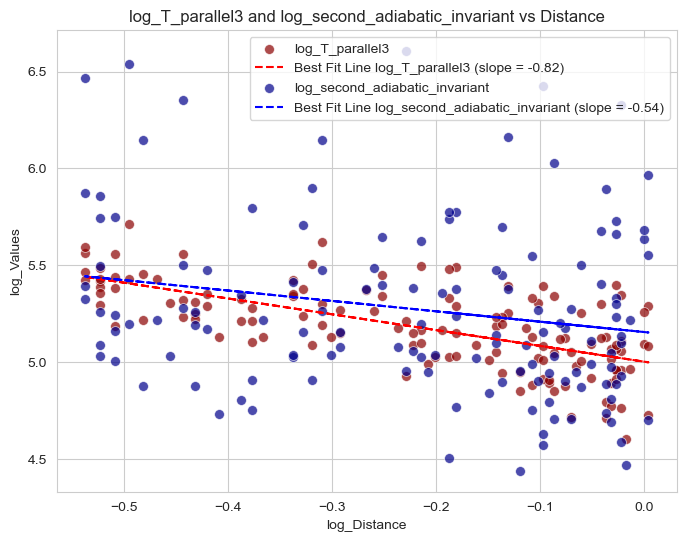

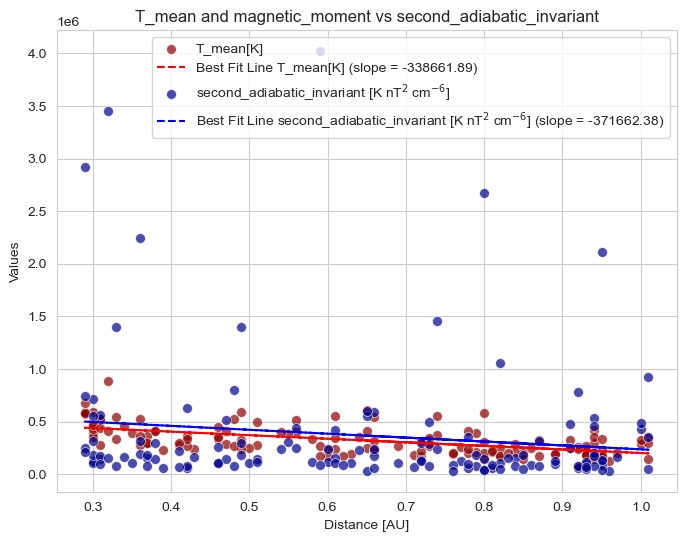

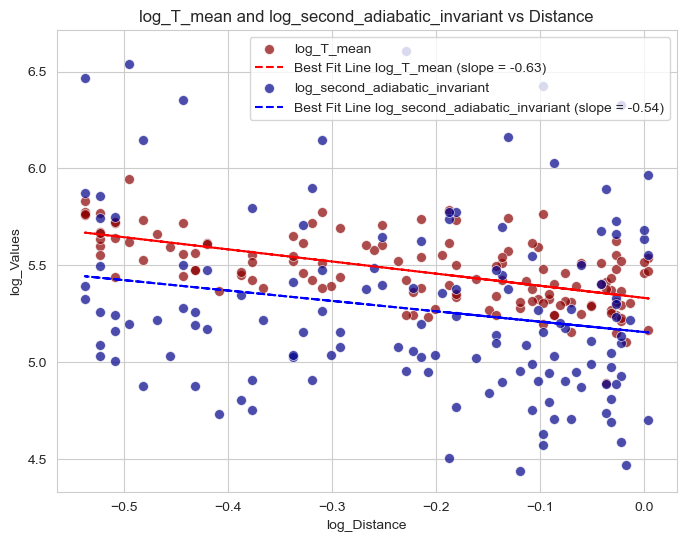

In [238]:

# ---- Units for these quantities ----
UNITS_ai = {
    'Distance_mean': 'AU',

    # Temperatures
    'T_mean': 'K',
    'T_R_mean': 'K', 'T_T_mean': 'K', 'T_N_mean': 'K',
    'T_parallel3': 'K', 'T_perp3': 'K',

    # Plasma / field
    'N_mean': r'cm$^{-3}$',
    '|B|_mean': 'nT',

    # Invariants (adjust if you used different definitions)
    'magnetic_moment': 'K/nT',                 # Tperp/ B
    'second_adiabatic_invariant': r'K nT$^{2}$ cm$^{-6}$'  # Tparallel * B^2 / N^2
}




def plot_2_ys(x, y1, y2, label_1, label_2, title, xlabel, ylabel):
    # Filter out NaN and infinite values
    mask1 = np.isfinite(x) & np.isfinite(y1)
    mask2 = np.isfinite(x) & np.isfinite(y2)
    x1, y1 = x[mask1], y1[mask1]
    x2, y2 = x[mask2], y2[mask2]

    # Perform linear regression for T_perp3
    slope1, intercept1, _, _, _ = linregress(x1, y1)
    best_fit_line1 = slope1 * x1 + intercept1

    # Perform linear regression for magnetic_moment
    slope2, intercept2, _, _, _ = linregress(x2, y2)
    best_fit_line2 = slope2 * x2 + intercept2

    # Create the plot
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=x1, y=y1, s=50, alpha=0.7, label=label_1, color='darkred')
    plt.plot(x1, best_fit_line1, color='red', linestyle='--', label=f'Best Fit Line {label_1} (slope = {slope1:.2f})')
    sns.scatterplot(x=x2, y=y2, s=50, alpha=0.7, label=label_2, color='darkblue')
    plt.plot(x2, best_fit_line2, color='blue', linestyle='--', label=f'Best Fit Line {label_2} (slope = {slope2:.2f})')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

x = mean_values_df_with_calcs['Distance_mean']
y1 = mean_values_df_with_calcs['T_perp3']
y2 = mean_values_df_with_calcs['magnetic_moment']
plot_2_ys(x, y1, y2, 'T_perp3 [K]', 'magnetic_moment [K/nT]',   "T_perp3 and magnetic_moment vs Distance", 'Distance [AU]', 'Values')
plot_2_ys(np.log10(x), np.log10(y1), np.log10(y2), 'log_T_perp3', 'log_magnetic_moment', "log_T_perp3 and log_magnetic_moment vs Distance", 'log_Distance', 'log_Values')

x = mean_values_df_with_calcs['Distance_mean']
y1 = mean_values_df_with_calcs['T_mean']
y2 = mean_values_df_with_calcs['magnetic_moment']
plot_2_ys(x, y1, y2, 'T_mean [K]', 'magnetic_moment [K/nT]',   "T_mean and magnetic_moment vs Distance", 'Distance [AU]', 'Values')
plot_2_ys(np.log10(x), np.log10(y1), np.log10(y2), 'log_T_mean', 'log_magnetic_moment', "log_T_mean and log_magnetic_moment vs Distance", 'log_Distance', 'log_Values')


x = mean_values_df_with_calcs['Distance_mean']
y1 = mean_values_df_with_calcs['T_parallel3']
y2 = mean_values_df_with_calcs['second_adiabatic_invariant']
plot_2_ys(x, y1, y2, 'T_parallel3 [K]', 'second_adiabatic_invariant [K nT$^{2}$ cm$^{-6}$]',   "T_parallel3 and magnetic_moment vs second_adiabatic_invariant", 'Distance [AU]', 'Values')
plot_2_ys(np.log10(x), np.log10(y1), np.log10(y2), 'log_T_parallel3', 'log_second_adiabatic_invariant', "log_T_parallel3 and log_second_adiabatic_invariant vs Distance", 'log_Distance', 'log_Values')

x = mean_values_df_with_calcs['Distance_mean']
y1 = mean_values_df_with_calcs['T_mean']
y2 = mean_values_df_with_calcs['second_adiabatic_invariant']
plot_2_ys(x, y1, y2, 'T_mean[K]', 'second_adiabatic_invariant [K nT$^{2}$ cm$^{-6}$]',   "T_mean and magnetic_moment vs second_adiabatic_invariant", 'Distance [AU]', 'Values')
plot_2_ys(np.log10(x), np.log10(y1), np.log10(y2), 'log_T_mean', 'log_second_adiabatic_invariant', "log_T_mean and log_second_adiabatic_invariant vs Distance", 'log_Distance', 'log_Values')

# plots with Peroni et al equations

In [239]:
peroni_et_al_df = mean_values_df_with_calcs.copy()

In [240]:
def formula_peroni(m, m_uncertainty, R, R0, power, power_uncertainty):

    value = m * ((R / R0) ** (power))
    all_possible_uncertainties_taken_into_account = [
        (m + m_uncertainty) * ((R / R0) ** (power + power_uncertainty)),
        (m + m_uncertainty) * ((R / R0) ** (power - power_uncertainty)),
        (m - m_uncertainty) * ((R / R0) ** (power + power_uncertainty)),
        (m - m_uncertainty) * ((R / R0) ** (power - power_uncertainty)),
    ]
    # Calculate the formula
    return value, min(all_possible_uncertainties_taken_into_account), max(all_possible_uncertainties_taken_into_account)


peroni_et_al_df[['eq_n', 'eq_n_lower', 'eq_n_upper']] = peroni_et_al_df.apply(lambda row:
    formula_peroni(2.4, 0.1, row['Distance_mean'], 1, -1.96, 0.07), axis=1, result_type="expand")

peroni_et_al_df[['eq_B', 'eq_B_lower', 'eq_B_upper']] = peroni_et_al_df.apply(lambda row:
    formula_peroni(5.7, 0.2, row['Distance_mean'], 1, -1.59, 0.06), axis=1, result_type="expand")

peroni_et_al_df[['eq_BR', 'eq_BR_lower', 'eq_BR_upper']] = peroni_et_al_df.apply(lambda row:
    formula_peroni(3.5, 0.2, row['Distance_mean'], 1, -1.81, 0.08), axis=1, result_type="expand")

peroni_et_al_df[['eq_BT', 'eq_BT_lower', 'eq_BT_upper']] = peroni_et_al_df.apply(lambda row:
     formula_peroni(2.9, 0.2, row['Distance_mean'], 1, -1.21, 0.09), axis=1, result_type="expand")

peroni_et_al_df[['eq_T', 'eq_T_lower', 'eq_T_upper']] = peroni_et_al_df.apply(lambda row:
     formula_peroni(1.9*10**5, 0.1*10**5, row['Distance_mean'], 1, -0.9, 0.1), axis=1, result_type="expand")

peroni_et_al_df[['eq_T_parallel', 'eq_T_parallel_lower', 'eq_T_parallel_upper']] = peroni_et_al_df.apply(lambda row:
     formula_peroni(1.2*10**5, 0.1*10**5, row['Distance_mean'], 1, -0.5, 0.1), axis=1, result_type="expand")

peroni_et_al_df[['eq_T_perp', 'eq_T_perp_lower', 'eq_T_perp_upper']] = peroni_et_al_df.apply(lambda row:
     formula_peroni(2.3*10**5, 0.1*10**5, row['Distance_mean'], 1, -1.0, 0.1), axis=1, result_type="expand")

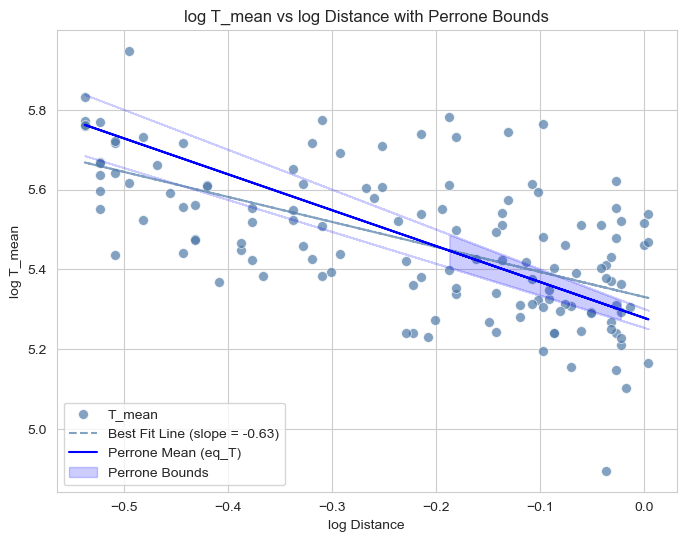

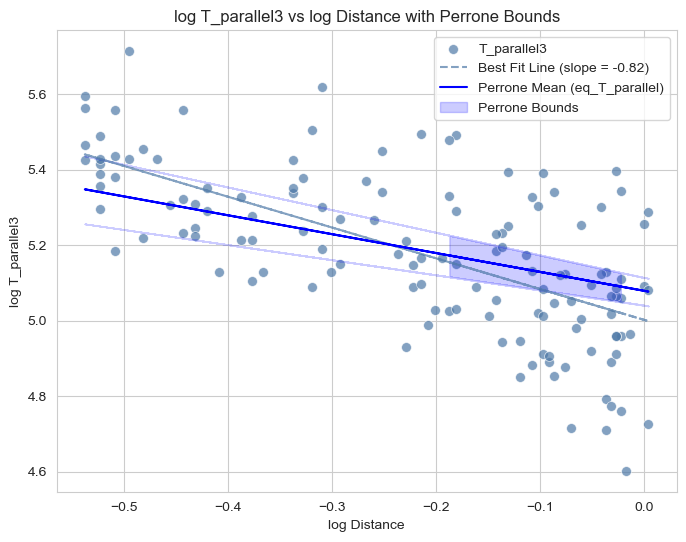

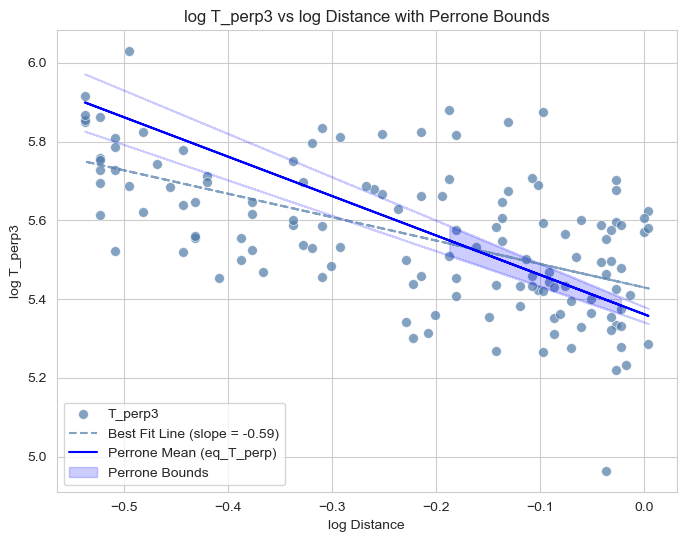

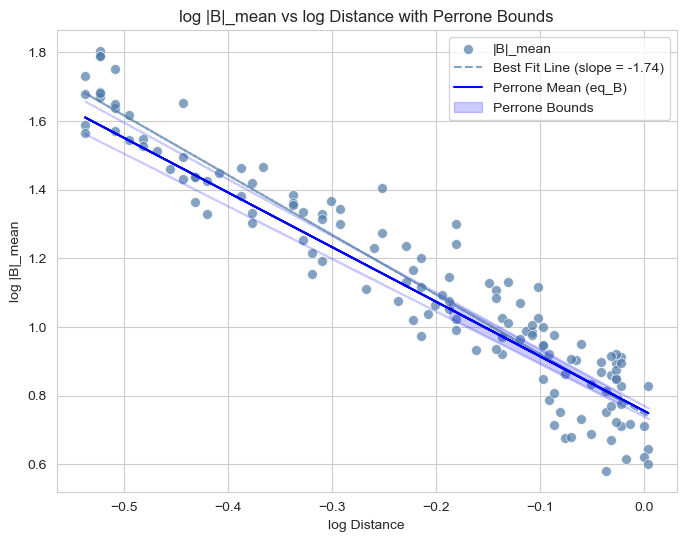

/Users/stefanipetropoulou/miniforge3/envs/sunpy/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log10



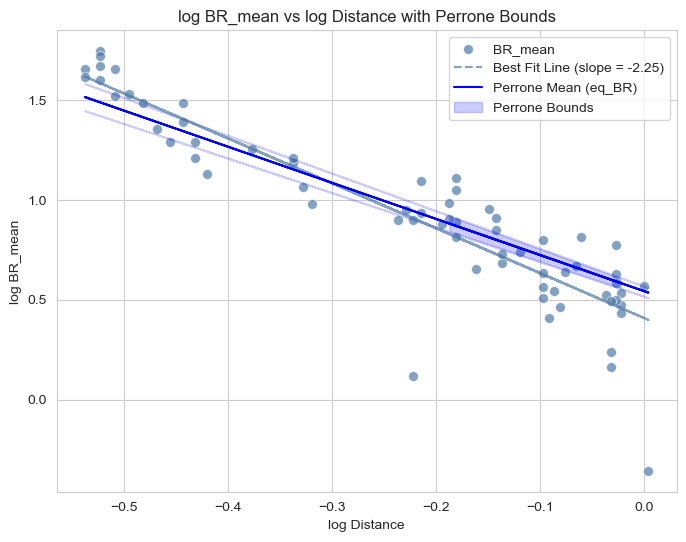

/Users/stefanipetropoulou/miniforge3/envs/sunpy/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log10



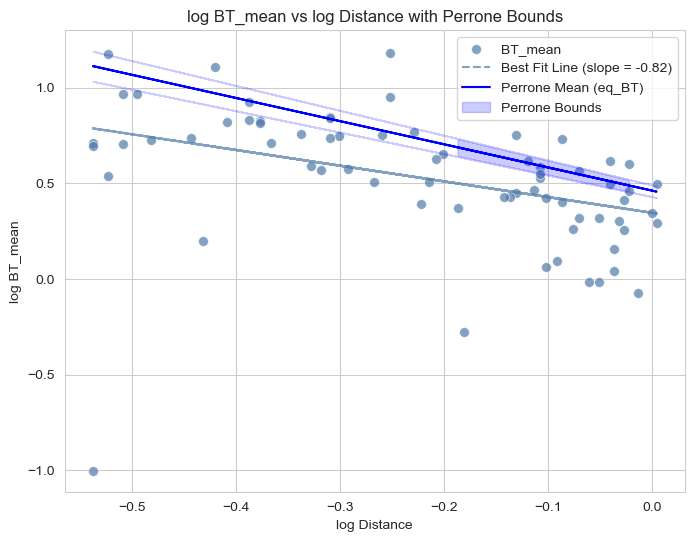

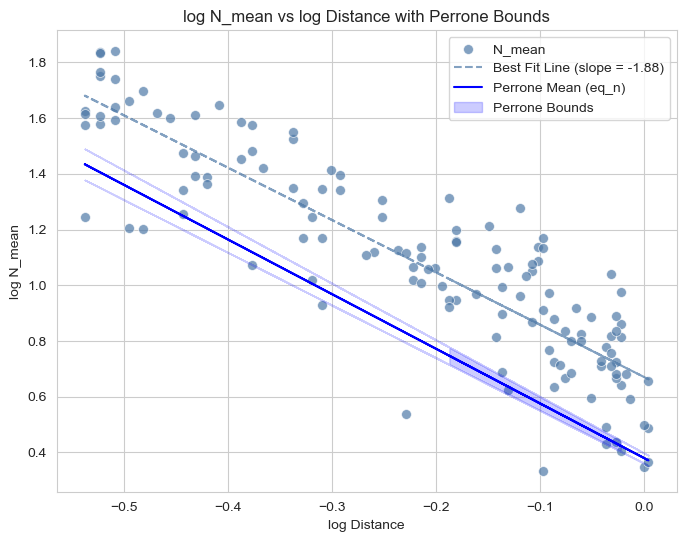

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the quantities to plot
quantities = [['T_mean','eq_T', 'eq_T_lower', 'eq_T_upper'],
              ['T_parallel3','eq_T_parallel', 'eq_T_parallel_lower', 'eq_T_parallel_upper'],
              ['T_perp3','eq_T_perp', 'eq_T_perp_lower', 'eq_T_perp_upper'],
              ['|B|_mean','eq_B', 'eq_B_lower', 'eq_B_upper'],
              ['BR_mean','eq_BR', 'eq_BR_lower', 'eq_BR_upper'],
              ['BT_mean','eq_BT', 'eq_BT_lower', 'eq_BT_upper'],
              ['N_mean','eq_n', 'eq_n_lower', 'eq_n_upper']]# Add more if needed

# Loop through each quantity and generate a log-log plot
for quantity in quantities:
    # Extract x (Distance) and y (current quantity)
    x = np.log10(
peroni_et_al_df['Distance_mean'])
    y = np.log10(
peroni_et_al_df[quantity[0]])
    y_eq_t = np.log10(
peroni_et_al_df[quantity[1]])
    y_upper = np.log10(
peroni_et_al_df[quantity[2]])
    y_lower = np.log10(
peroni_et_al_df[quantity[3]])

    mask = ~np.isnan(x) & ~np.isnan(y)
    slope1, intercept1, _, _, _ = linregress(x[mask], y[mask])
    best_fit_line1 = slope1 * x[mask] + intercept1







    # Create the plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x, y=y, s=50, alpha=0.7, label=quantity[0],color='#4E79A7')
    plt.plot(x[mask], best_fit_line1, color='#4E79A7', alpha=0.7, linestyle='--', label=f'Best Fit Line (slope = {slope1:.2f})',linewidth=1.5)
    plt.plot(x, y_eq_t, color='blue', linestyle='-', label=f'Perrone Mean ({quantity[1]})')
    plt.fill_between(x, y_lower, y_upper, color='blue', alpha=0.2, label='Perrone Bounds')
    plt.title(f'log {quantity[0]} vs log Distance with Perrone Bounds')
    plt.xlabel('log Distance')
    plt.ylabel(f'log {quantity[0]}')
    plt.legend()
    plt.show()